In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd

from bo_functions import ExactGPModel
from bo_functions import test_train_split
from bo_functions import bo_iter
from bo_functions import bo_iter_w_runs
from bo_functions import find_train_doc_path
from datetime import datetime

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = None ##For Testing

#Set Parameters
Theta_True = np.array([1,-1])
BO_iters = 10
train_iter = 300
noise_std = 0.1
runs = 1
explore_bias = torch.tensor([1])
shuffle_seed = 9
set_lengthscale = np.array([None])
emulator = False
sparse_grid = False
verbose = True
save_fig = False

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

Date and Time:  22-Aug-2022 (11:09:12)


Runs: 1
BO Iters: 10
------------------------------
Lengthscale Set To: [None]
Explore Bias: tensor(1)
Run Number:  1


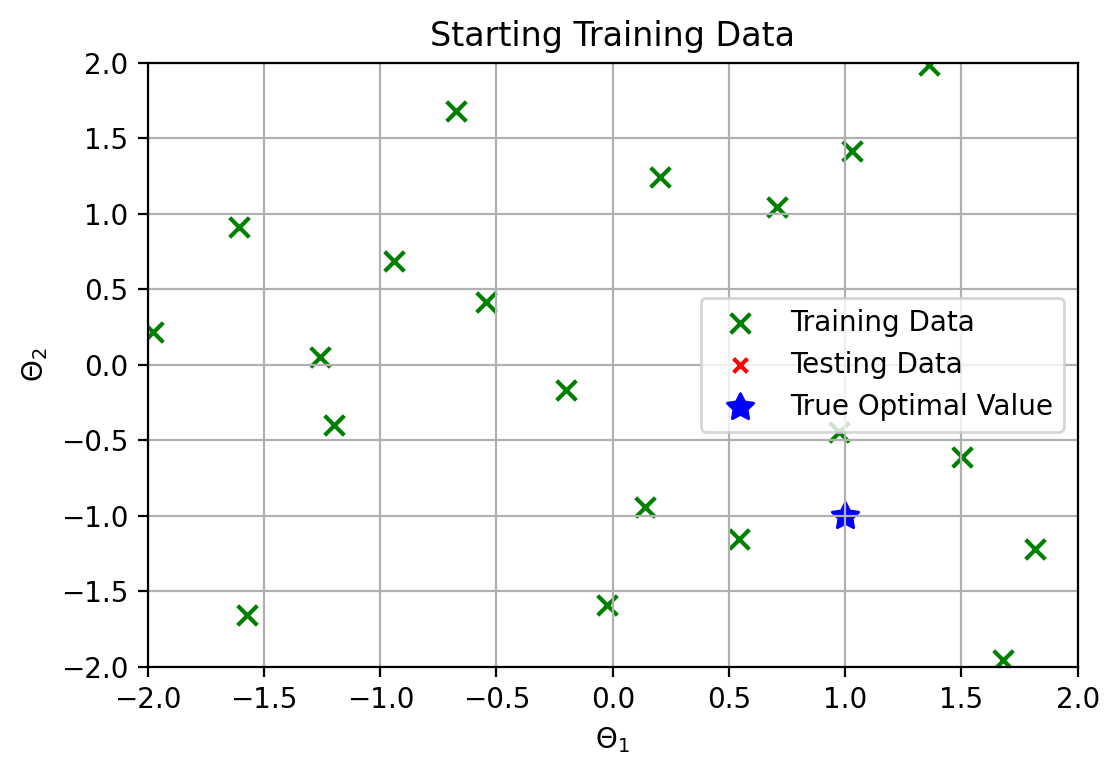

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


BO Iteration =  1
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 0.9132431  -1.17507961]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.90275607 -1.17186508]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.22370889882884262 



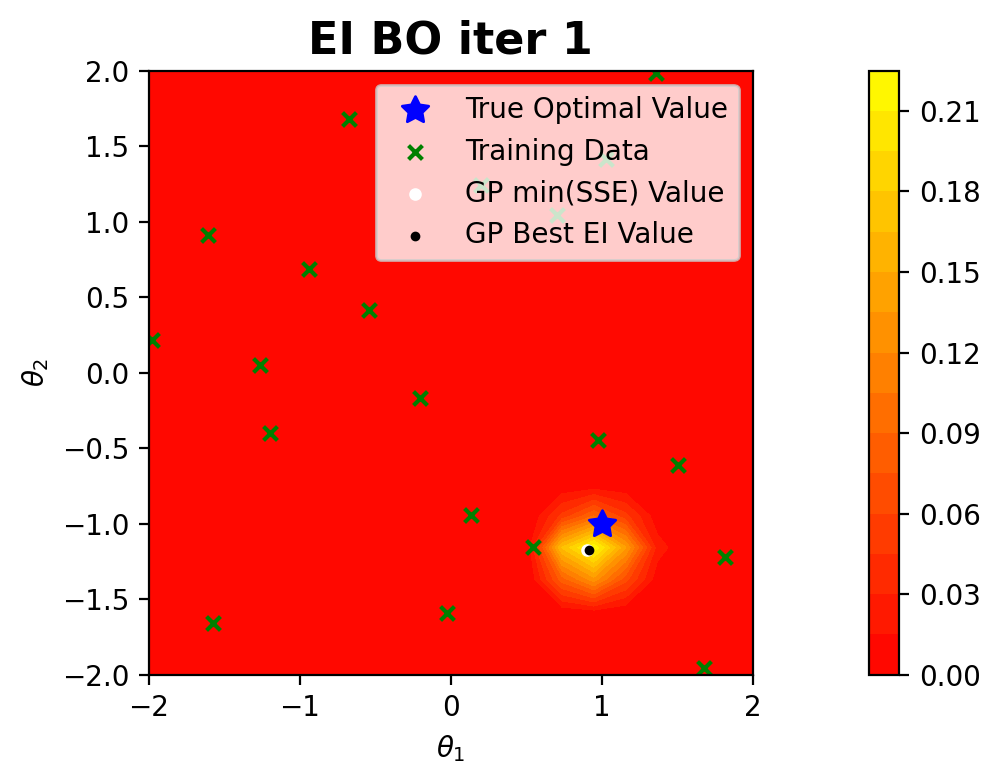

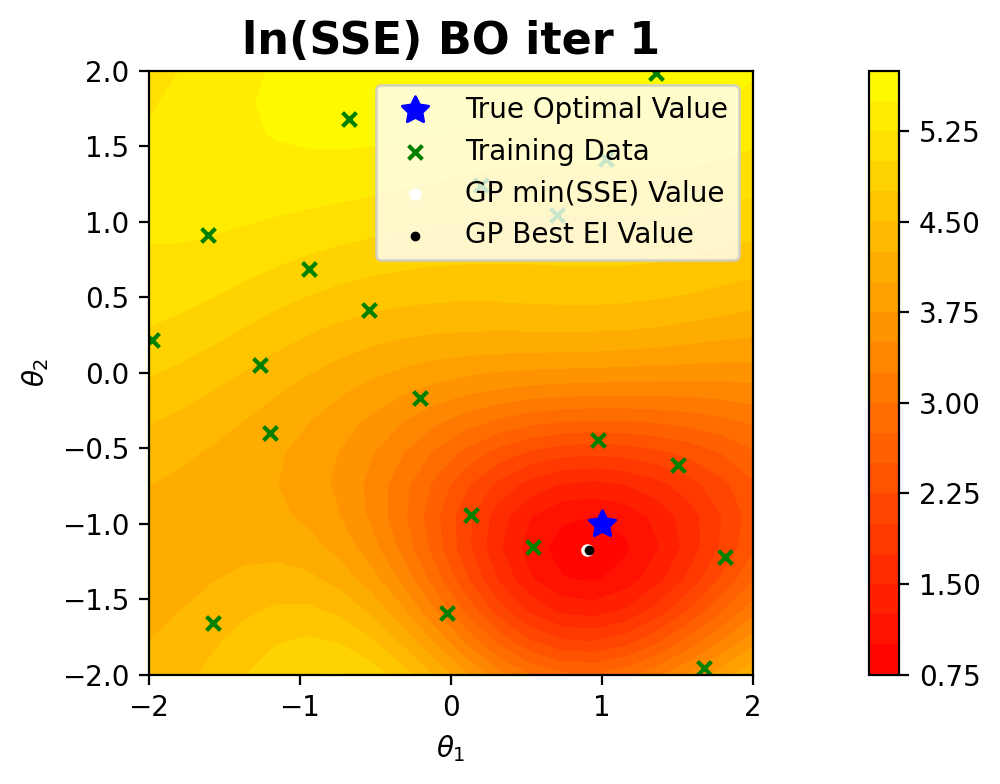

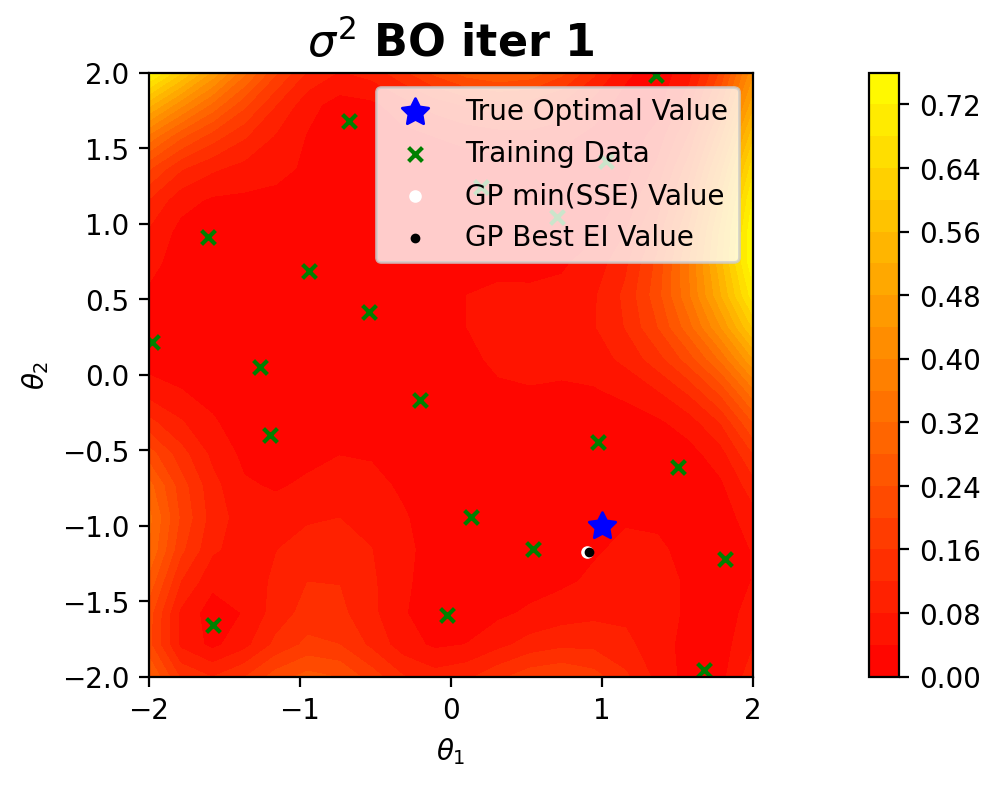

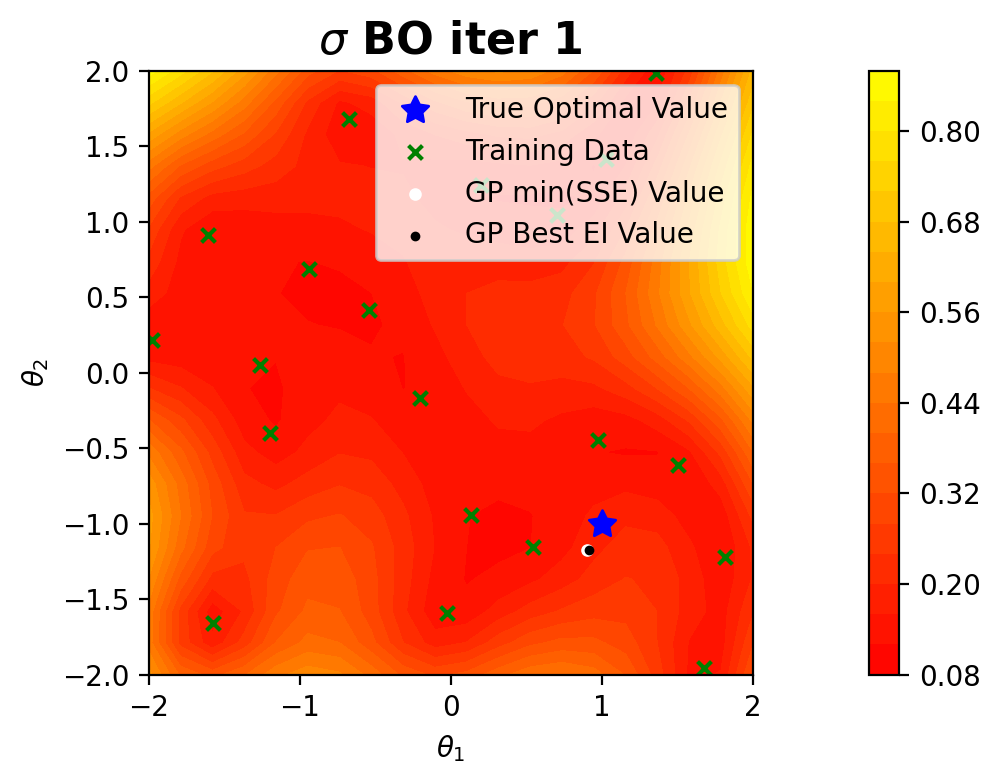

Best Error is: 1.0376


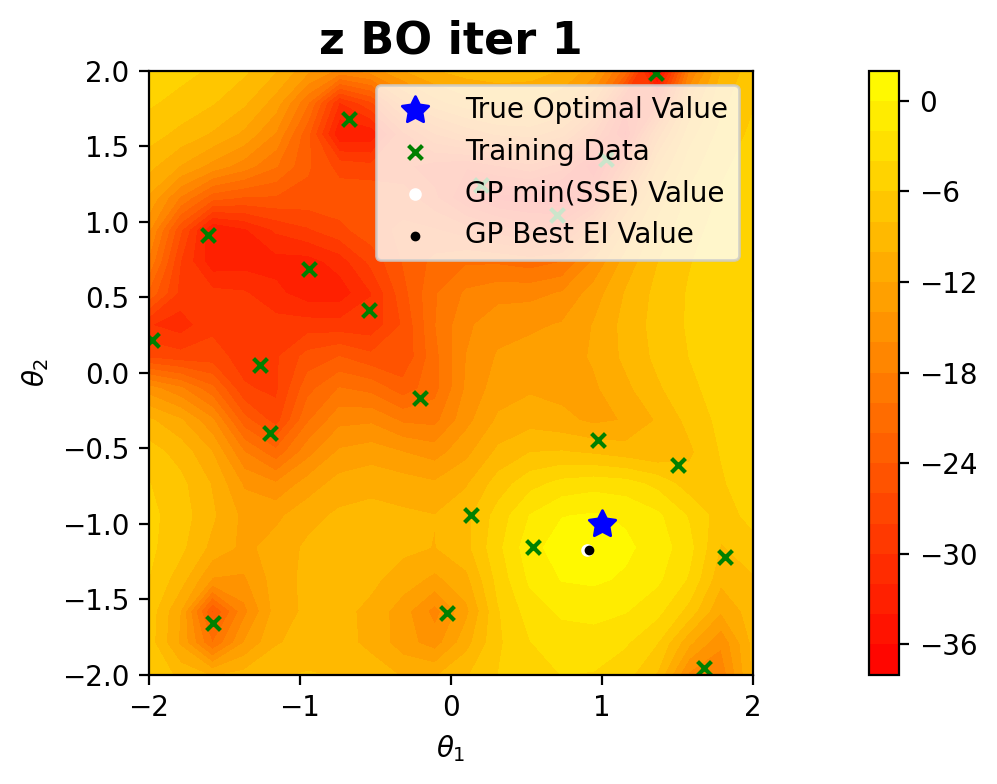

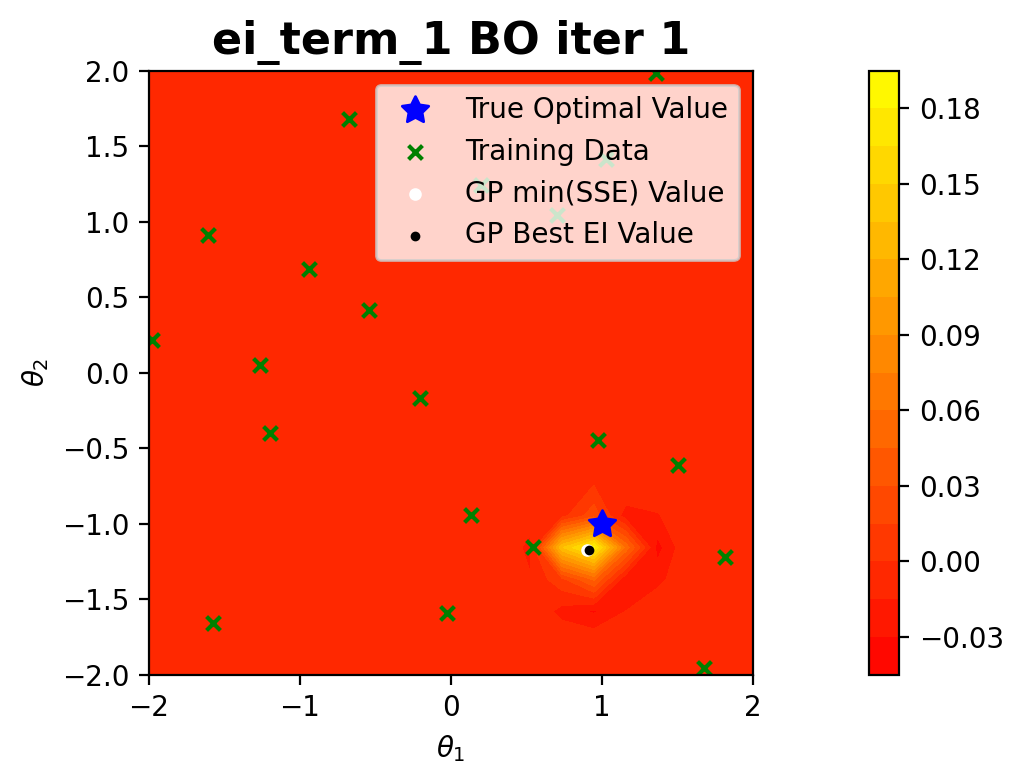

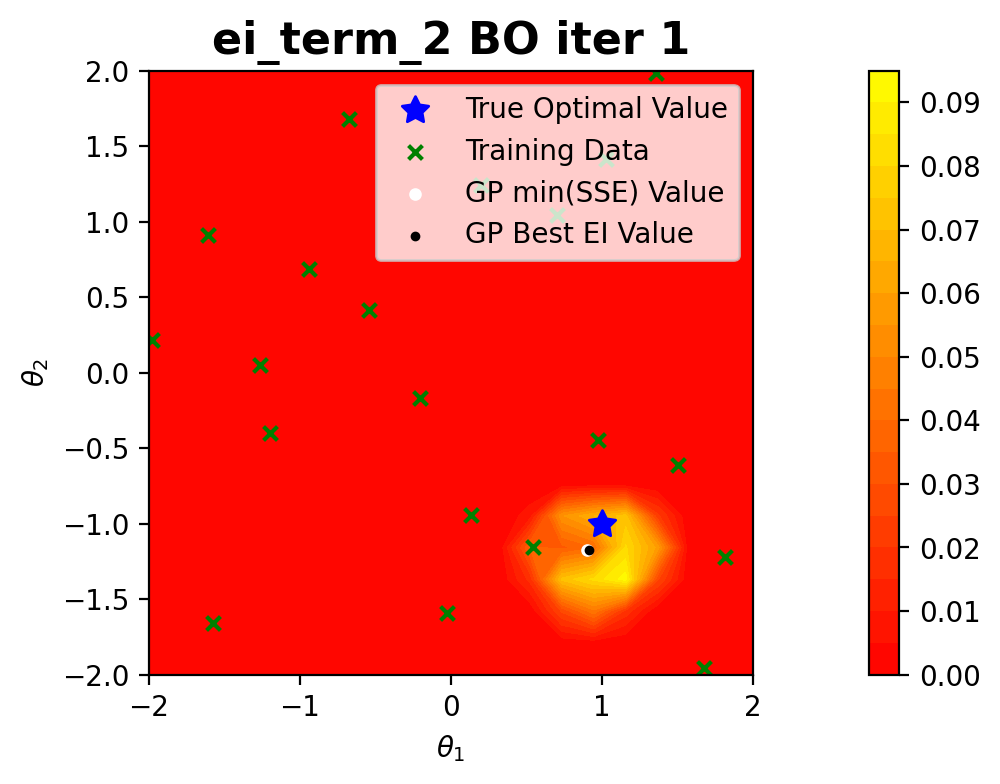

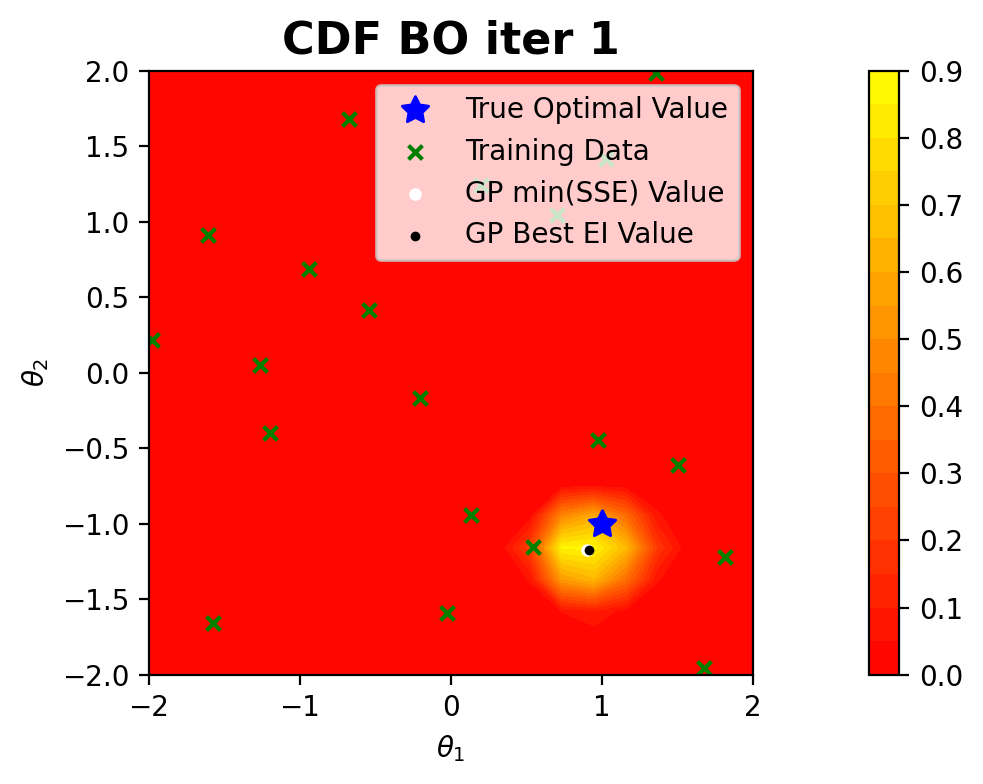

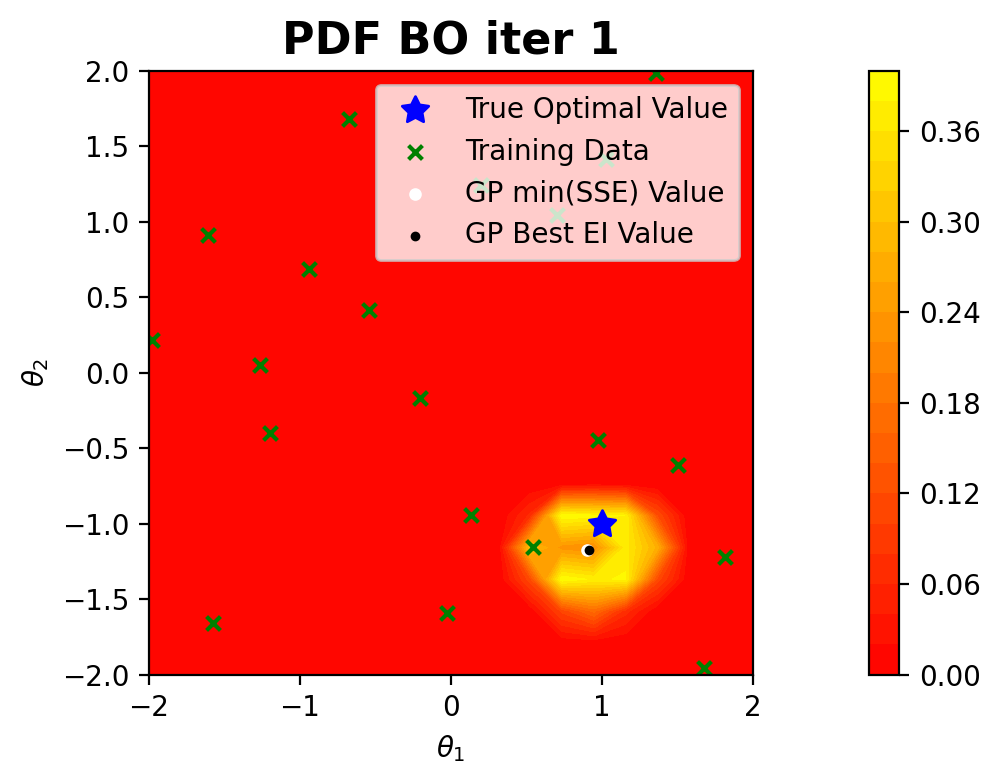

Magnitude of ln(SSE) given Theta_Opt =  [ 0.90275607 -1.17186508] is 4.7761e-02
BO Iteration =  2
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.02112032 -1.22162149]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.99566953 -1.20375599]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.015358396783391307 



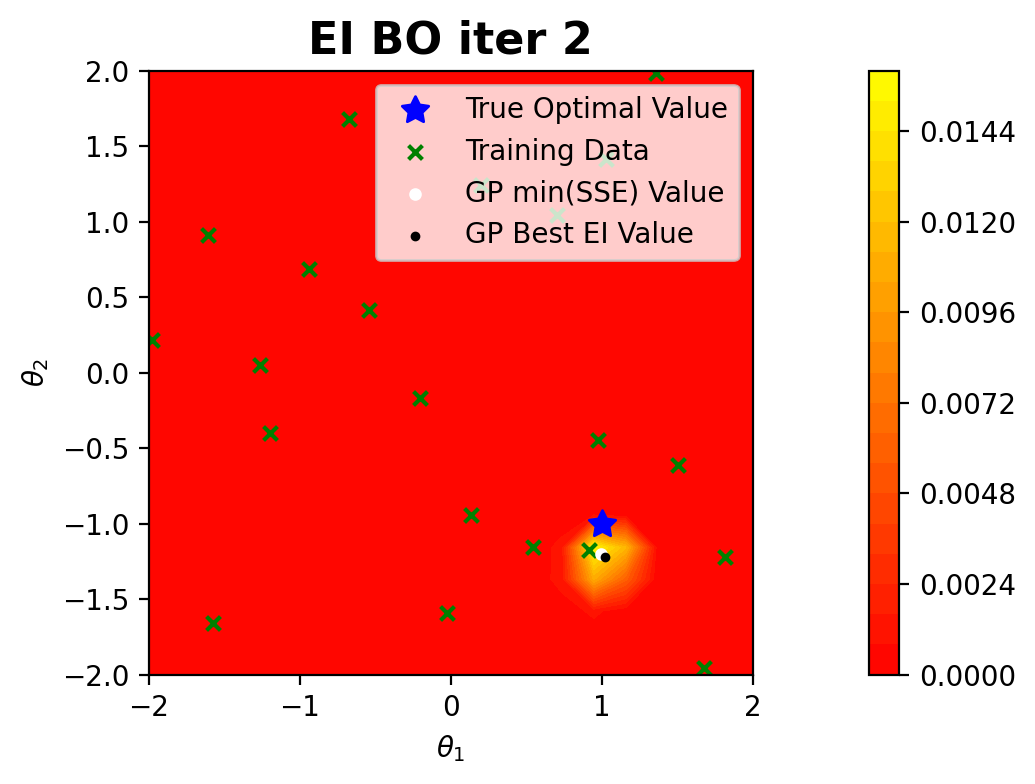

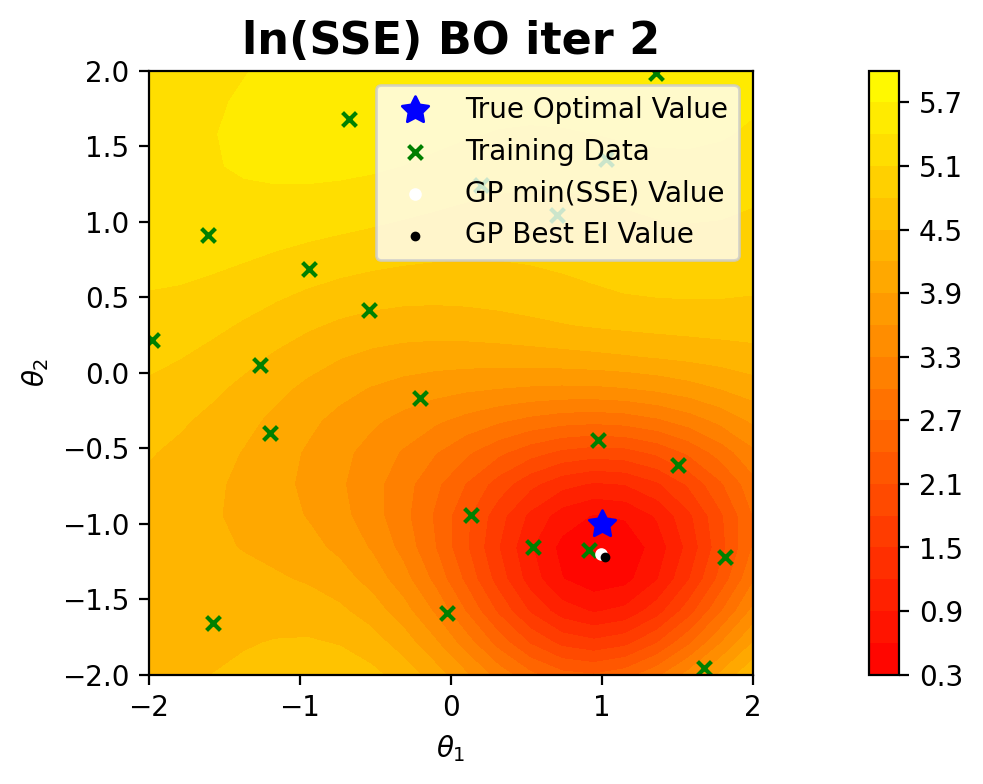

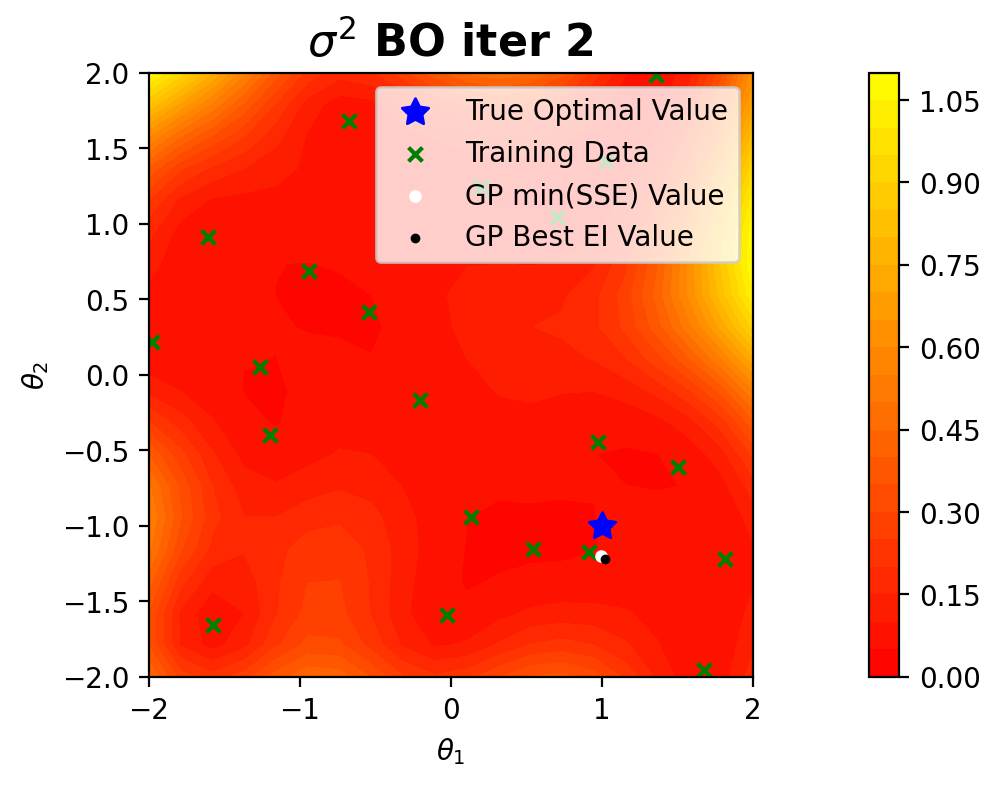

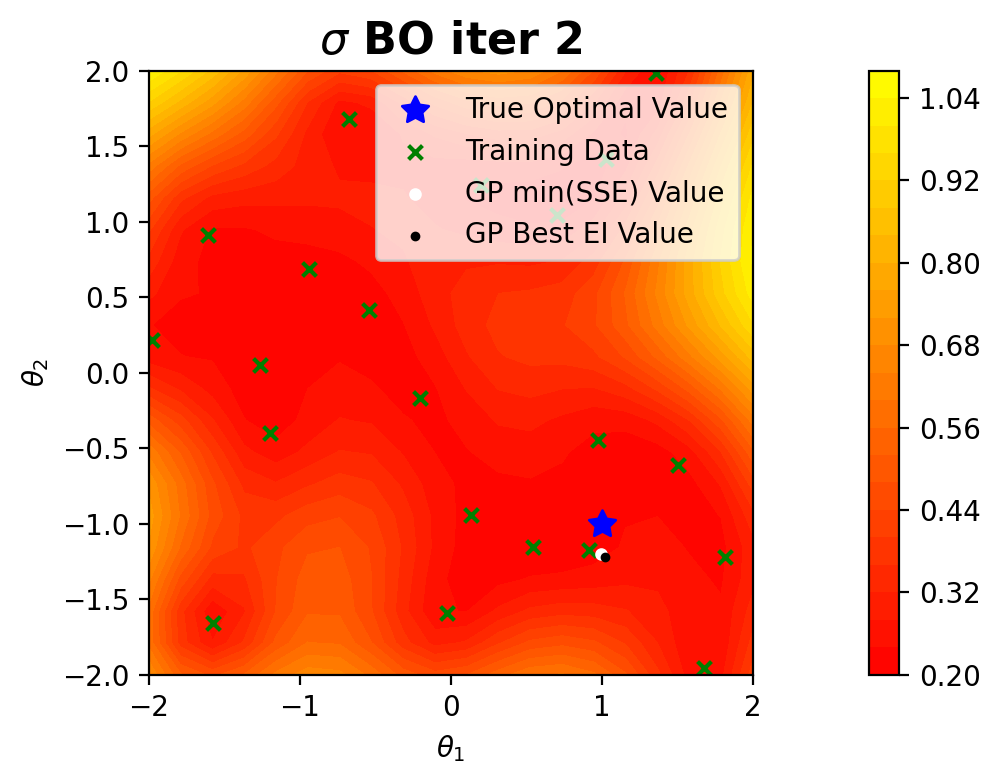

Best Error is: 0.0658


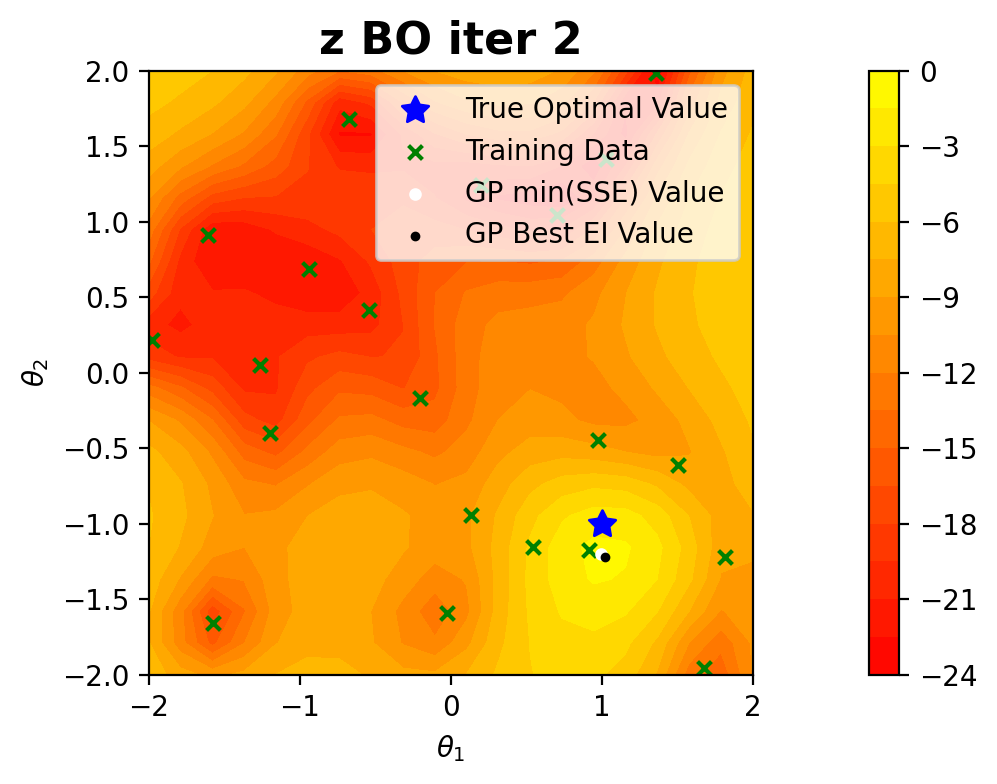

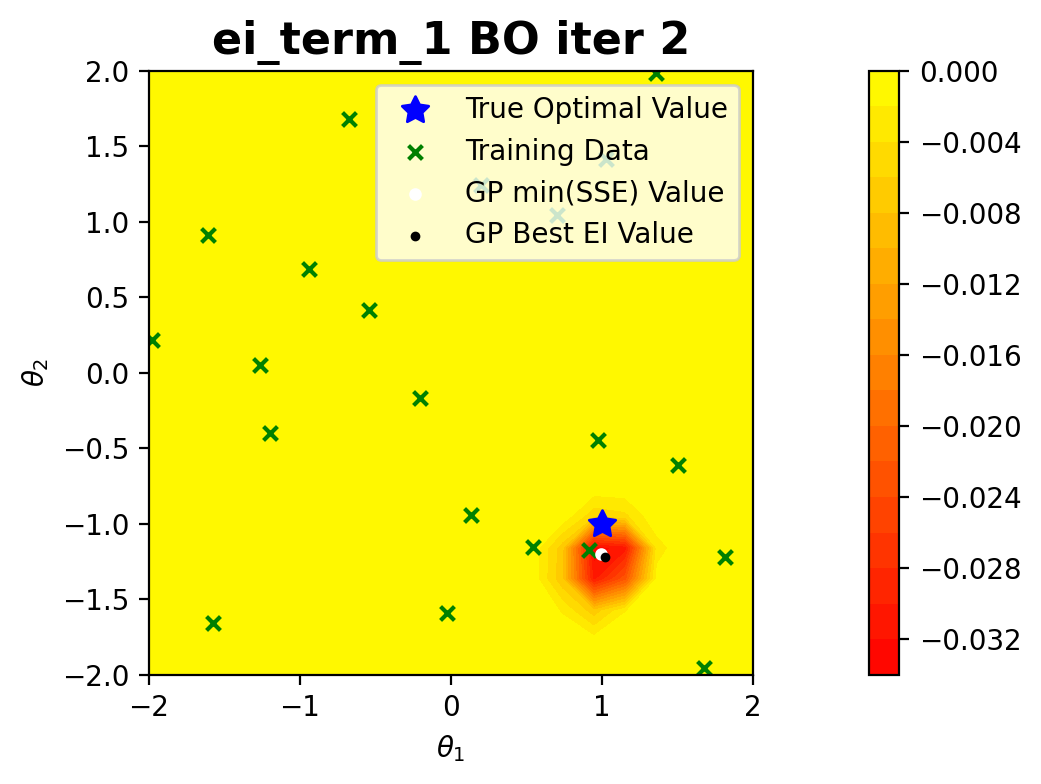

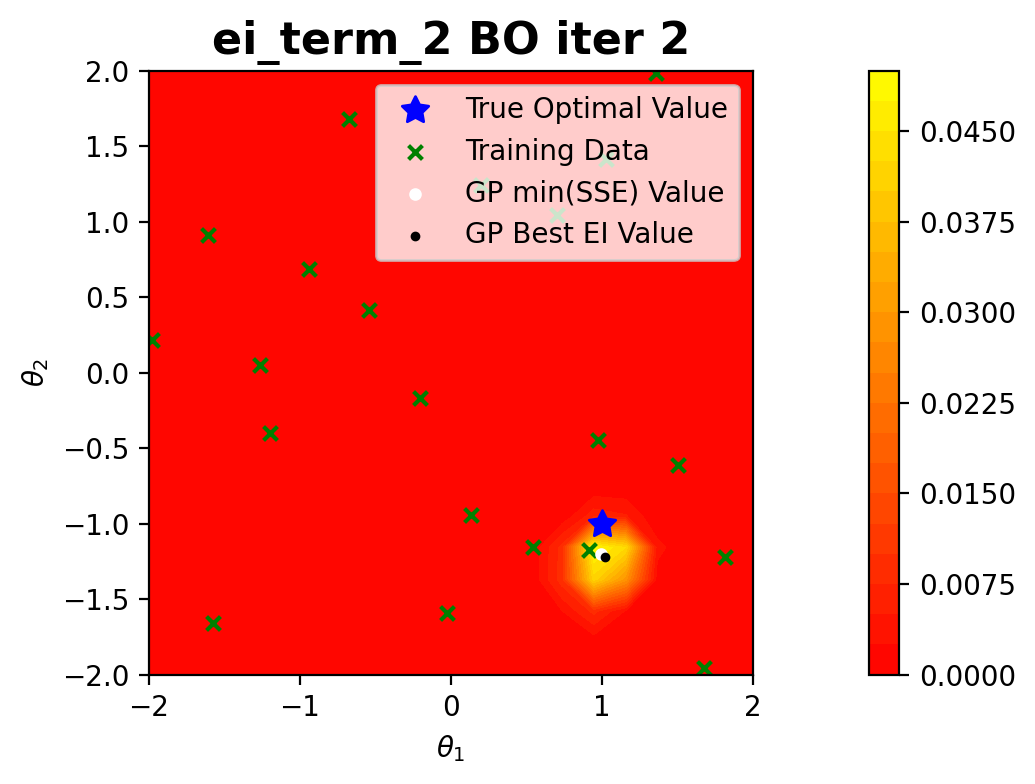

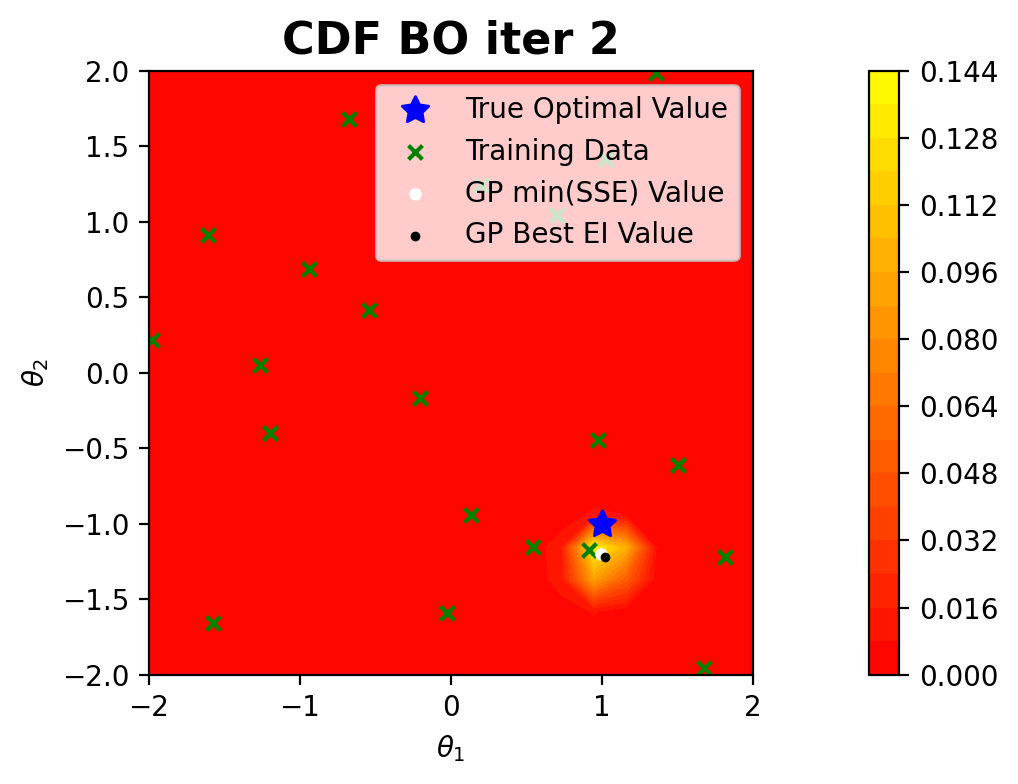

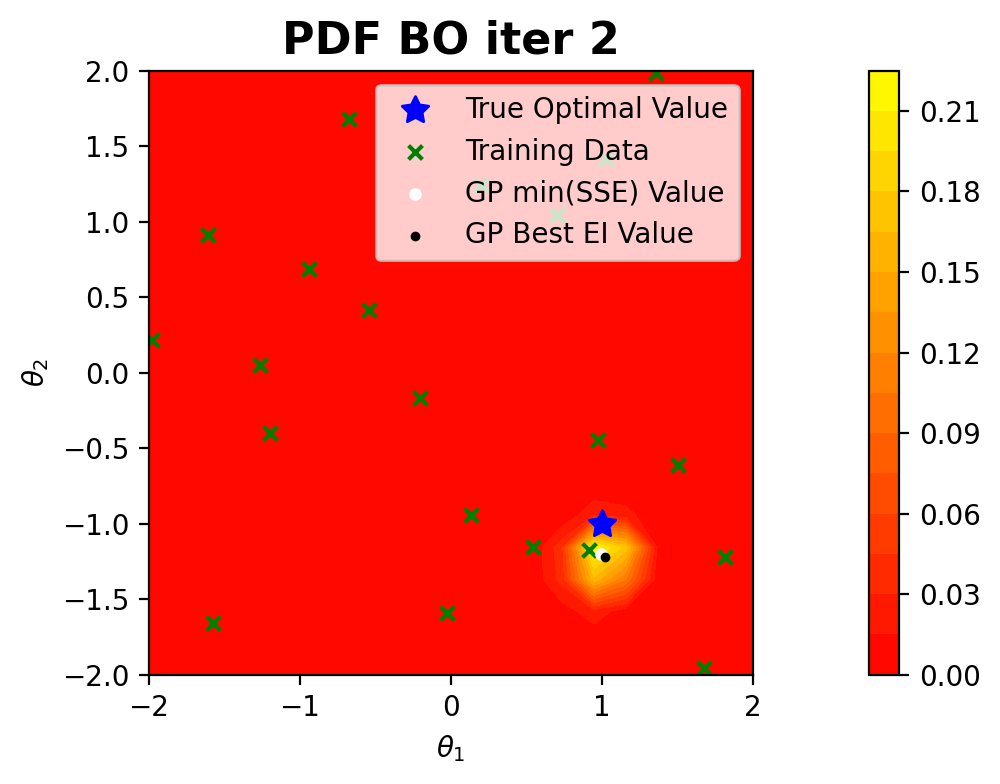

Magnitude of ln(SSE) given Theta_Opt =  [ 0.99566953 -1.20375599] is 3.1166e-01
BO Iteration =  3
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 0.99080282 -1.20823569]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.97435763 -1.19546798]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.005004847439399662 



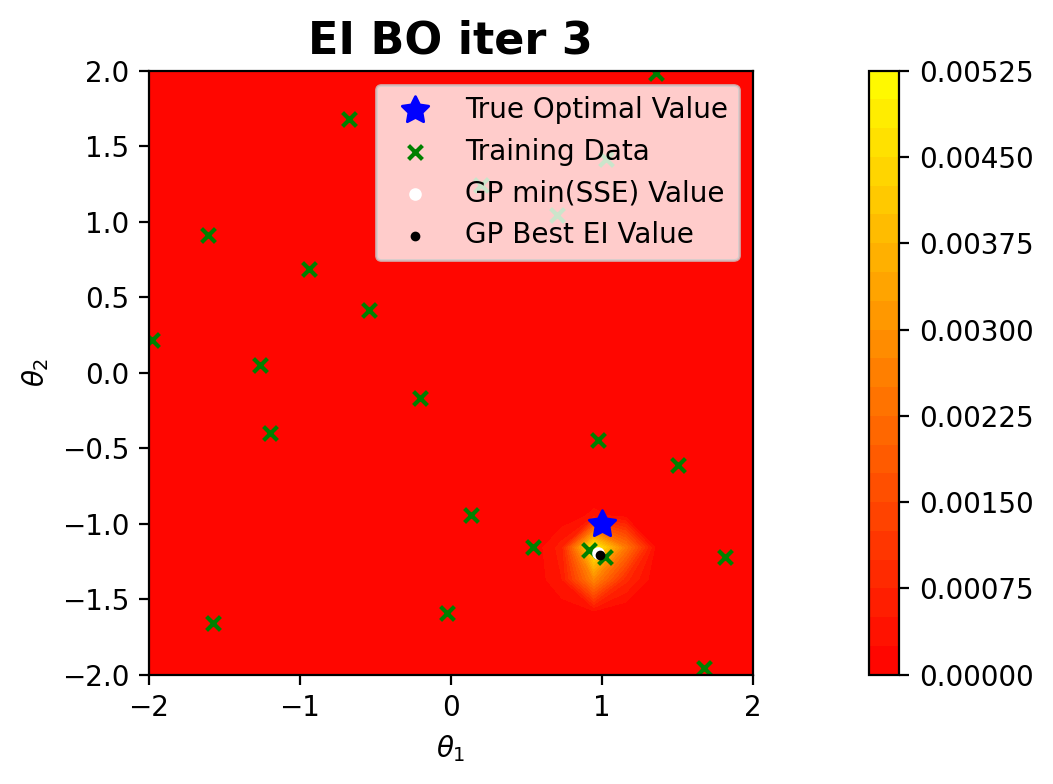

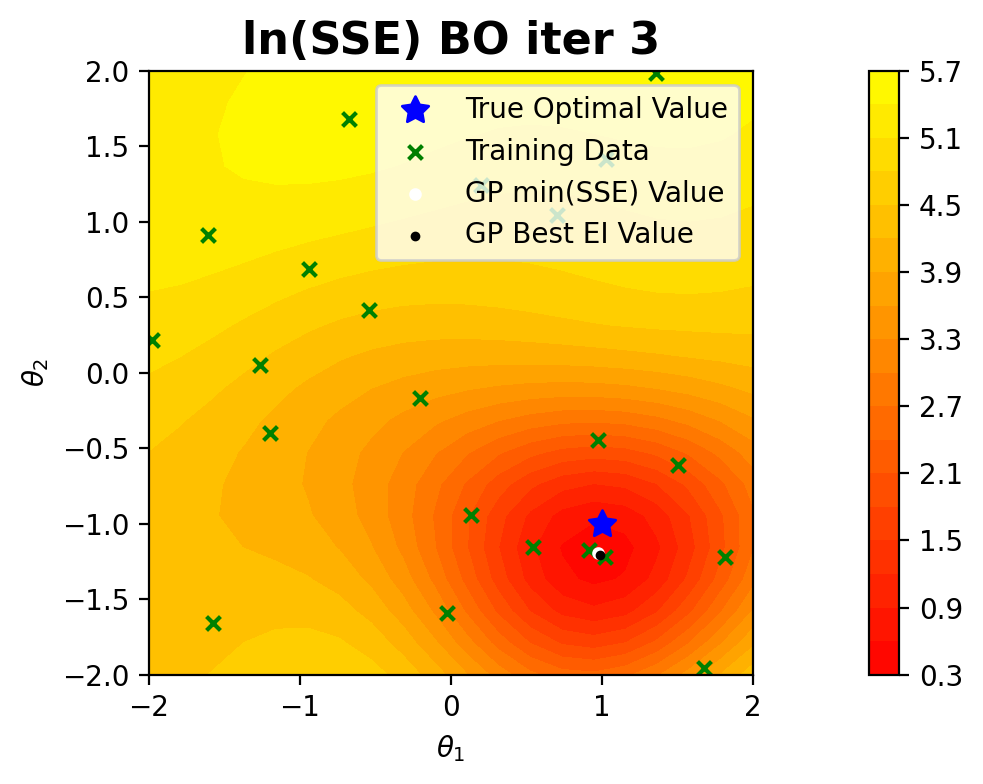

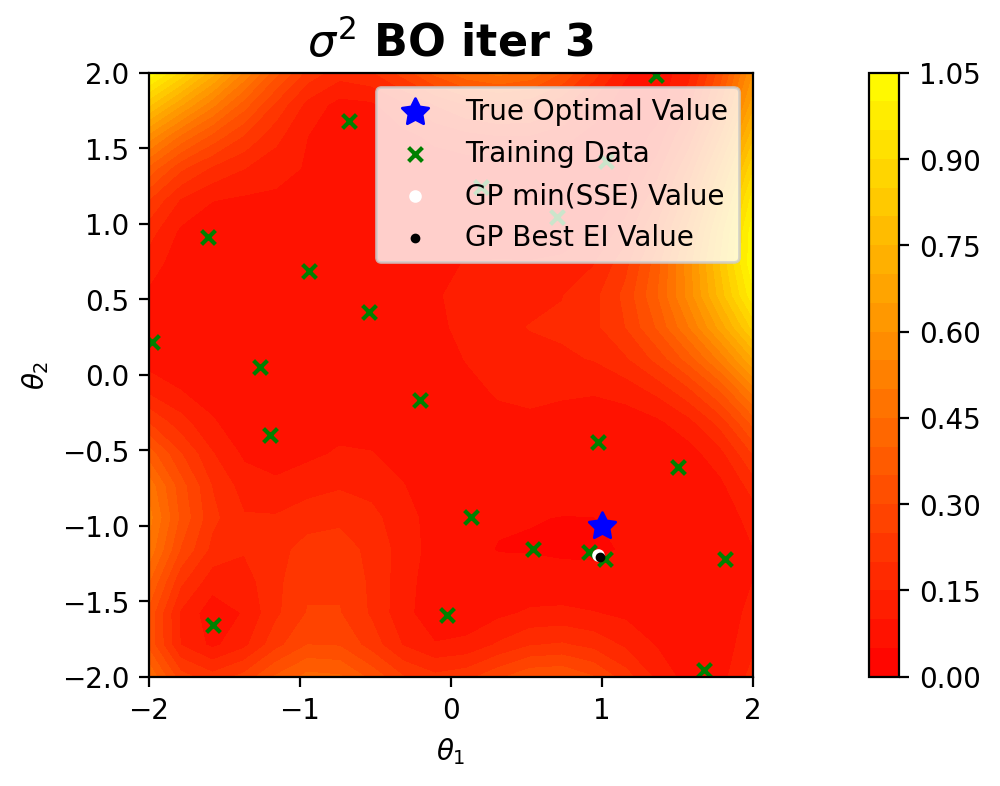

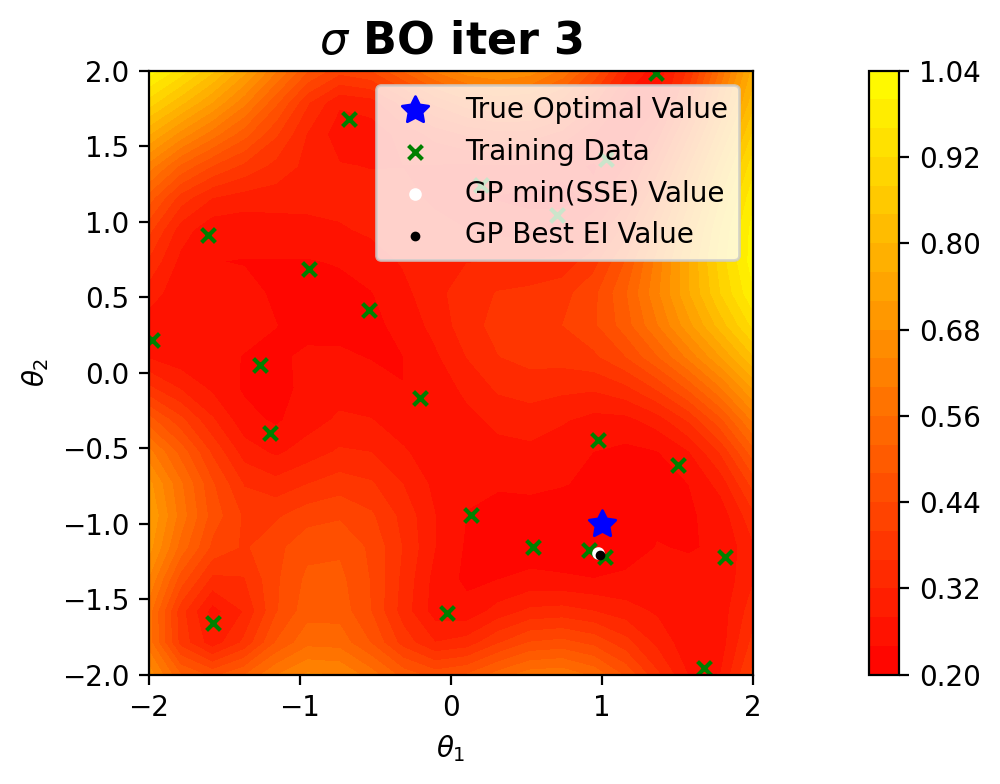

Best Error is: 0.0658


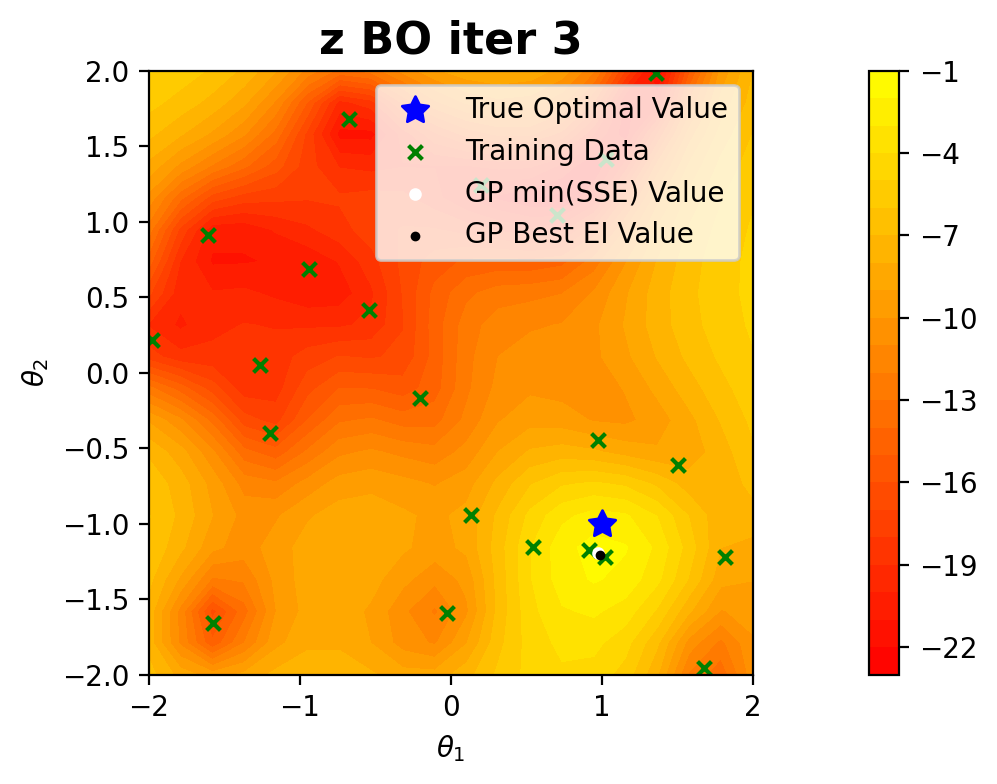

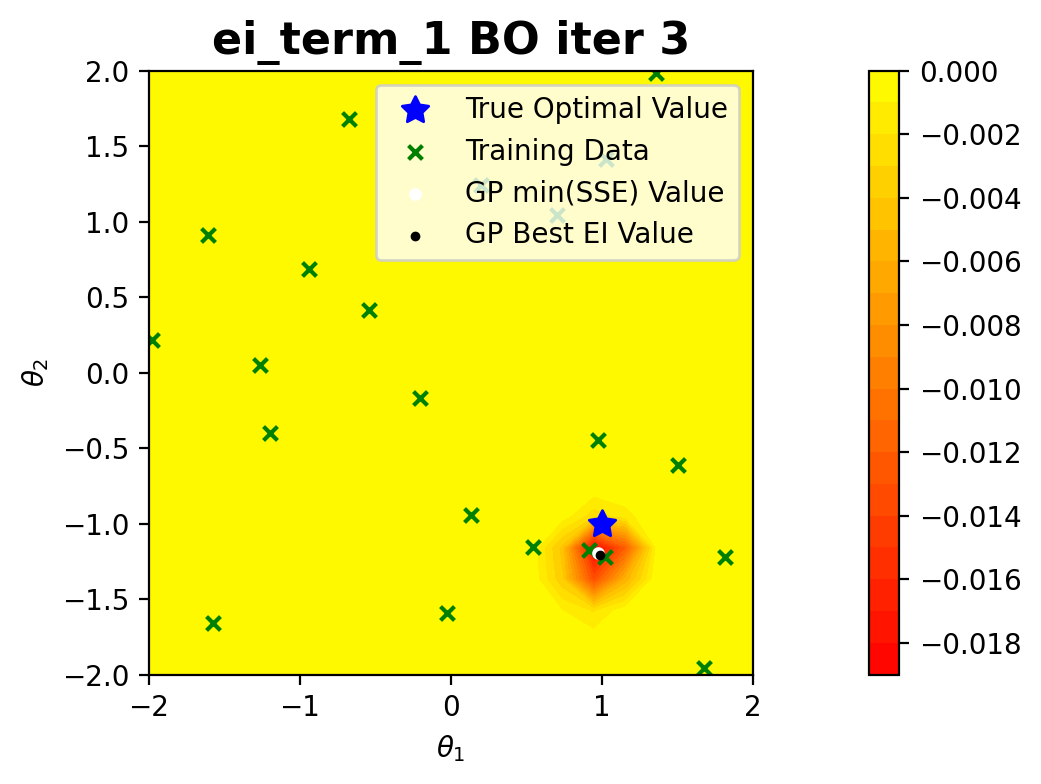

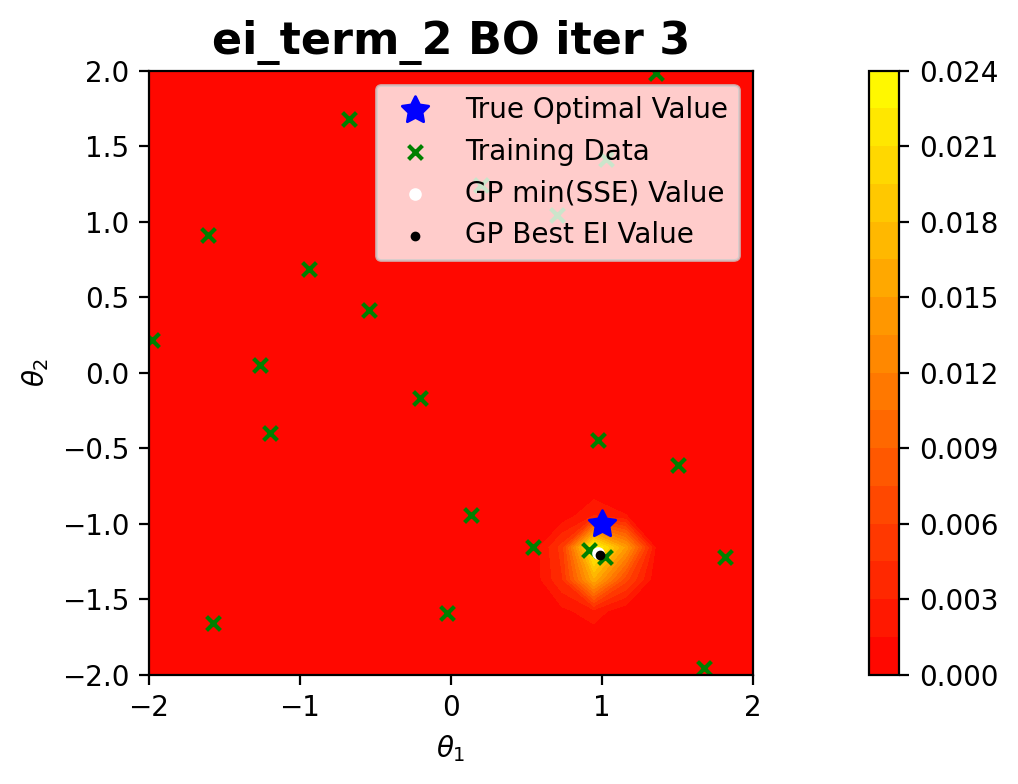

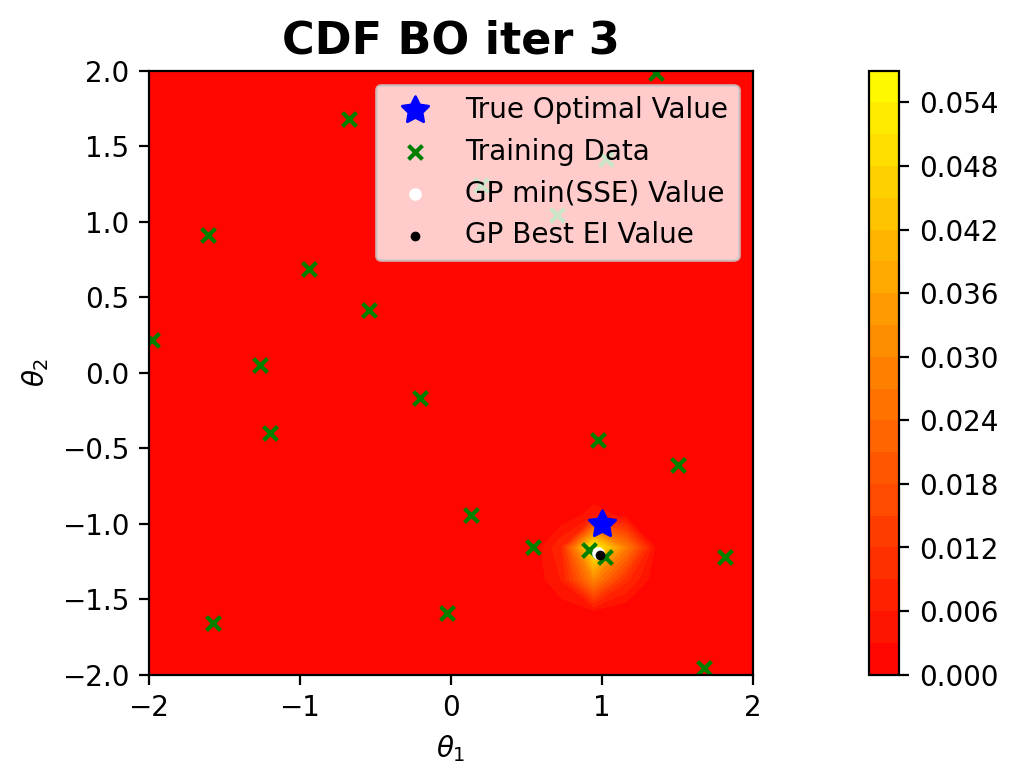

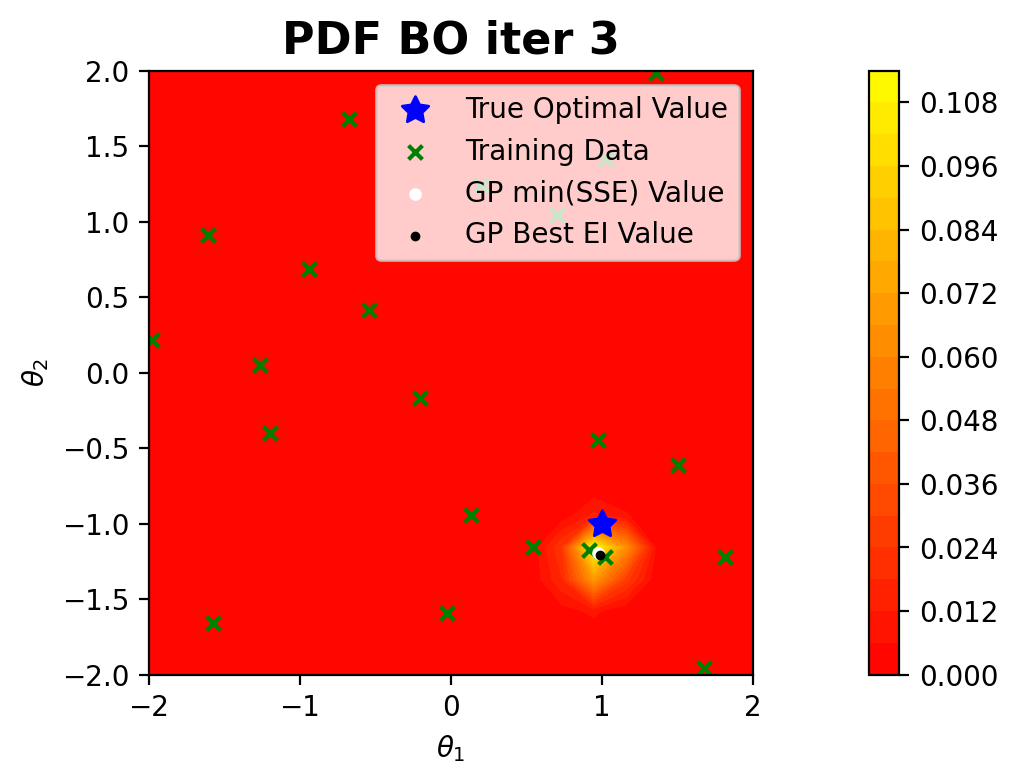

Magnitude of ln(SSE) given Theta_Opt =  [ 0.97435763 -1.19546798] is 2.3025e-01
BO Iteration =  4
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 0.99280549 -1.20424907]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.97941711 -1.19670088]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.0032676844609939304 



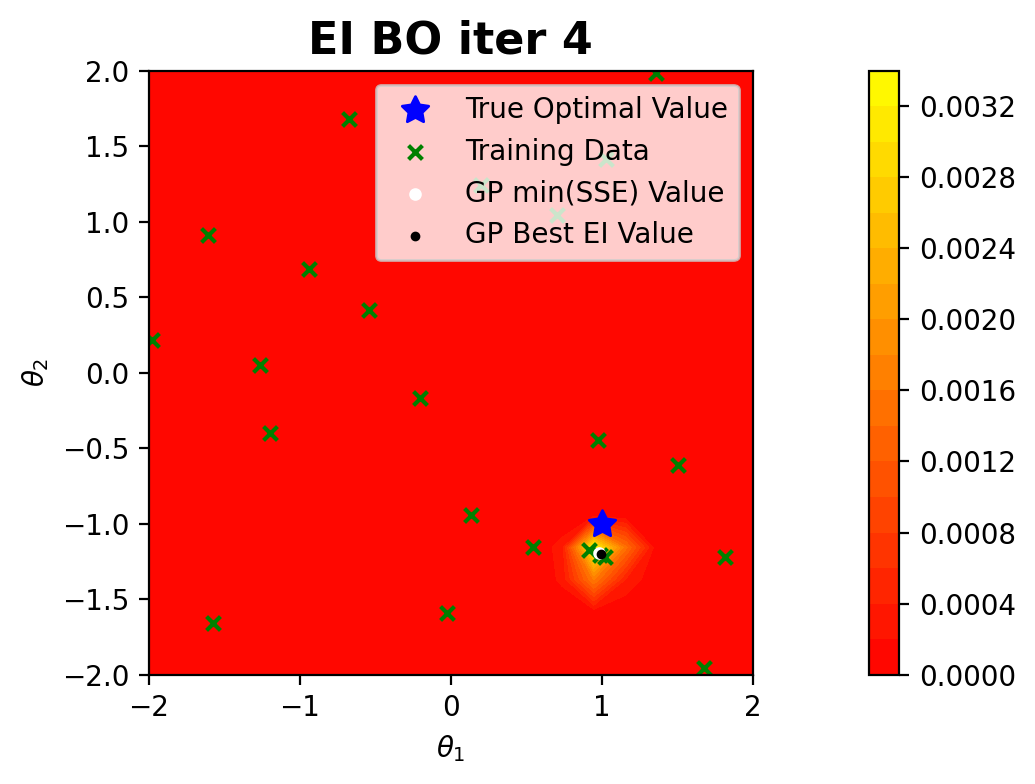

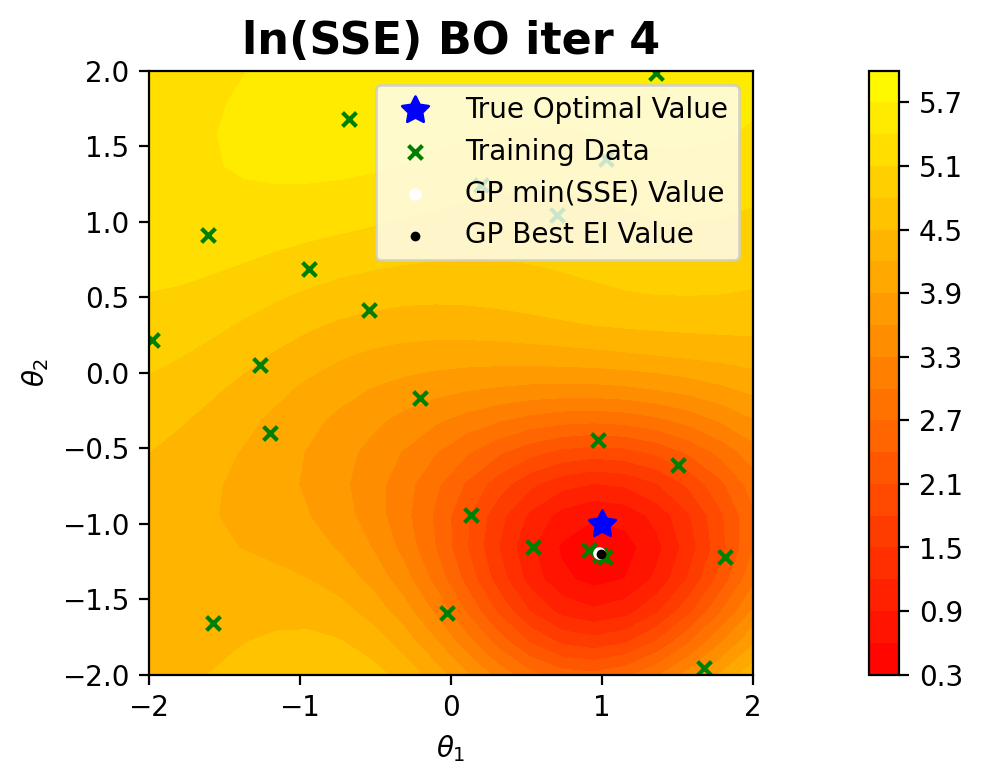

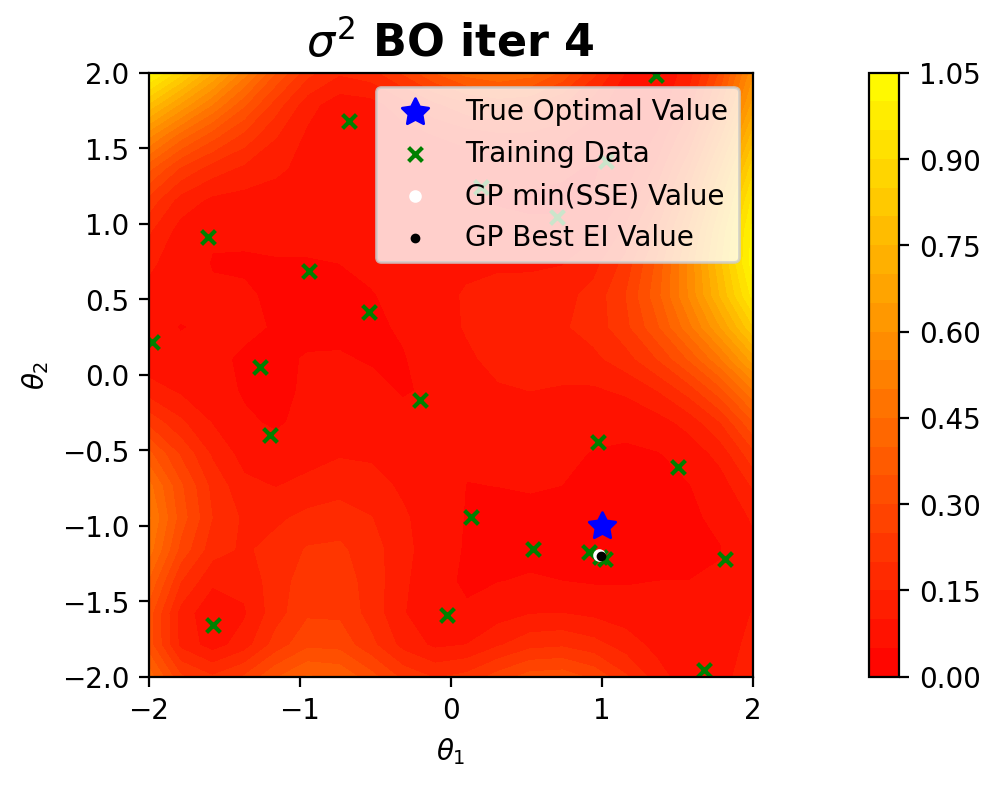

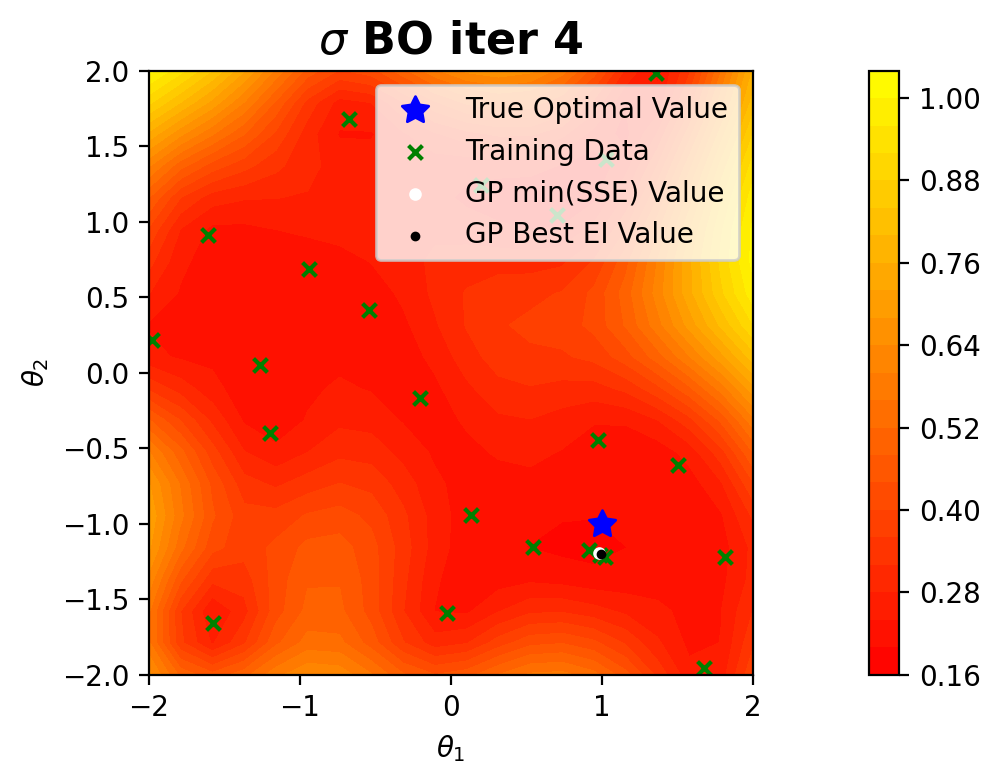

Best Error is: 0.0658


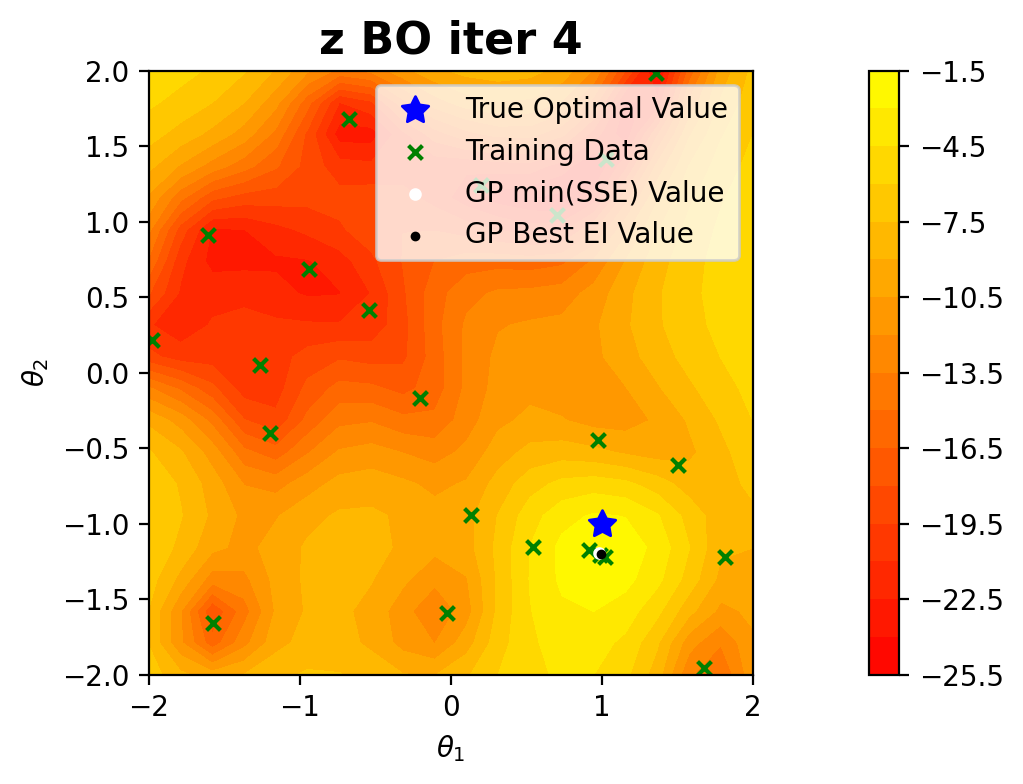

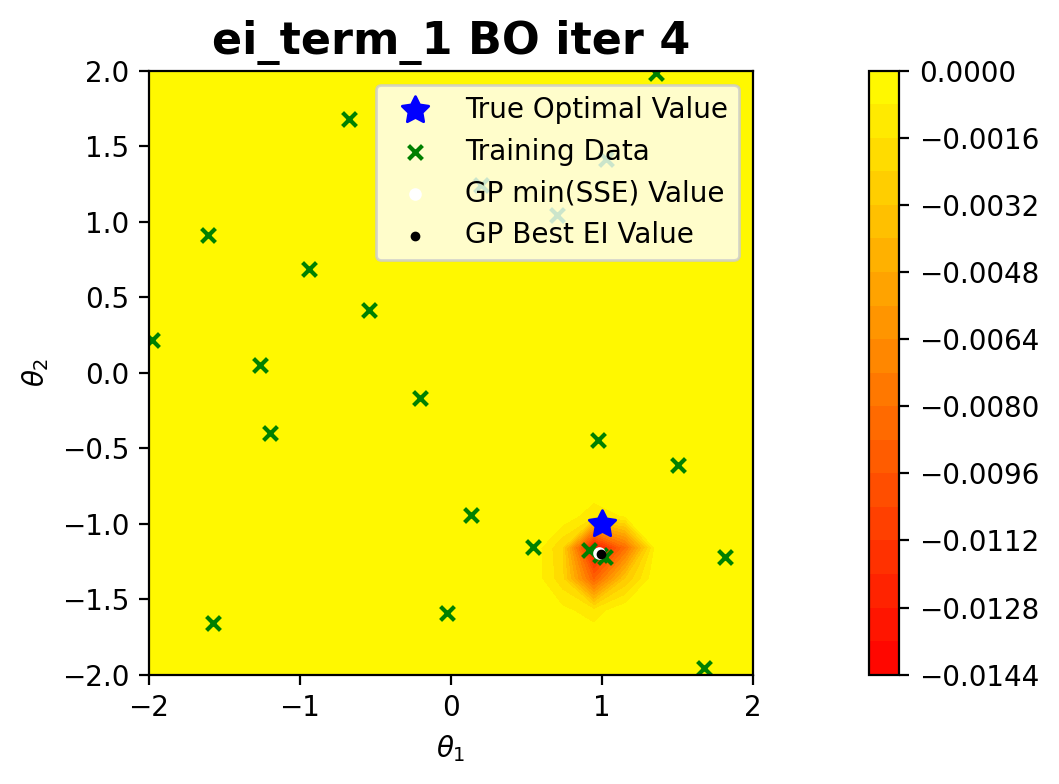

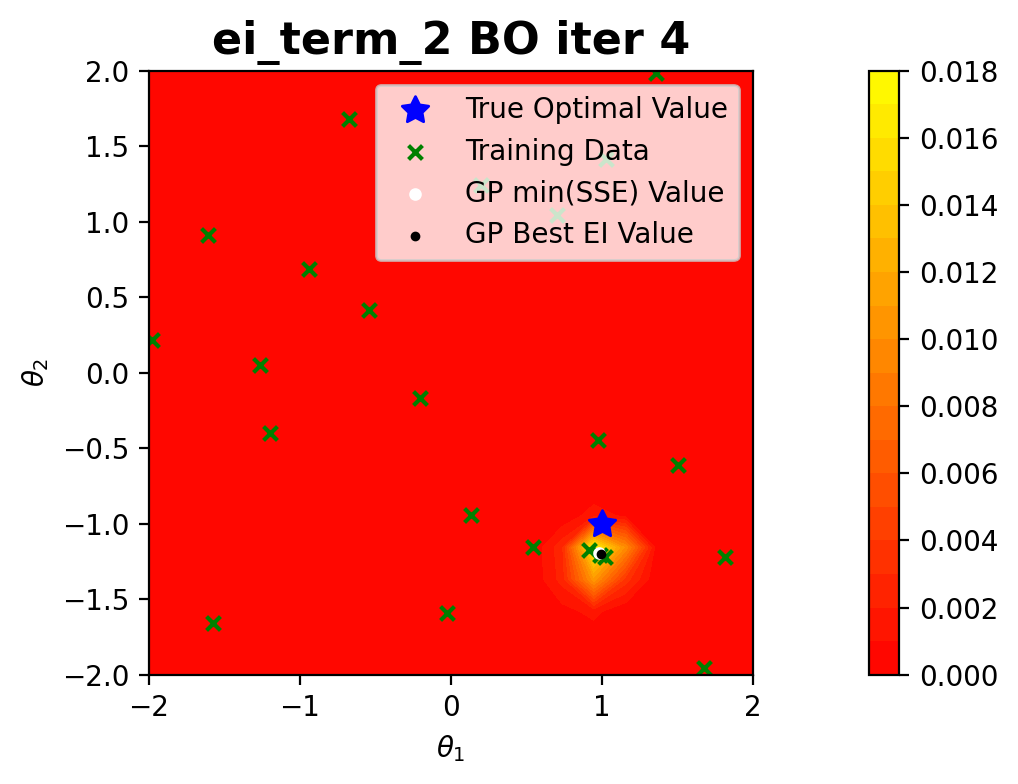

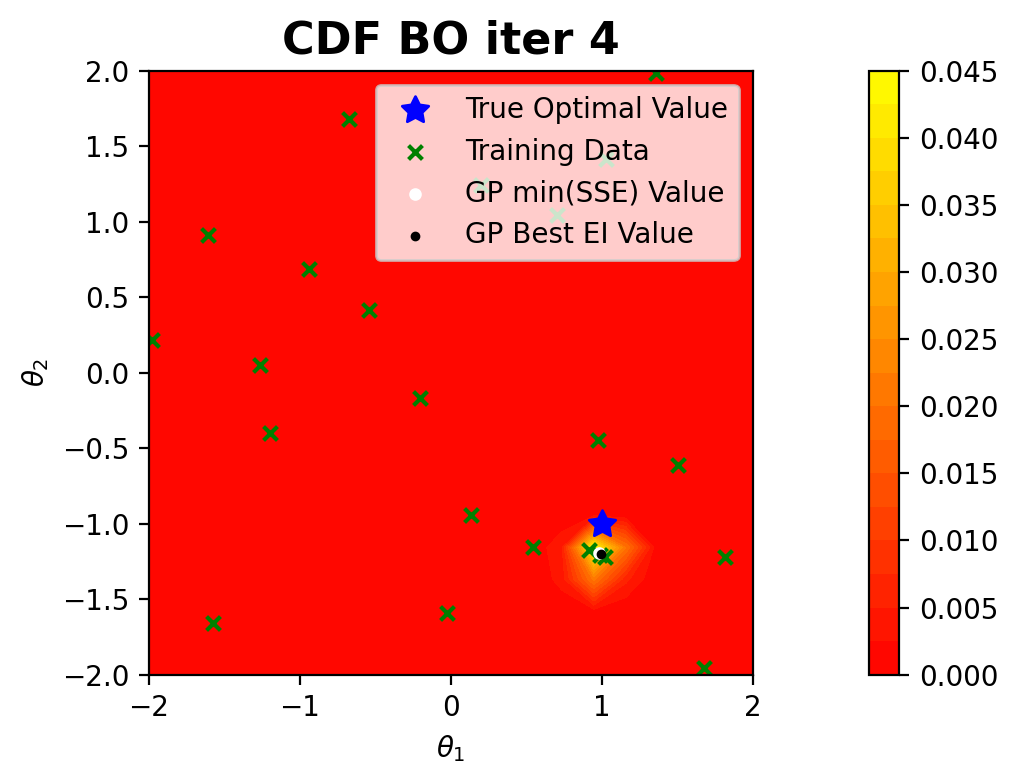

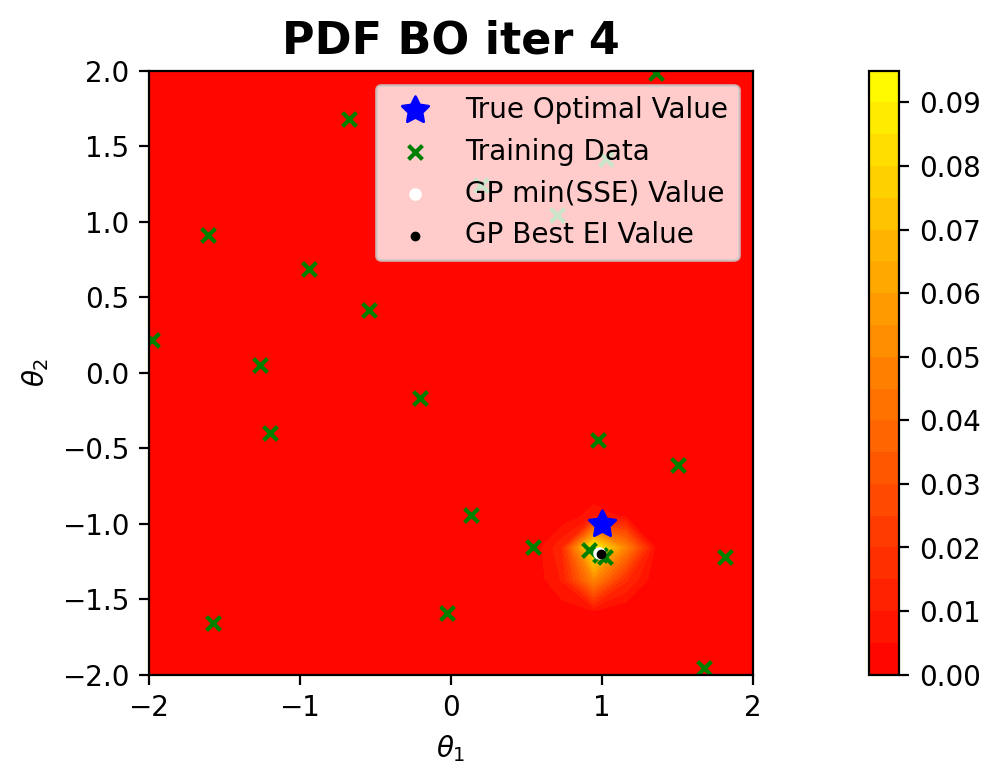

Magnitude of ln(SSE) given Theta_Opt =  [ 0.97941711 -1.19670088] is 2.4164e-01
BO Iteration =  5
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 0.99615965 -1.20129988]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.98432855 -1.19703989]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.0023930794074019483 



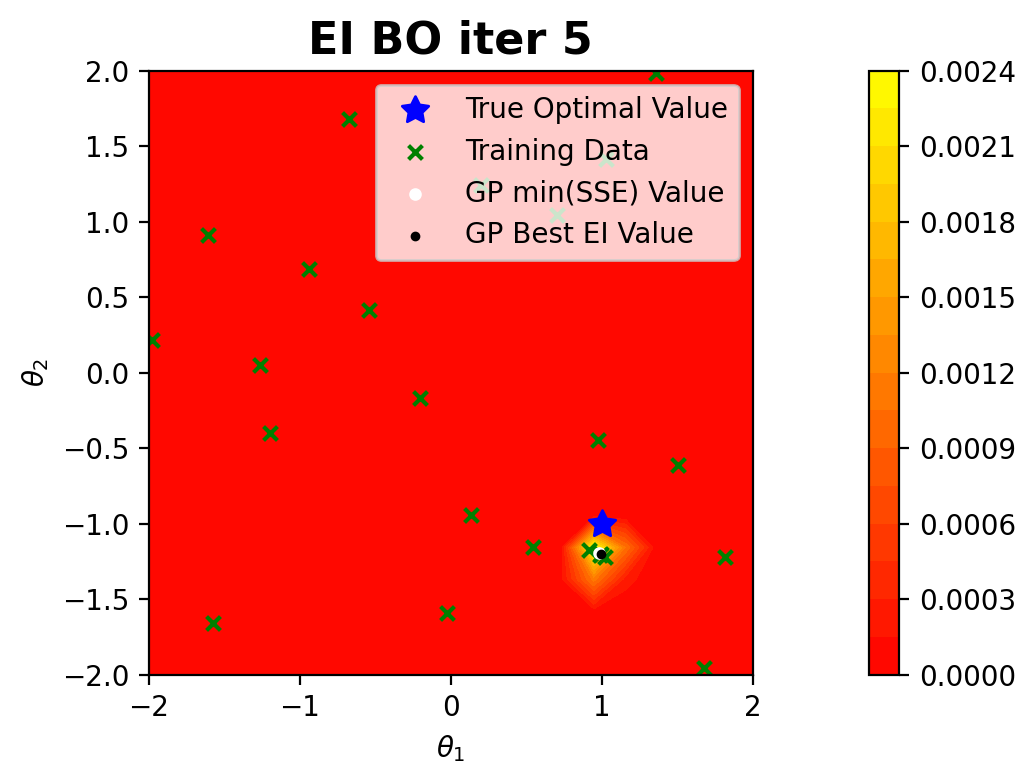

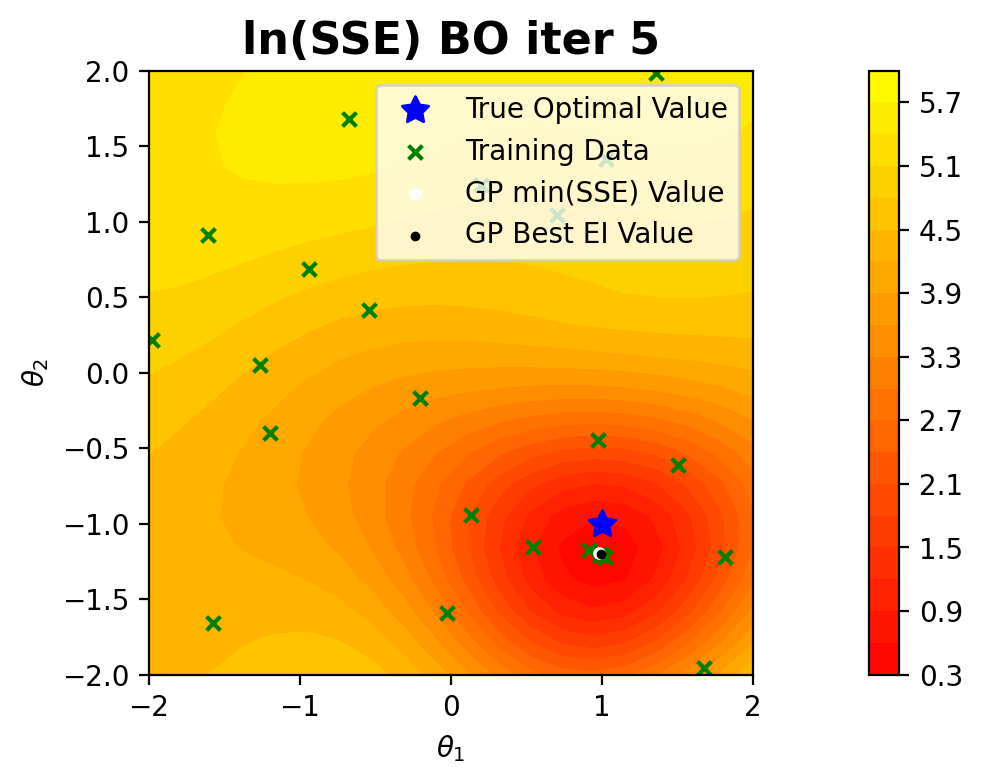

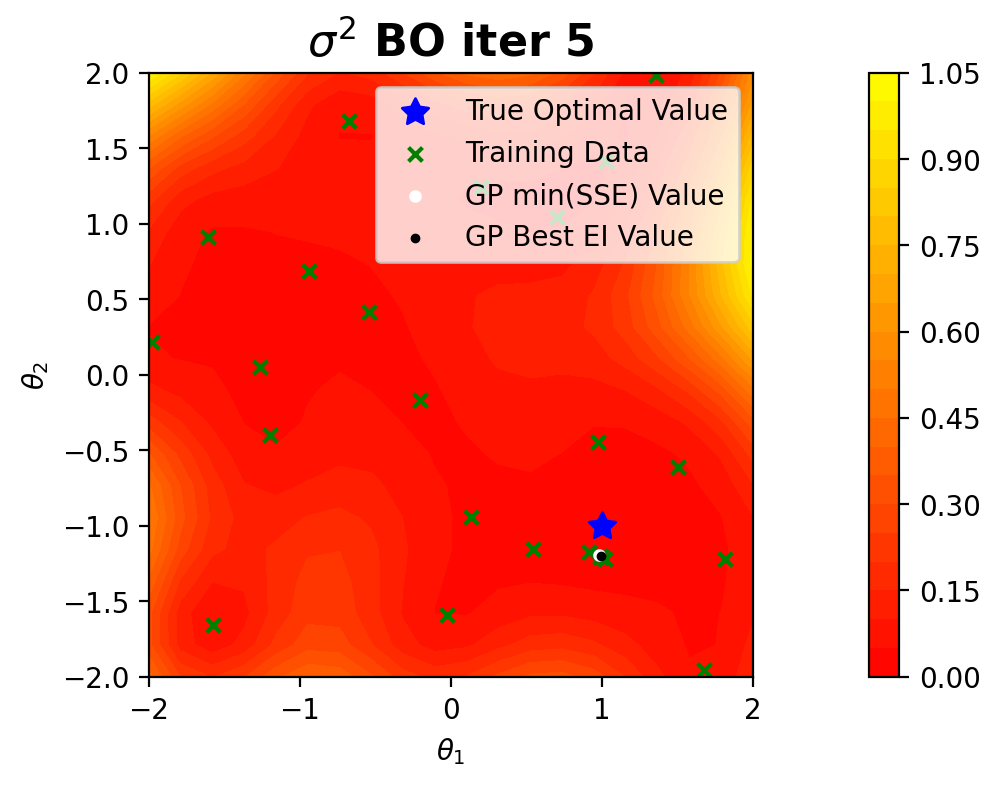

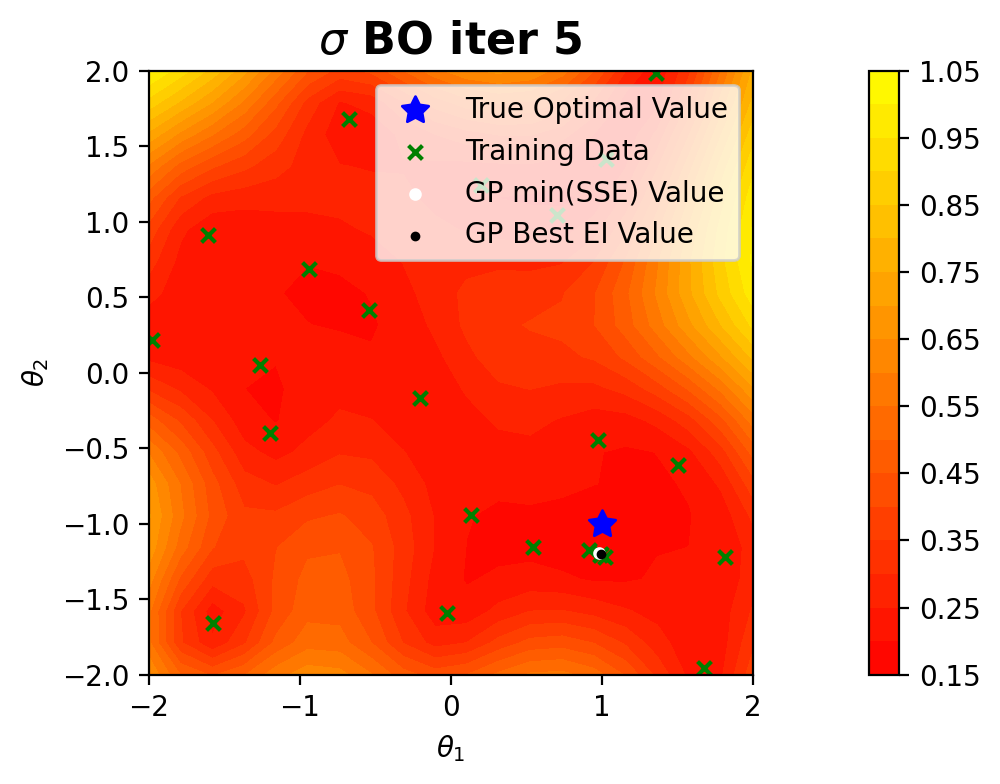

Best Error is: 0.0658


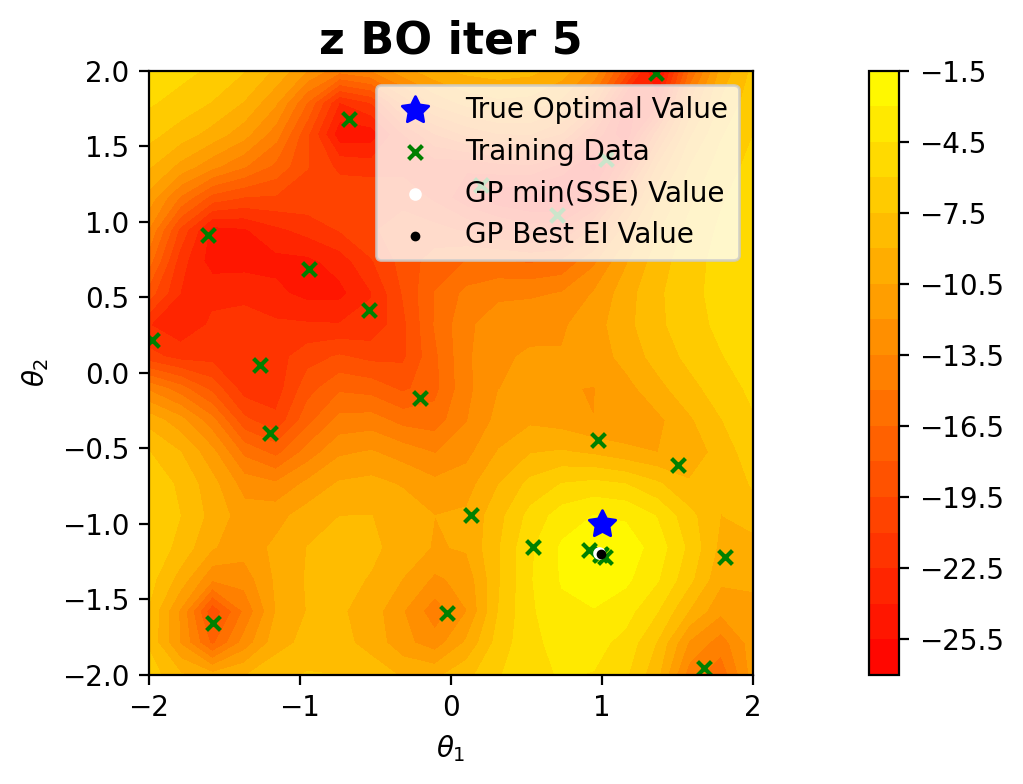

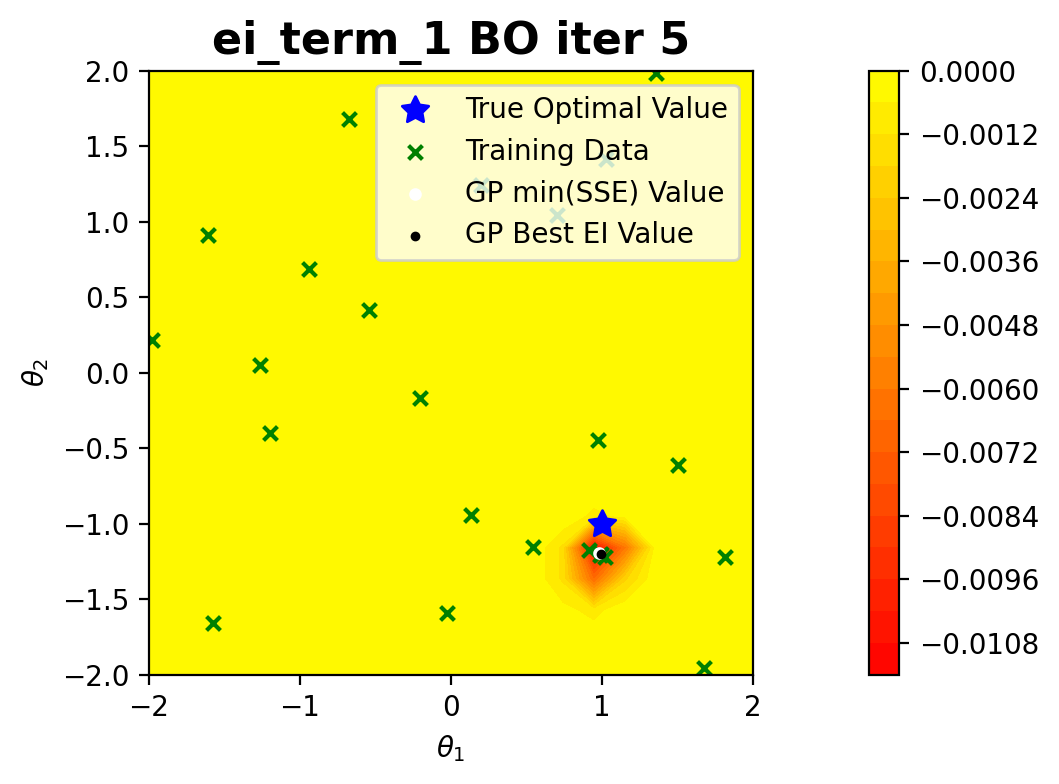

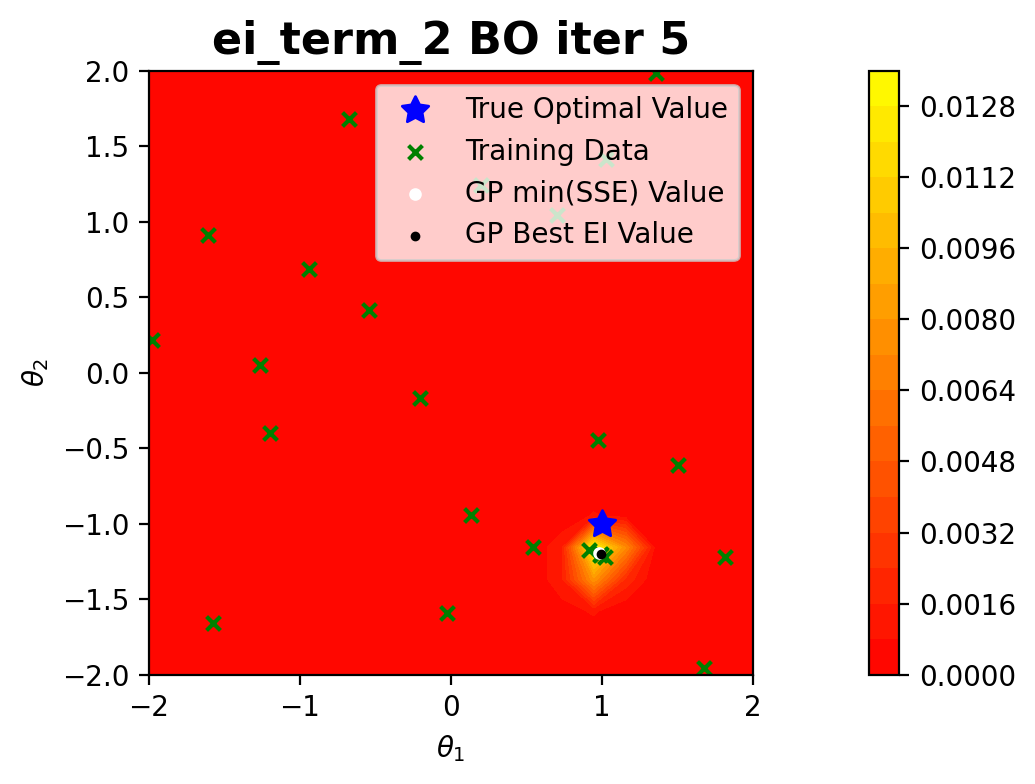

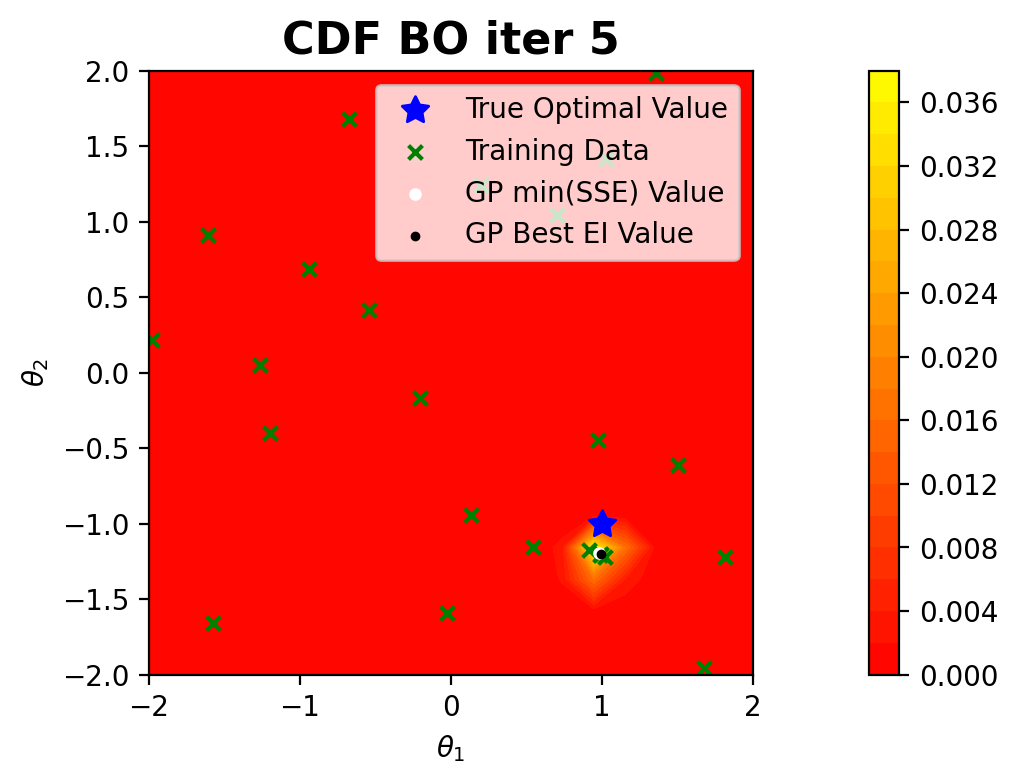

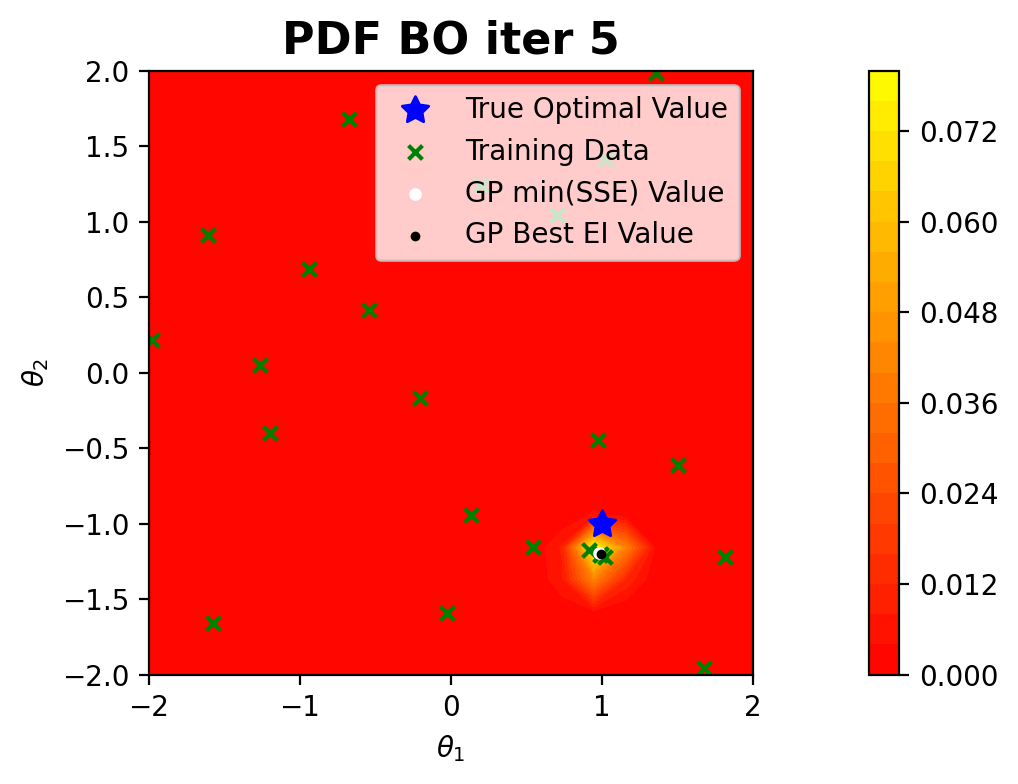

Magnitude of ln(SSE) given Theta_Opt =  [ 0.98432855 -1.19703989] is 2.4420e-01
BO Iteration =  6
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.00009895 -1.19826555]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.98907306 -1.19656102]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.0019036951231196 



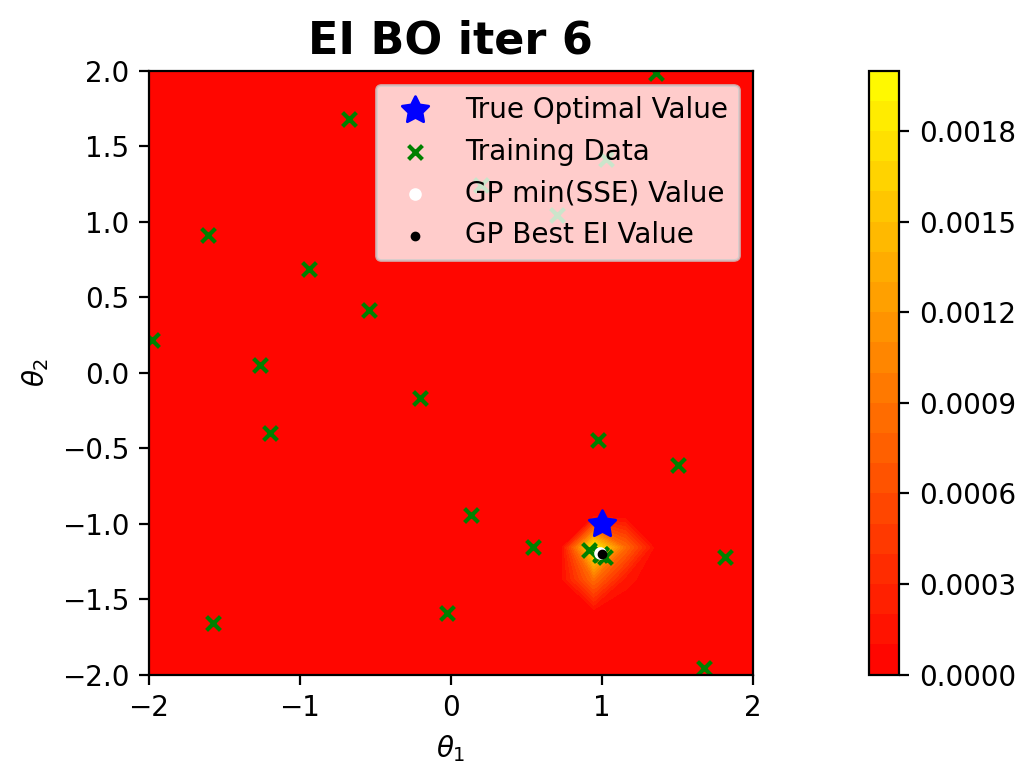

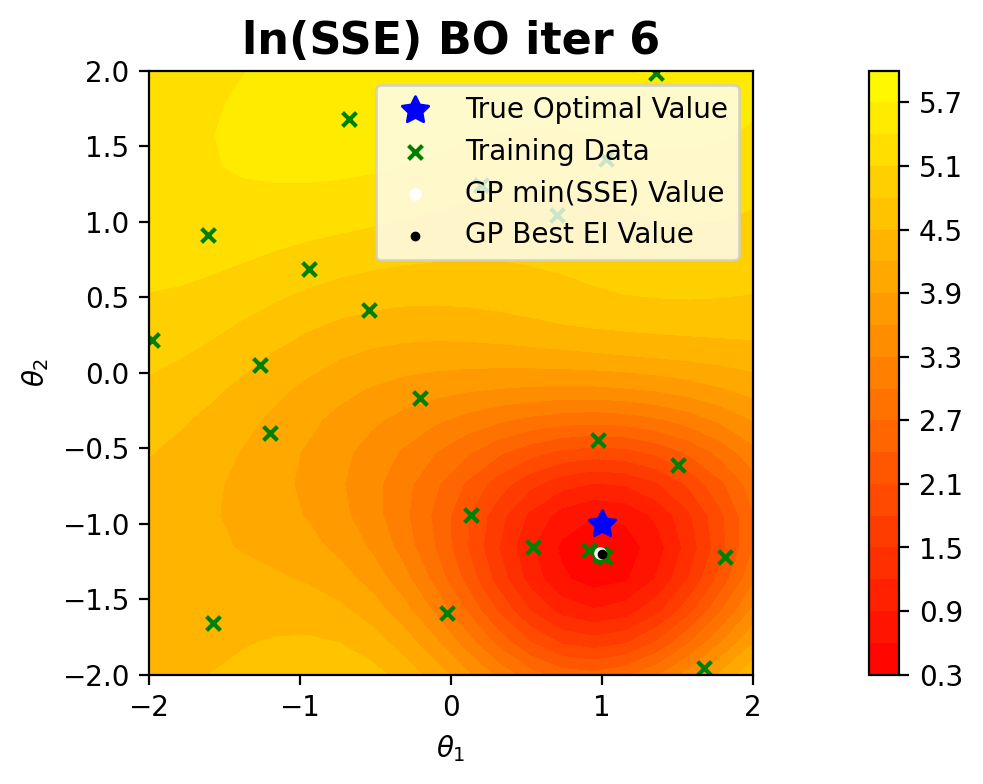

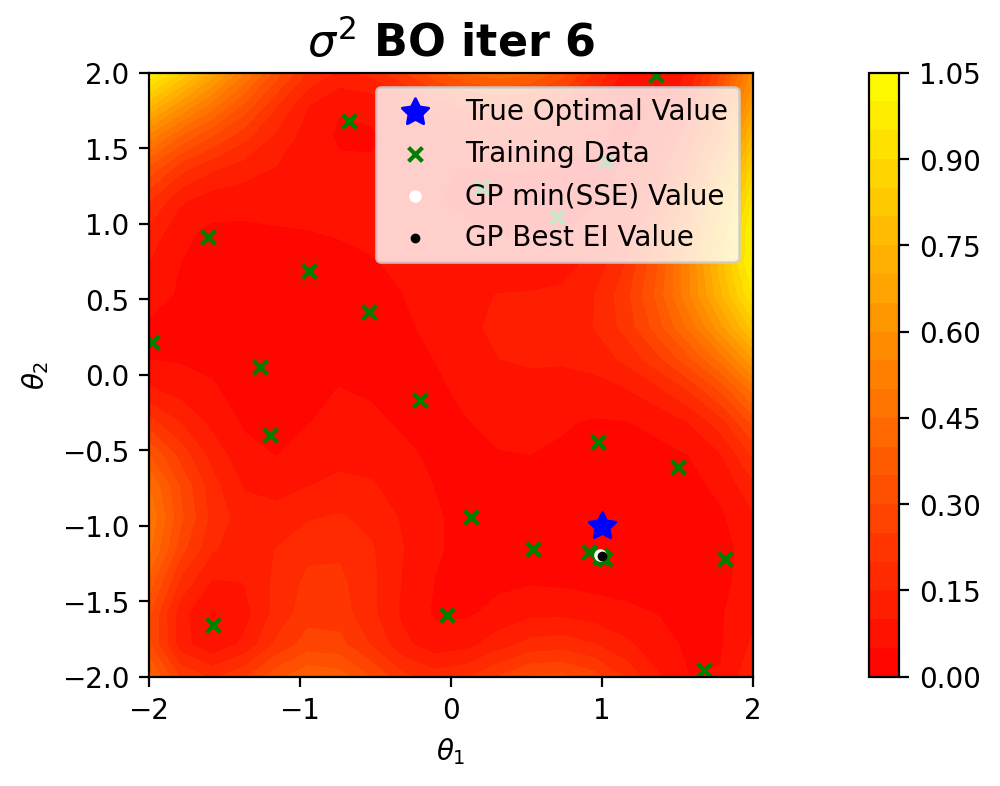

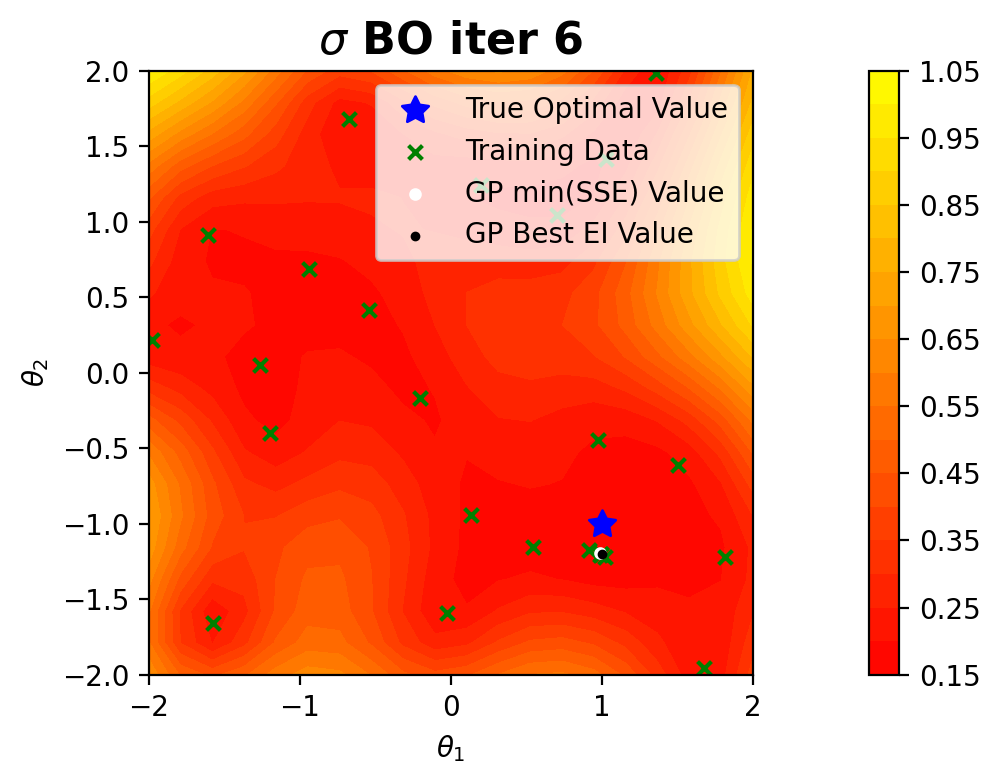

Best Error is: 0.0658


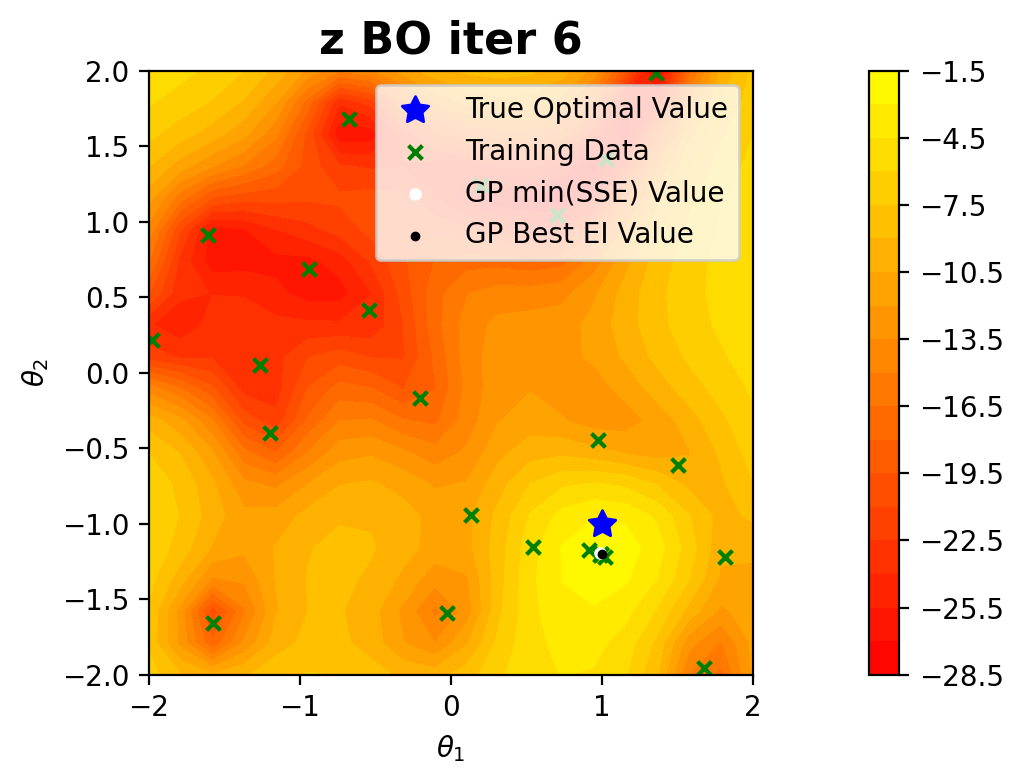

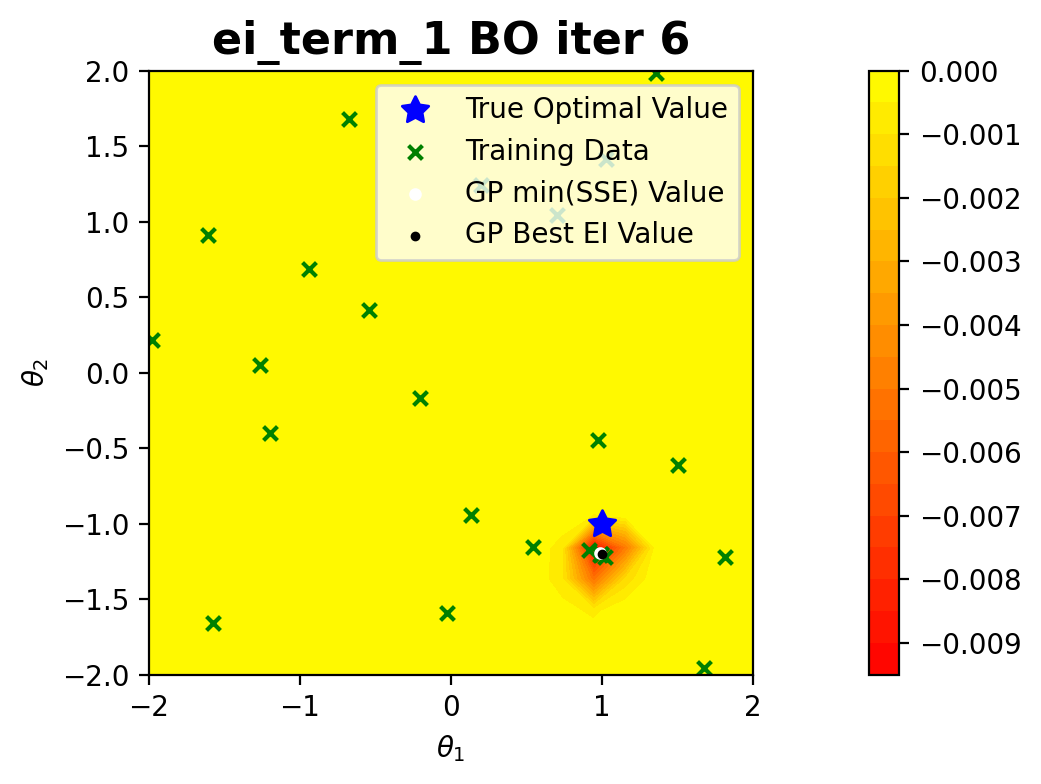

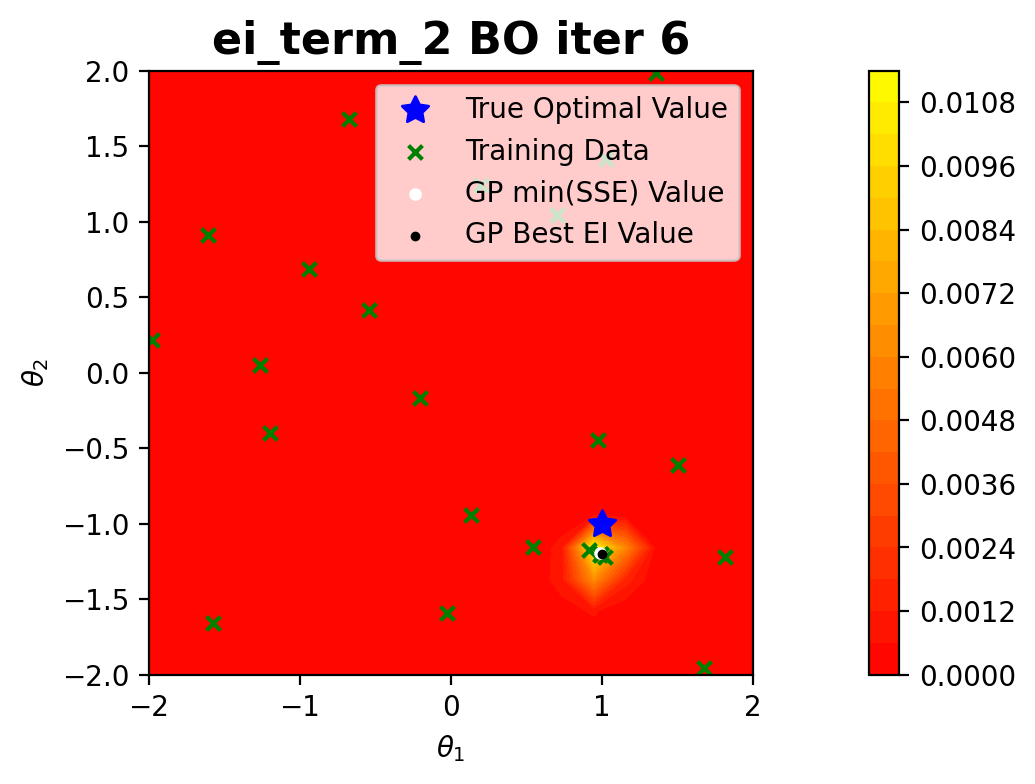

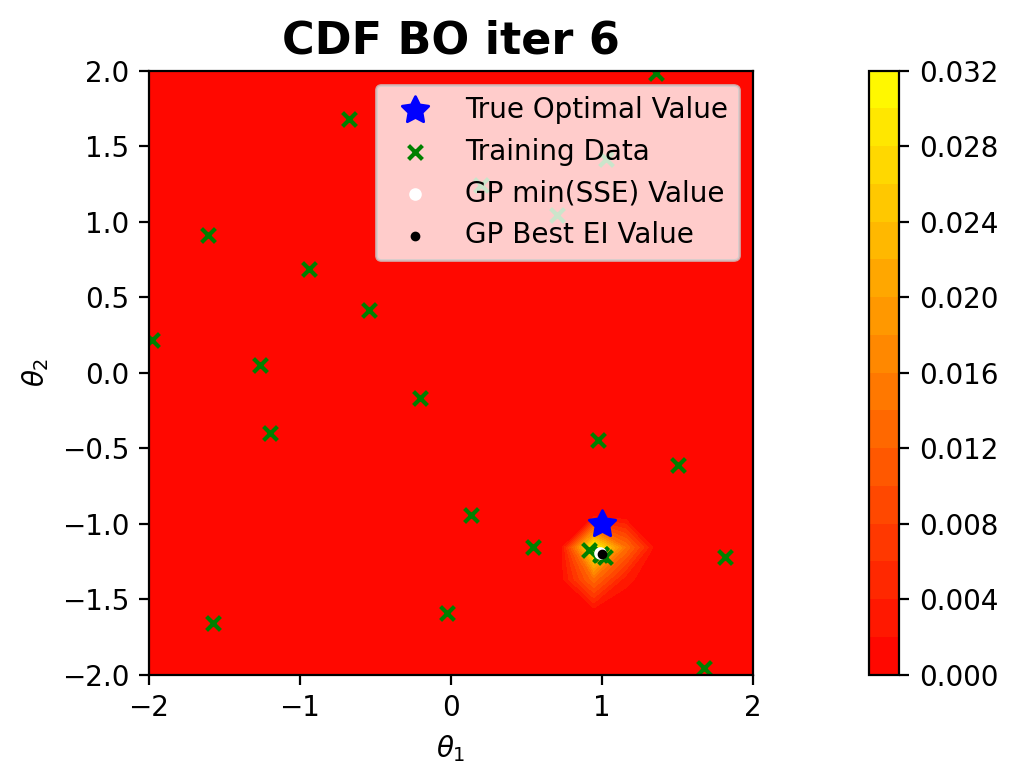

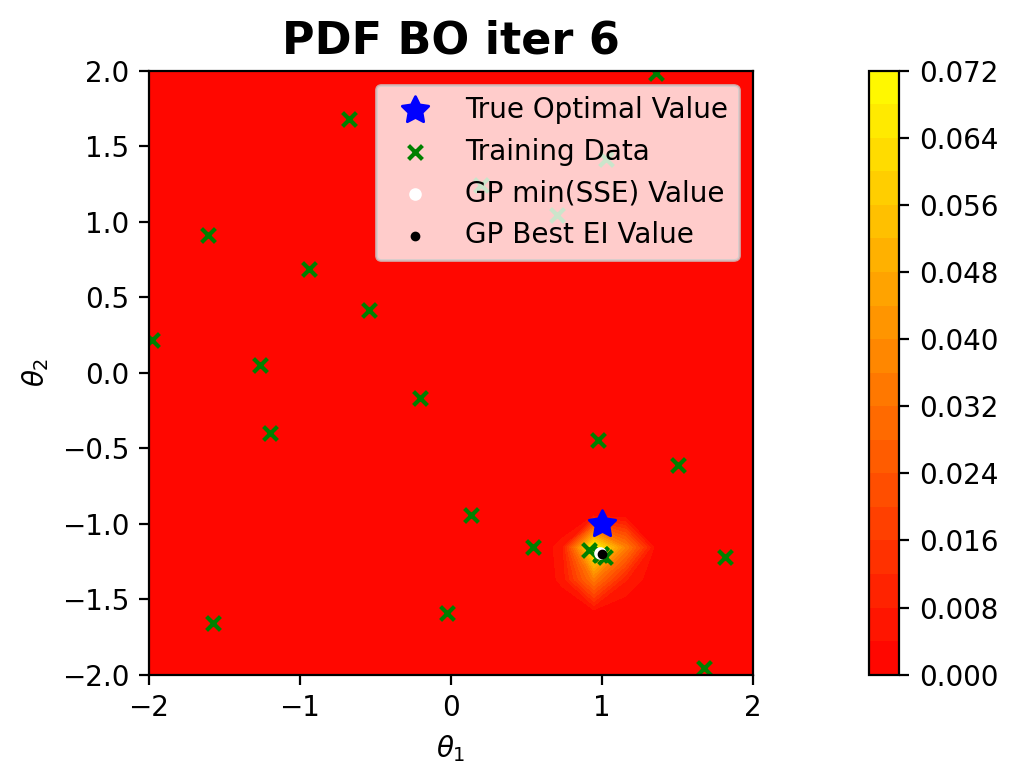

Magnitude of ln(SSE) given Theta_Opt =  [ 0.98907306 -1.19656102] is 2.3871e-01
BO Iteration =  7
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.00469152 -1.19468758]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.99394073 -1.19529659]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.0016690245361461343 



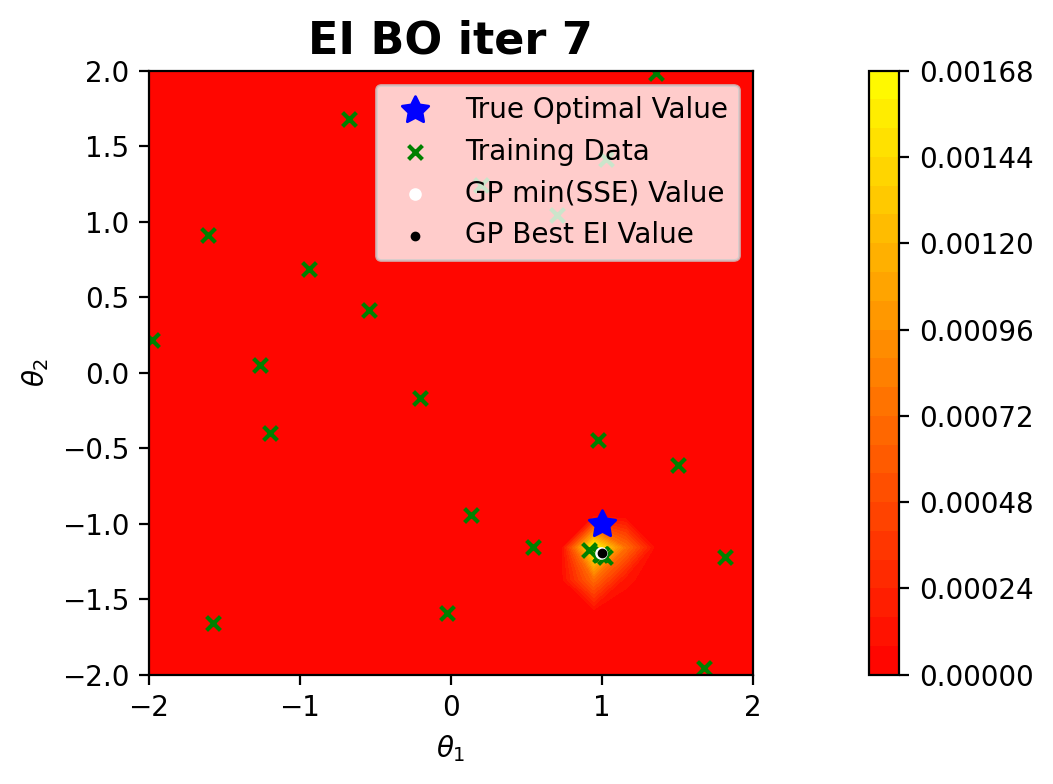

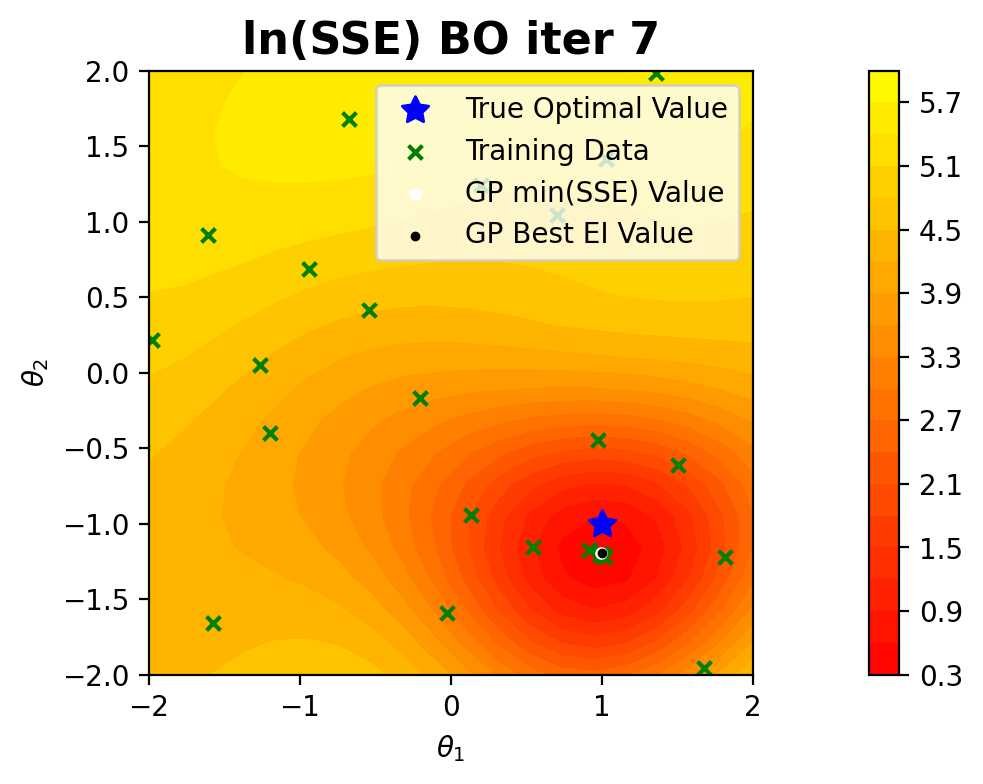

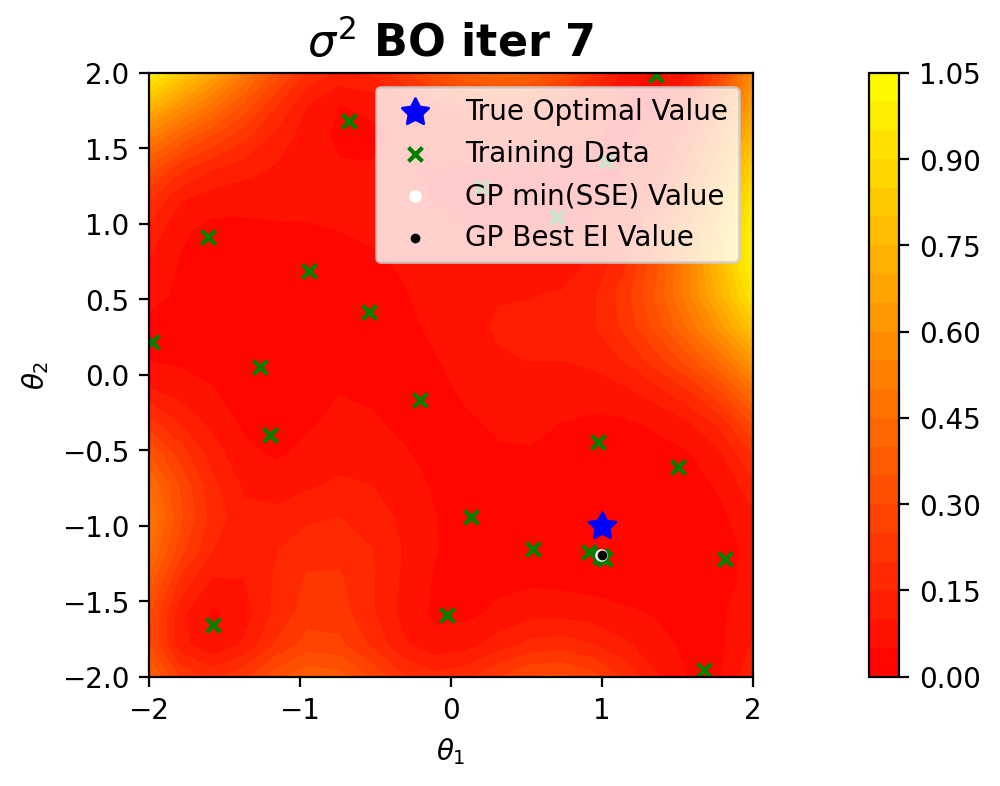

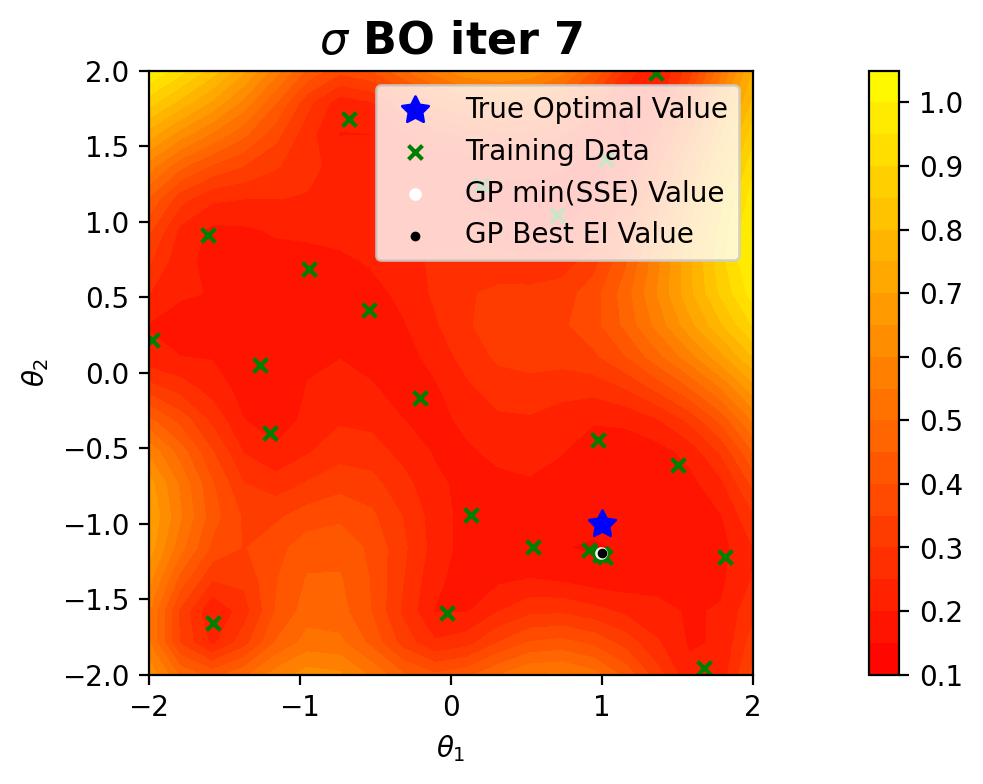

Best Error is: 0.0658


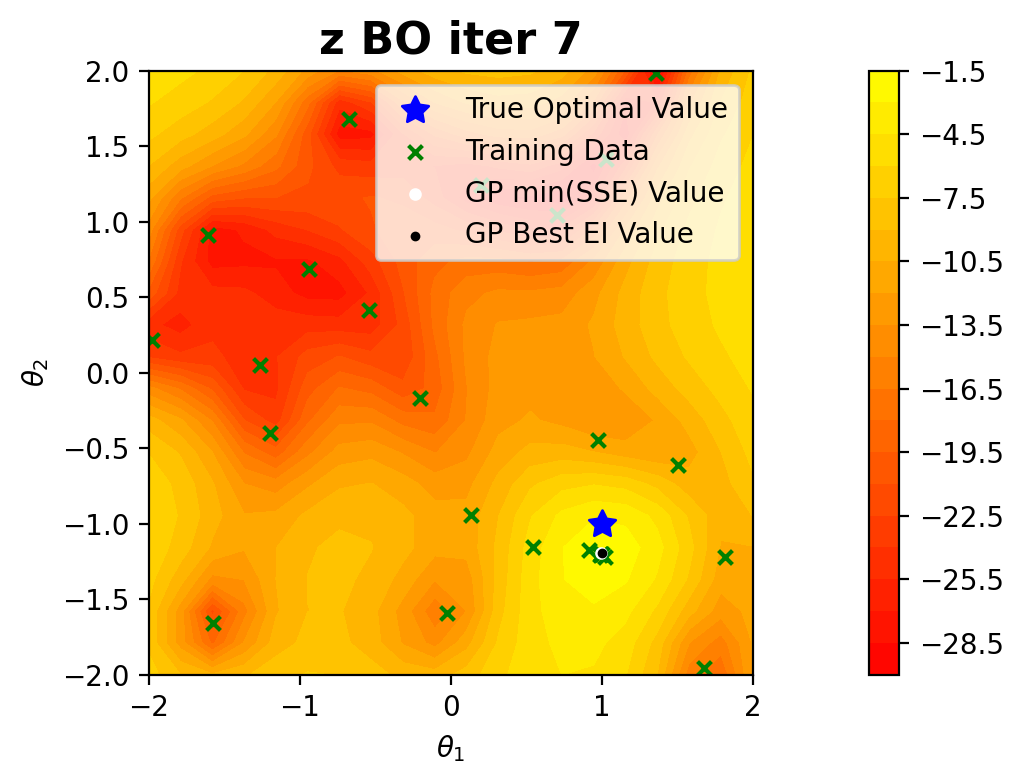

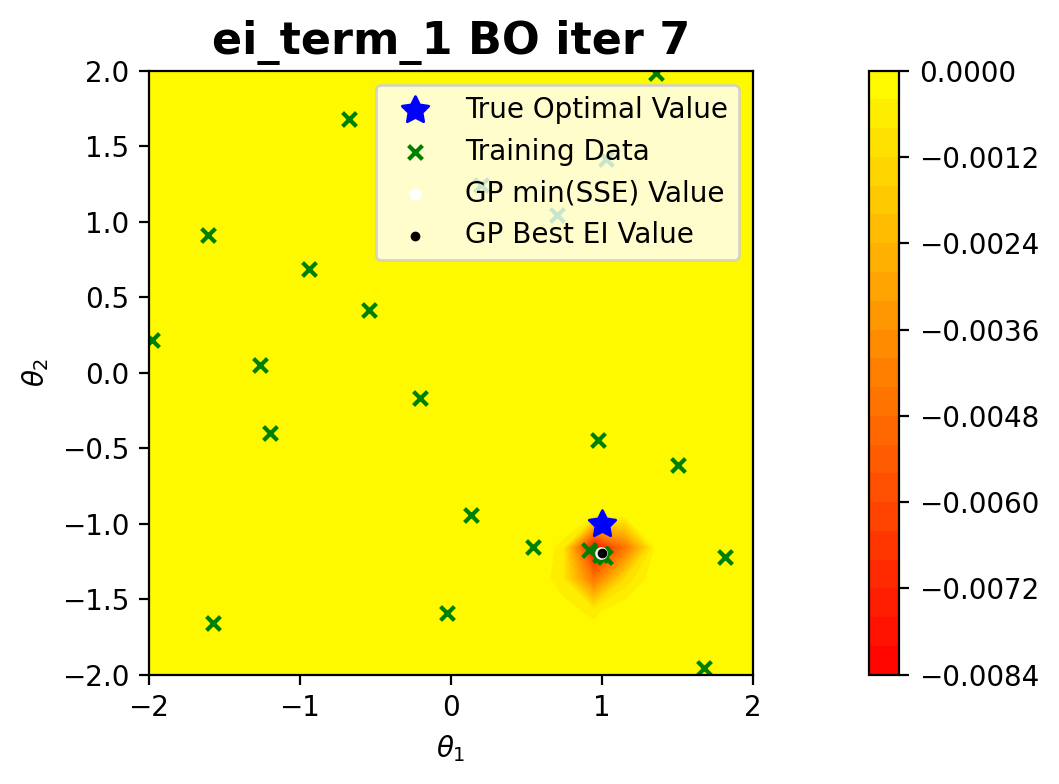

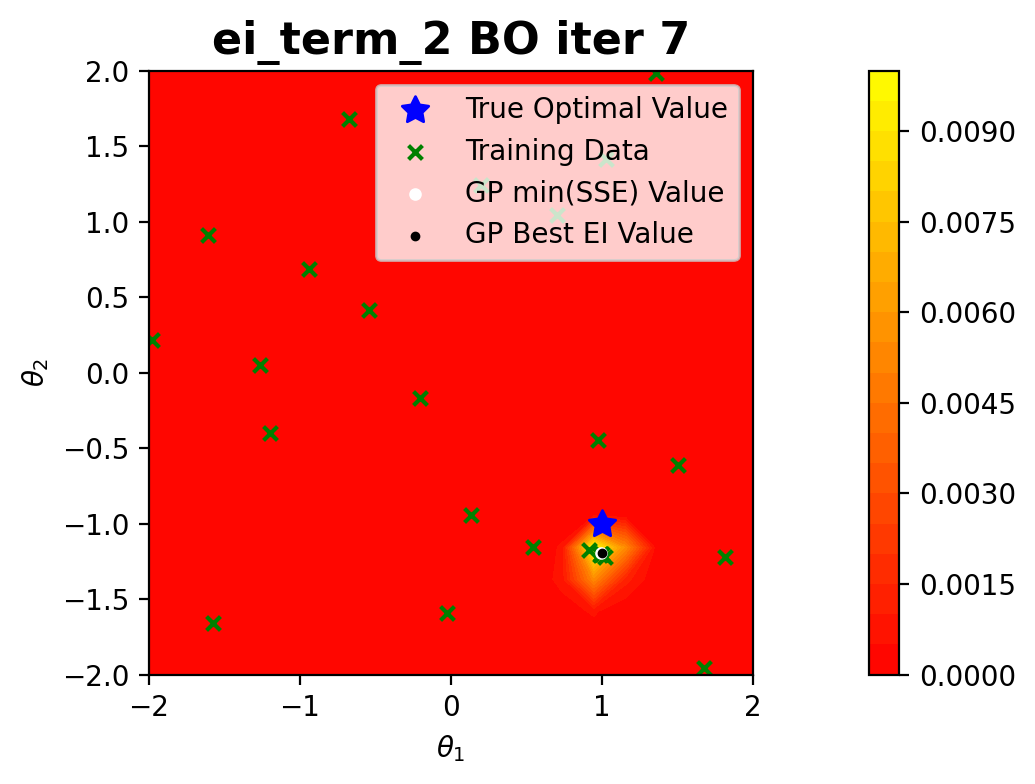

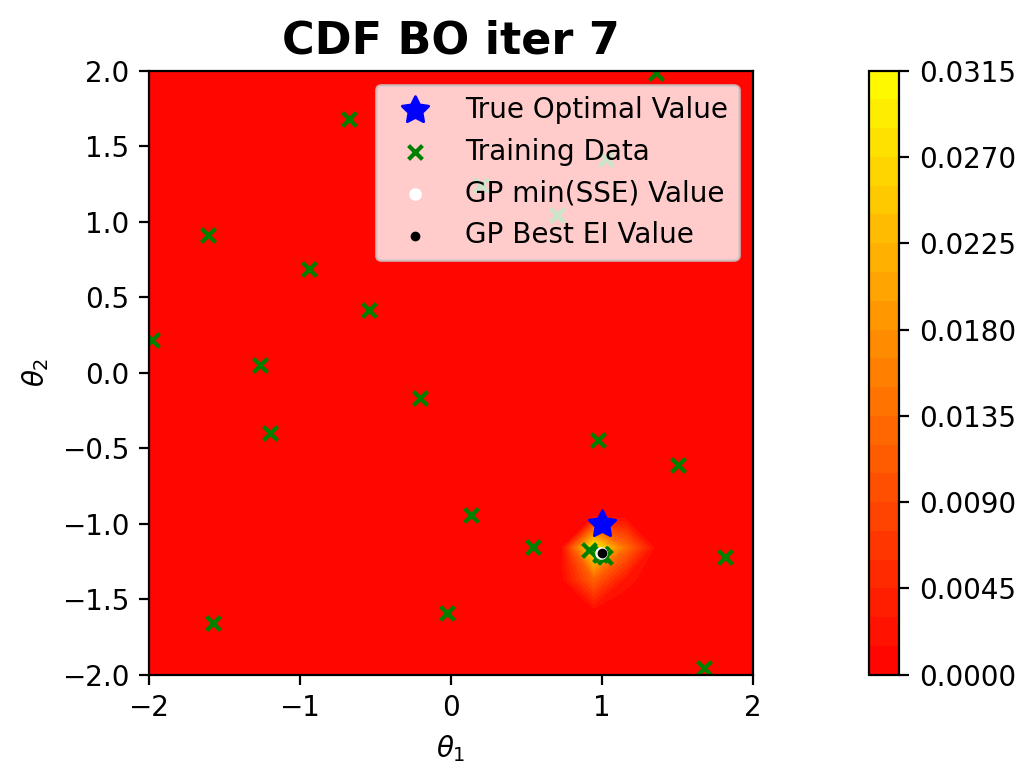

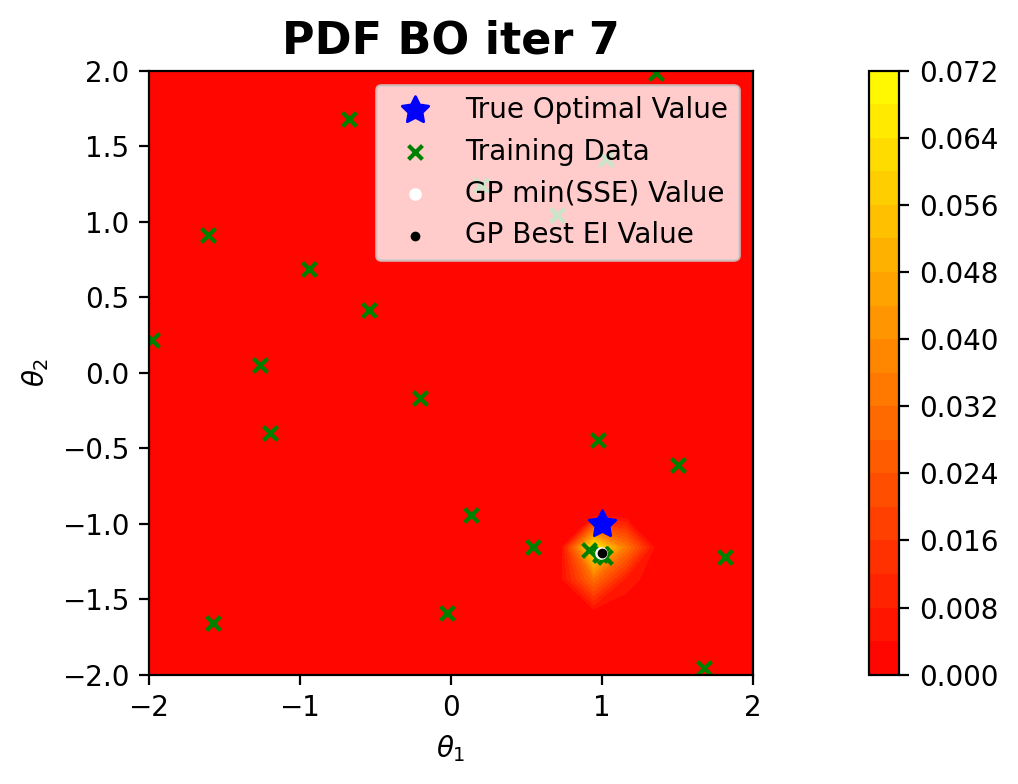

Magnitude of ln(SSE) given Theta_Opt =  [ 0.99394073 -1.19529659] is 2.2539e-01
BO Iteration =  8
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.01001524 -1.19020712]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.99923365 -1.19310969]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.001669307014233139 



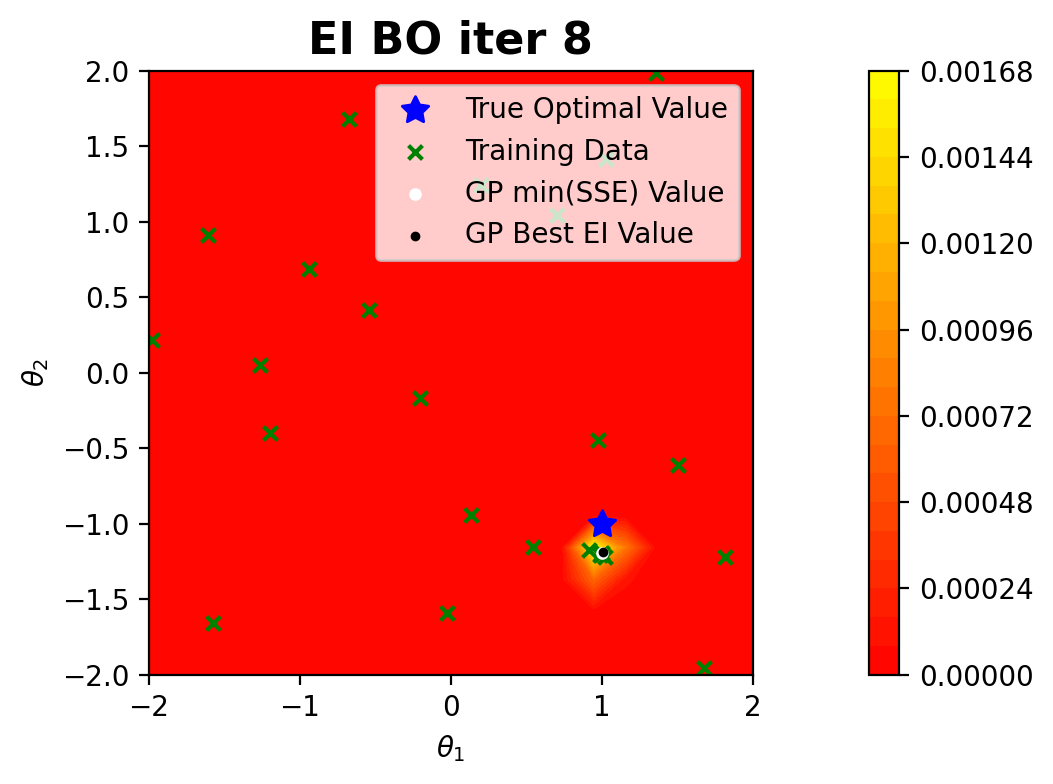

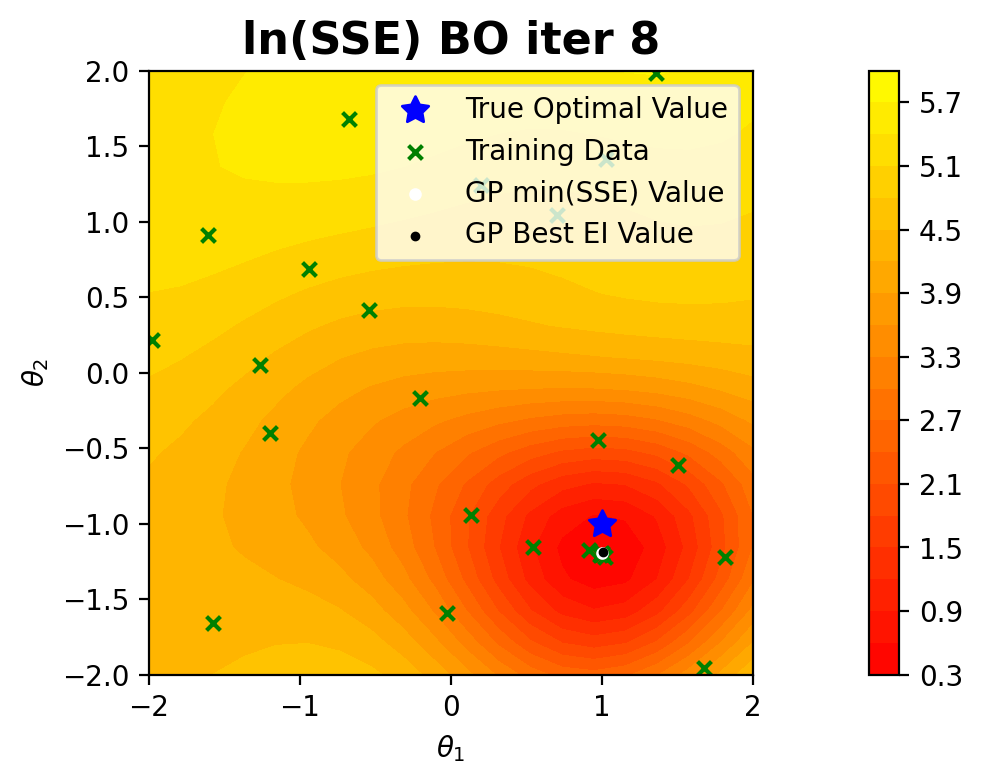

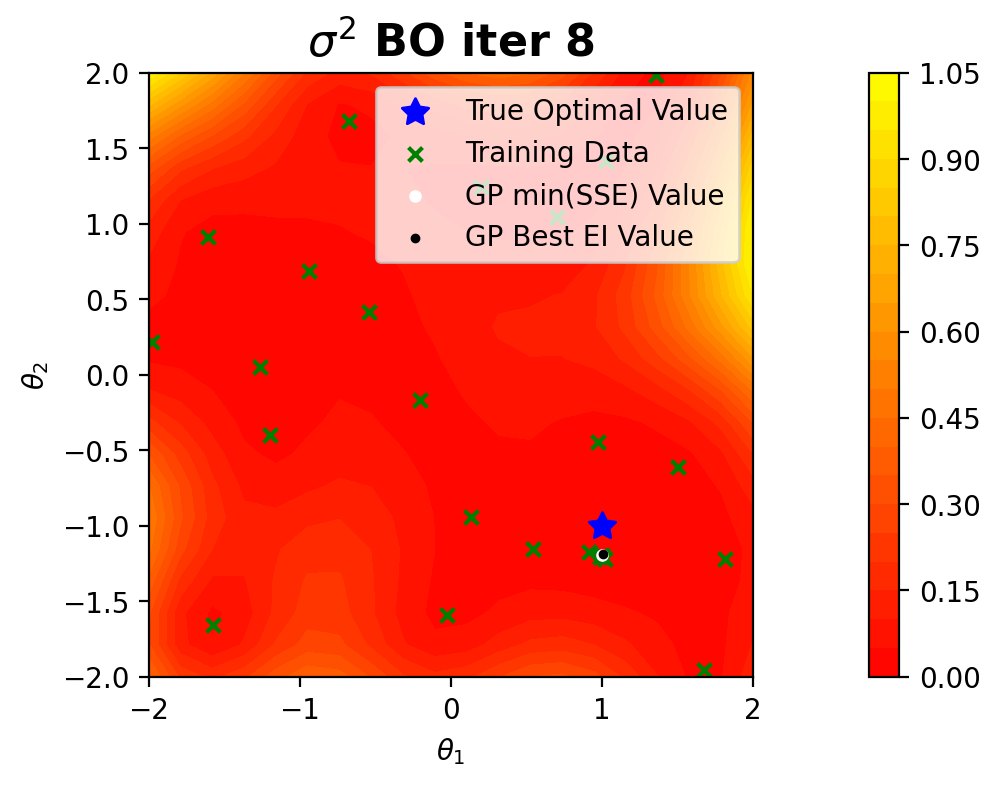

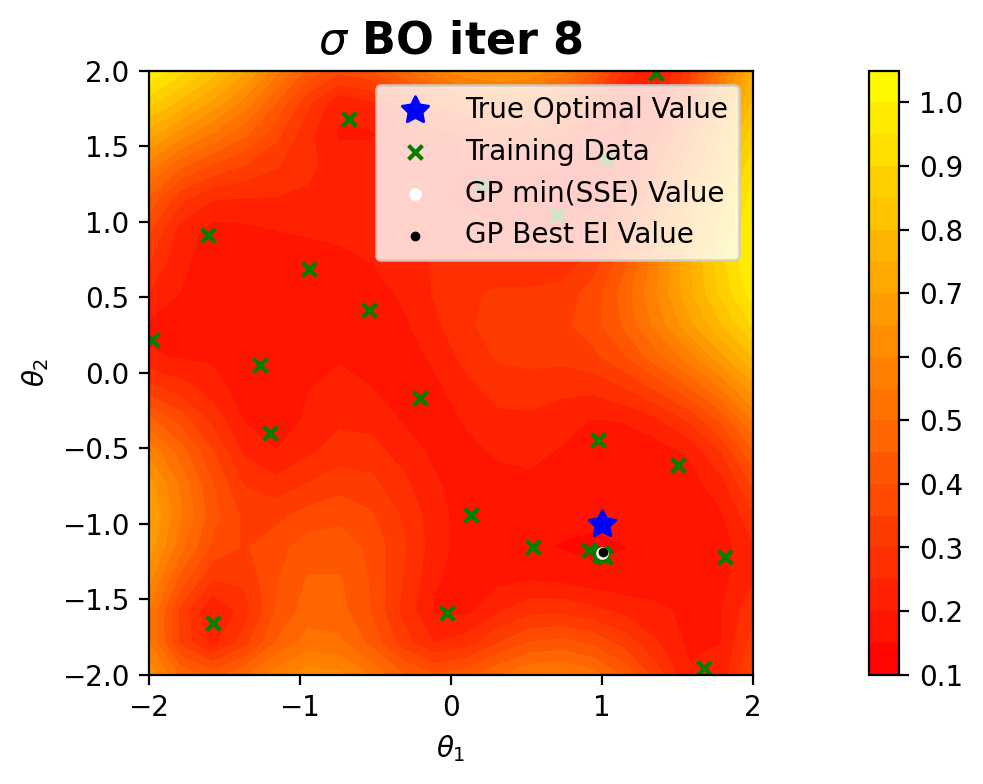

Best Error is: 0.0658


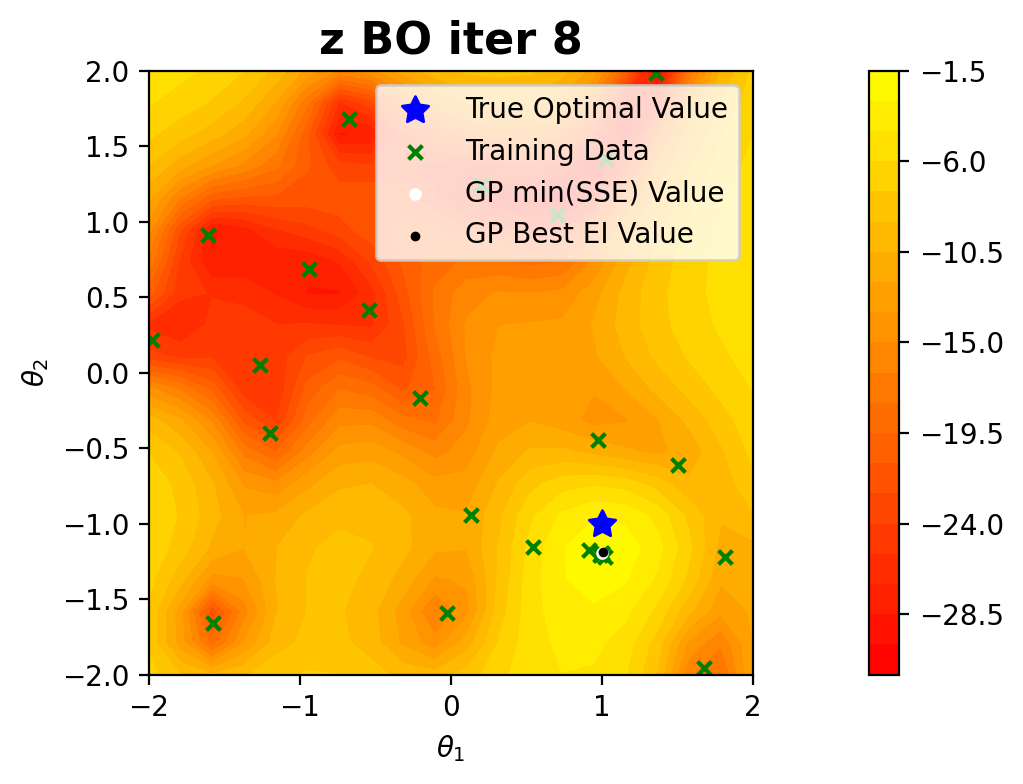

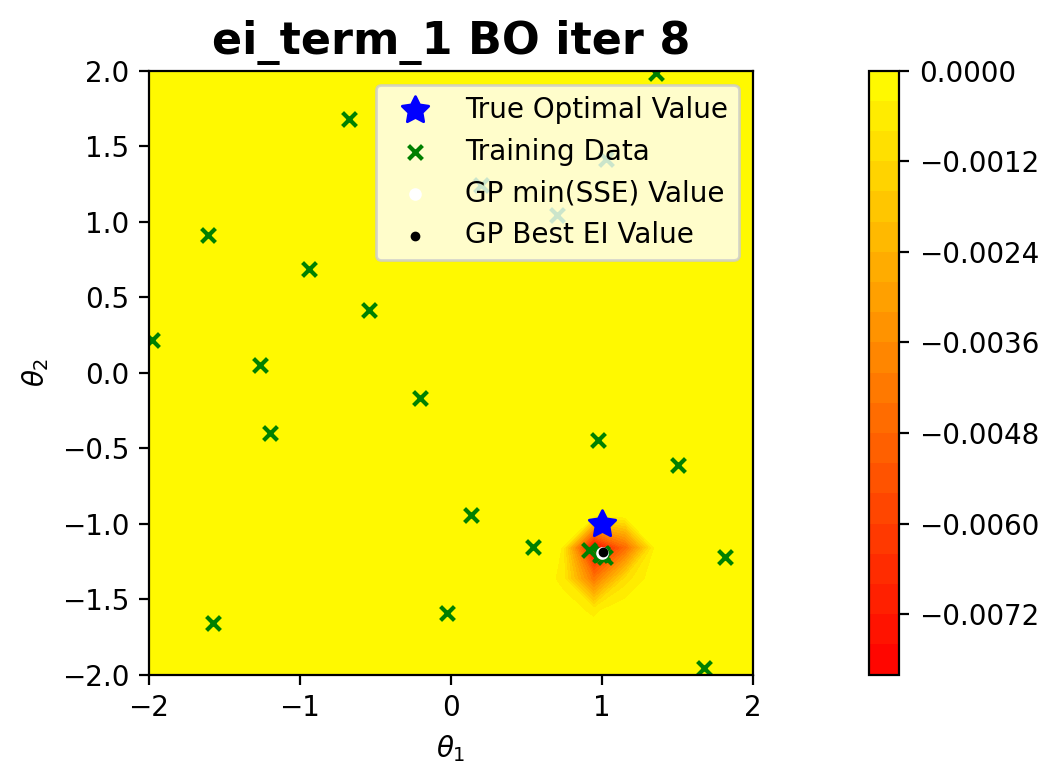

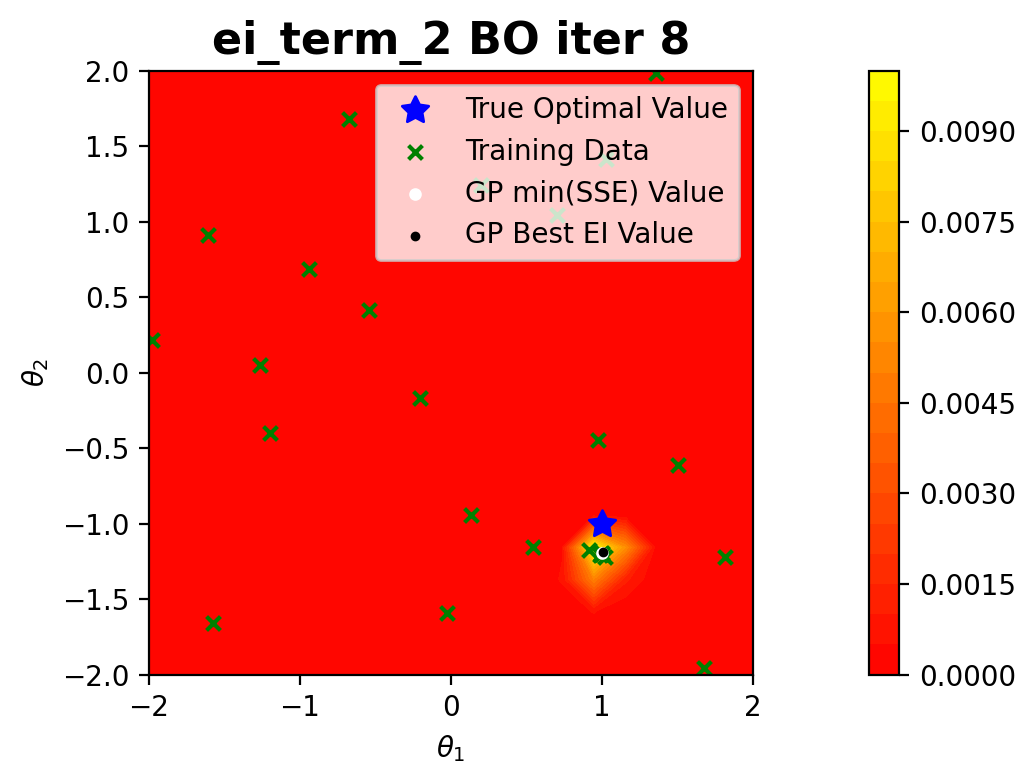

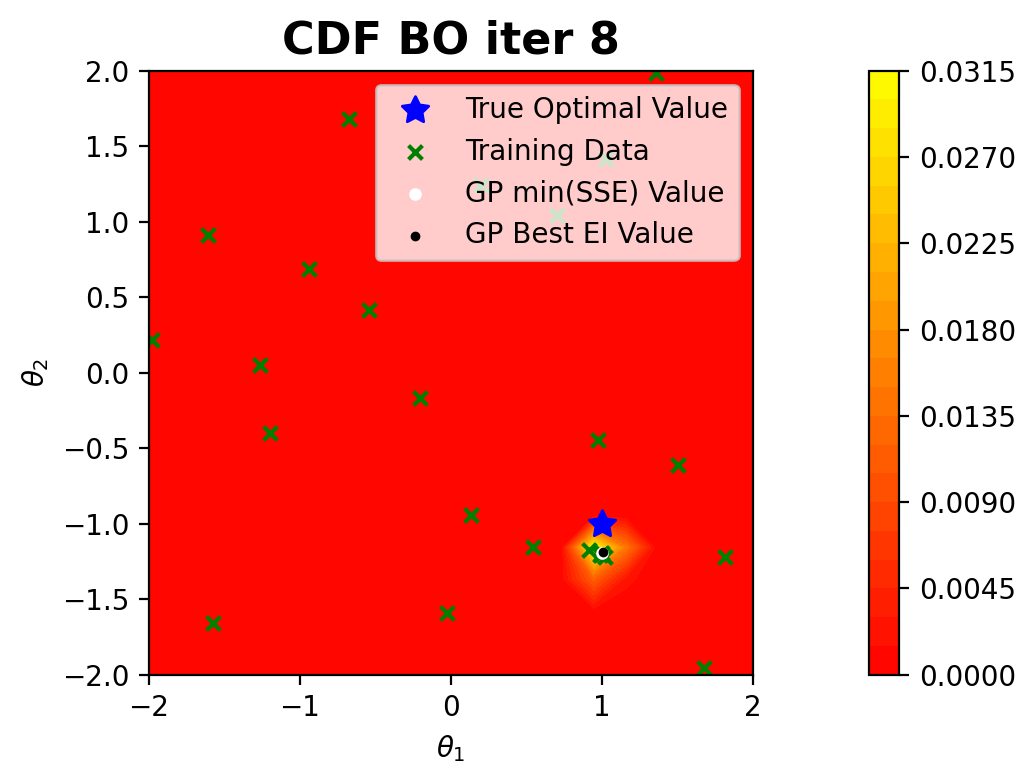

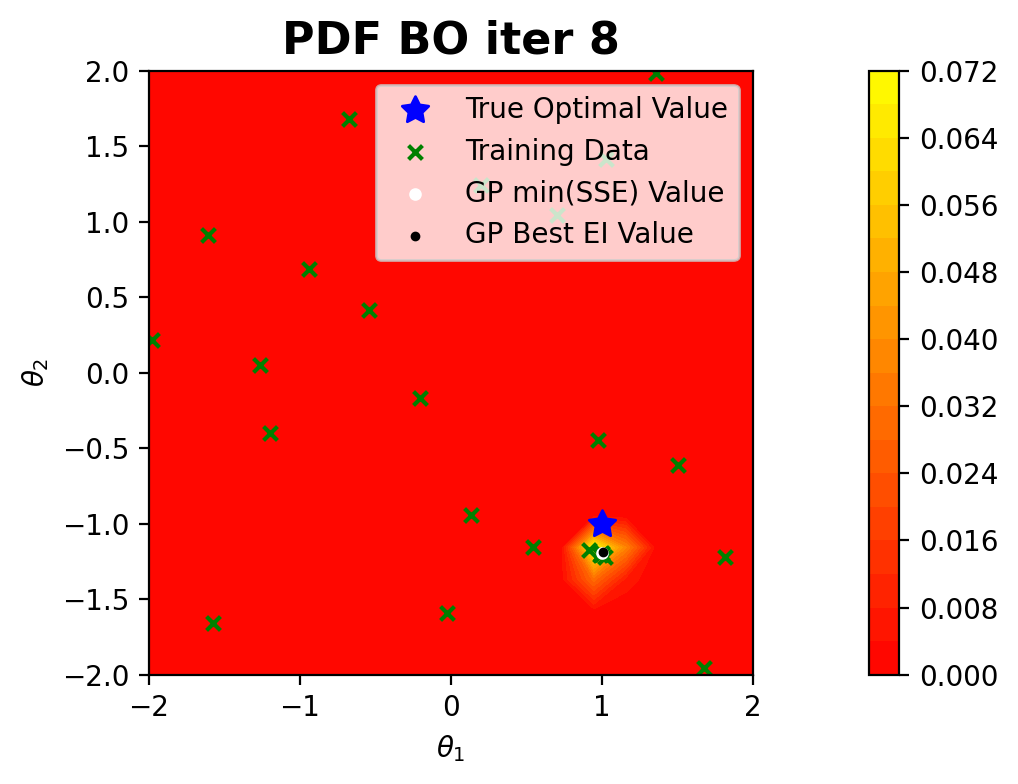

Magnitude of ln(SSE) given Theta_Opt =  [ 0.99923365 -1.19310969] is 2.0269e-01
BO Iteration =  9
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.01614118 -1.18458097]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 1.00525349 -1.18970232]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.0019952548013389346 



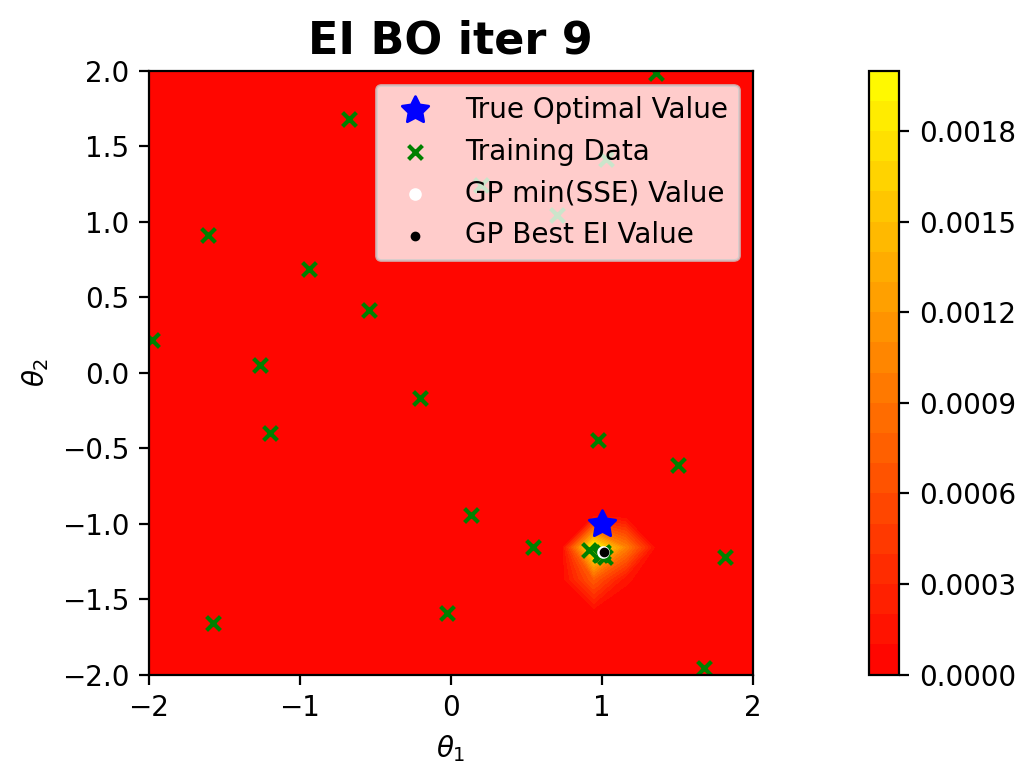

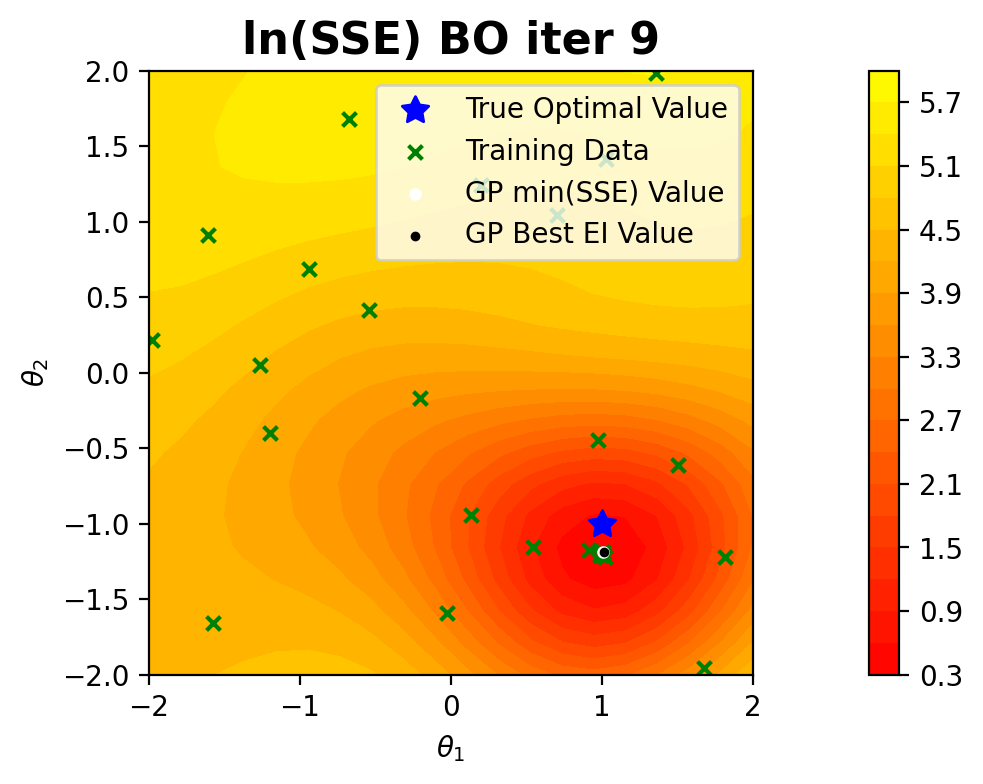

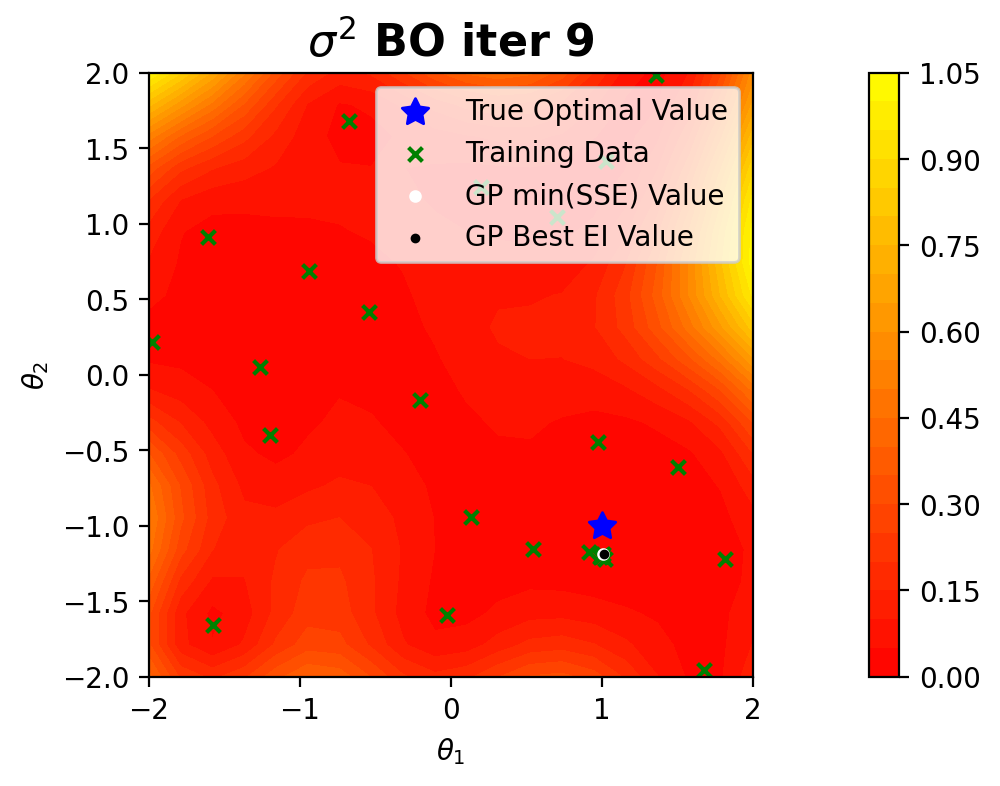

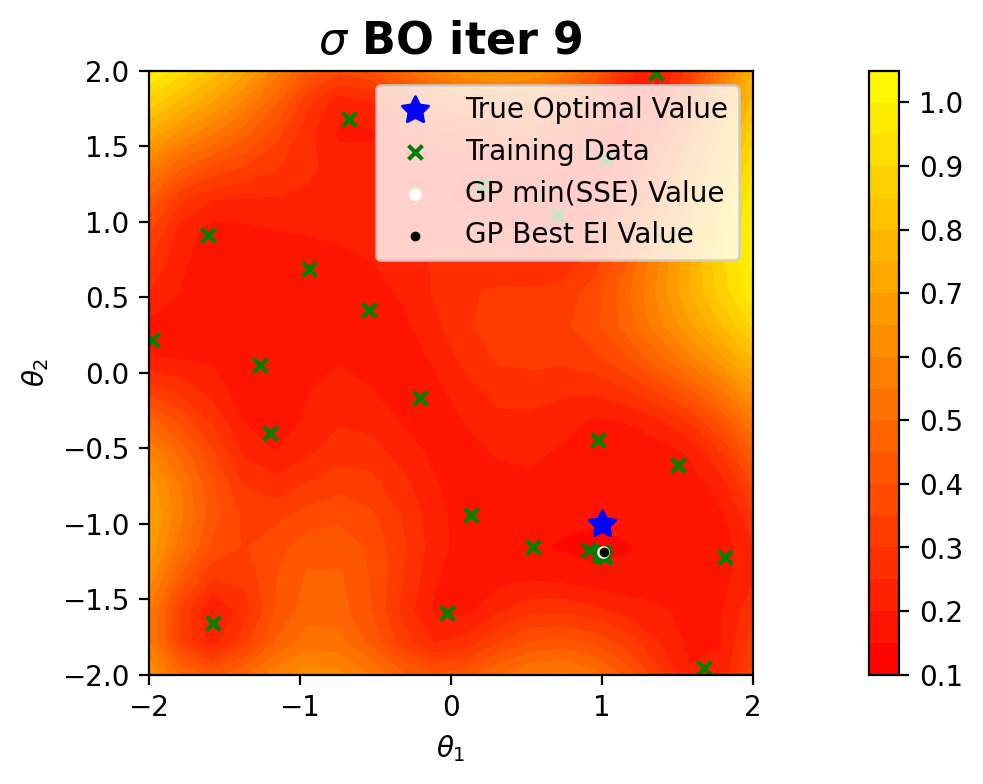

Best Error is: 0.0658


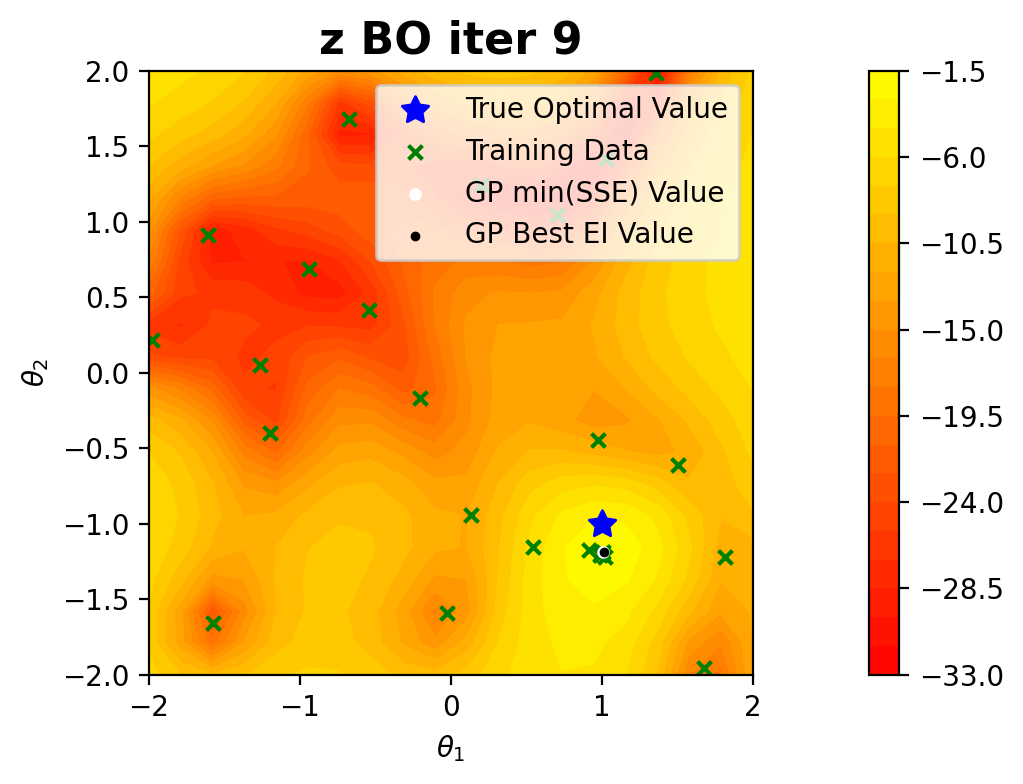

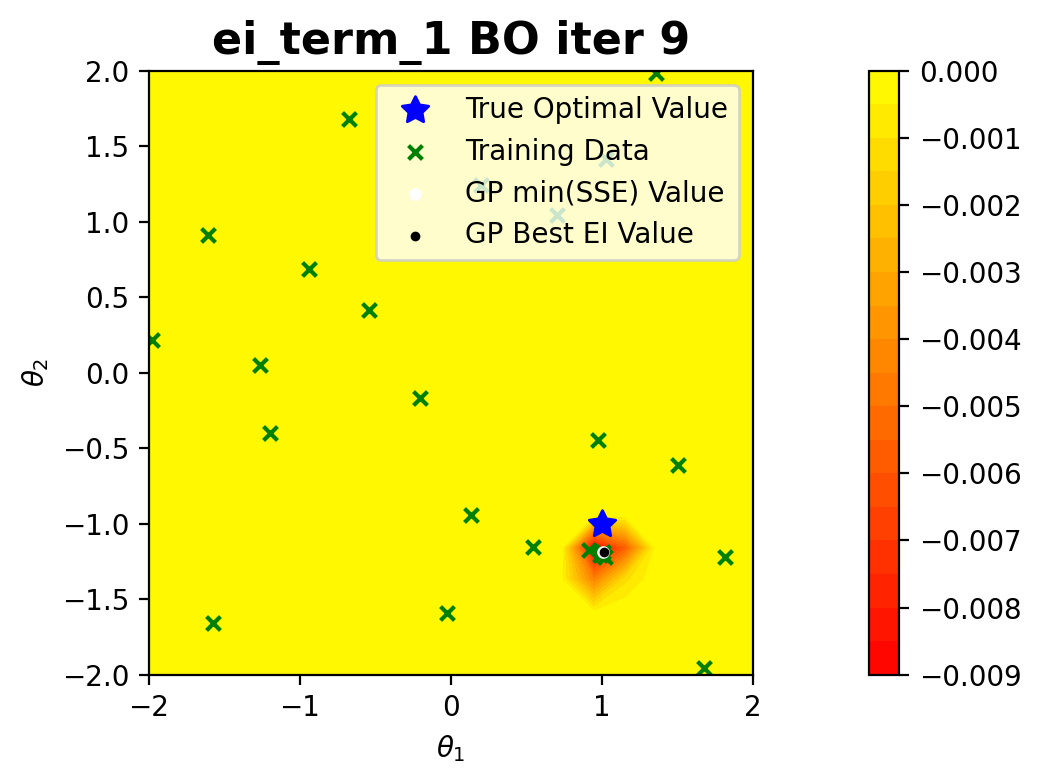

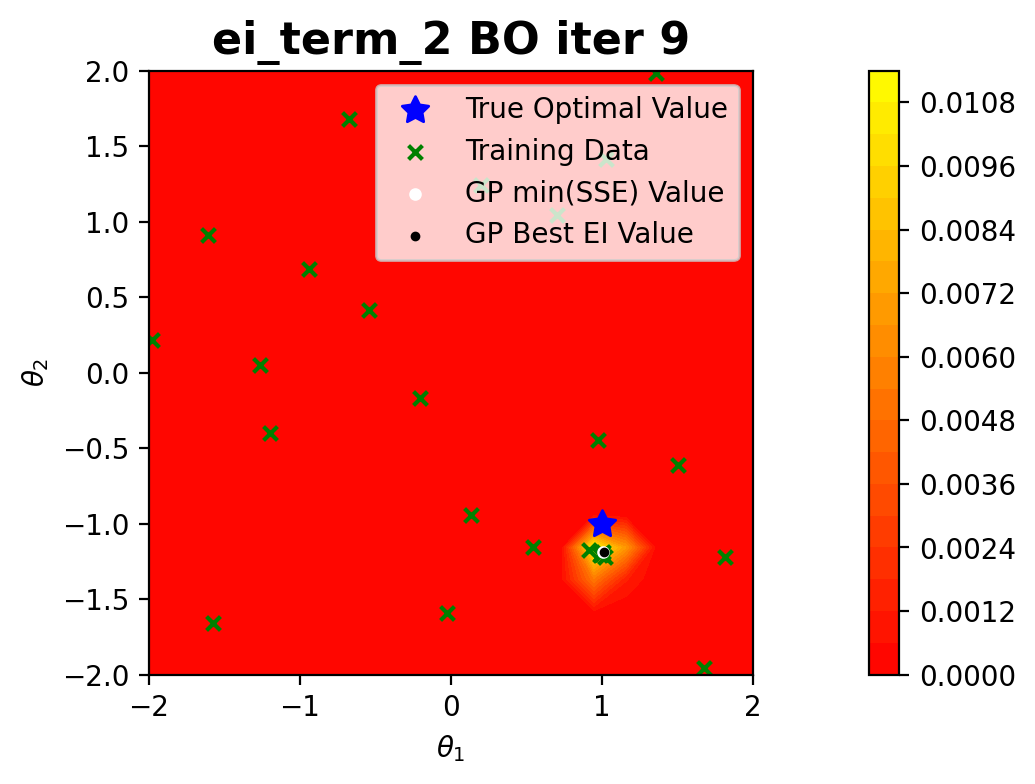

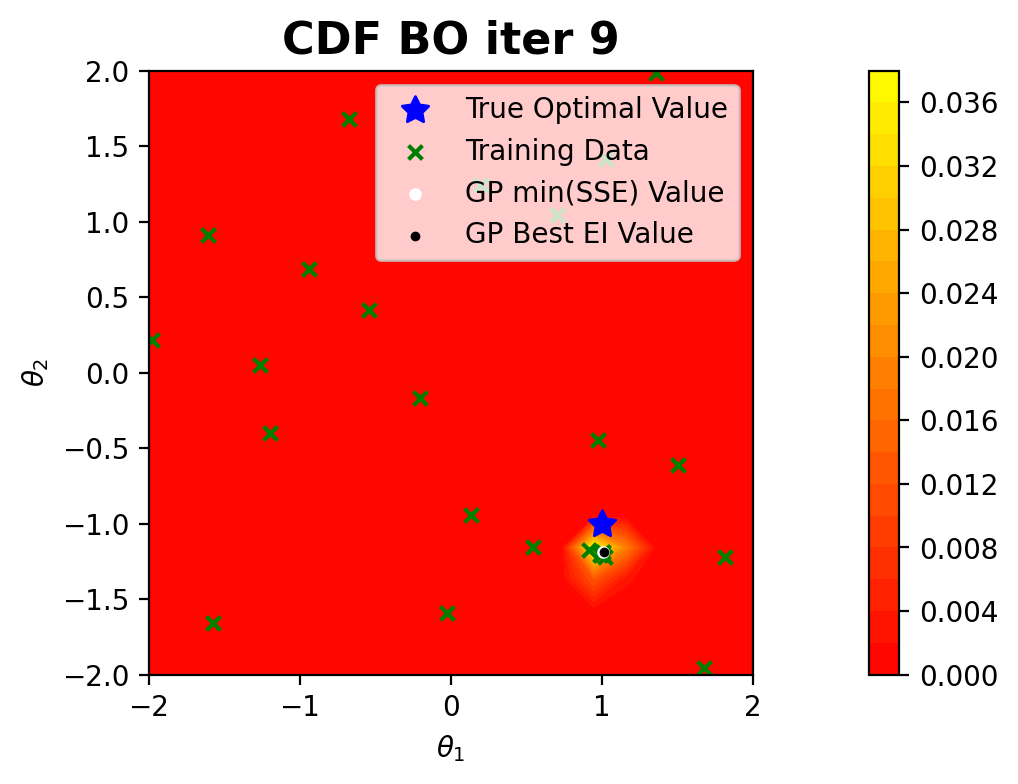

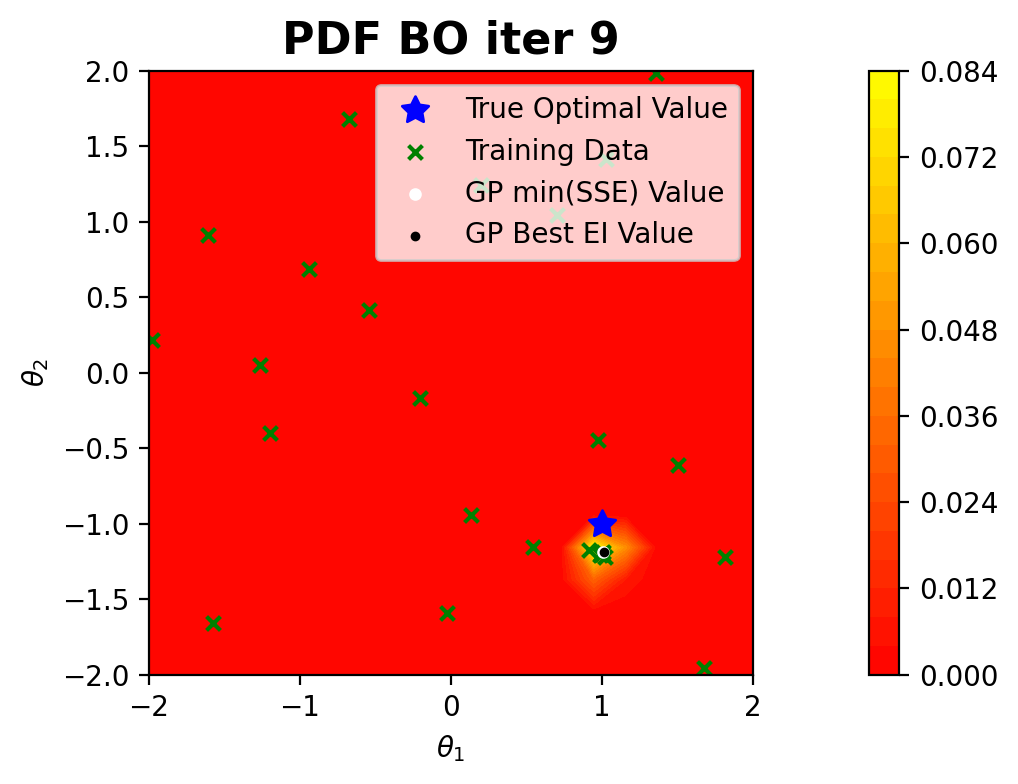

Magnitude of ln(SSE) given Theta_Opt =  [ 1.00525349 -1.18970232] is 1.6730e-01
BO Iteration =  10
Exploration Bias Factor =  tensor(1)
Scipy Theta Best =  [ 1.02308651 -1.17767635]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 1.01223105 -1.18467603]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.002941095550668375 



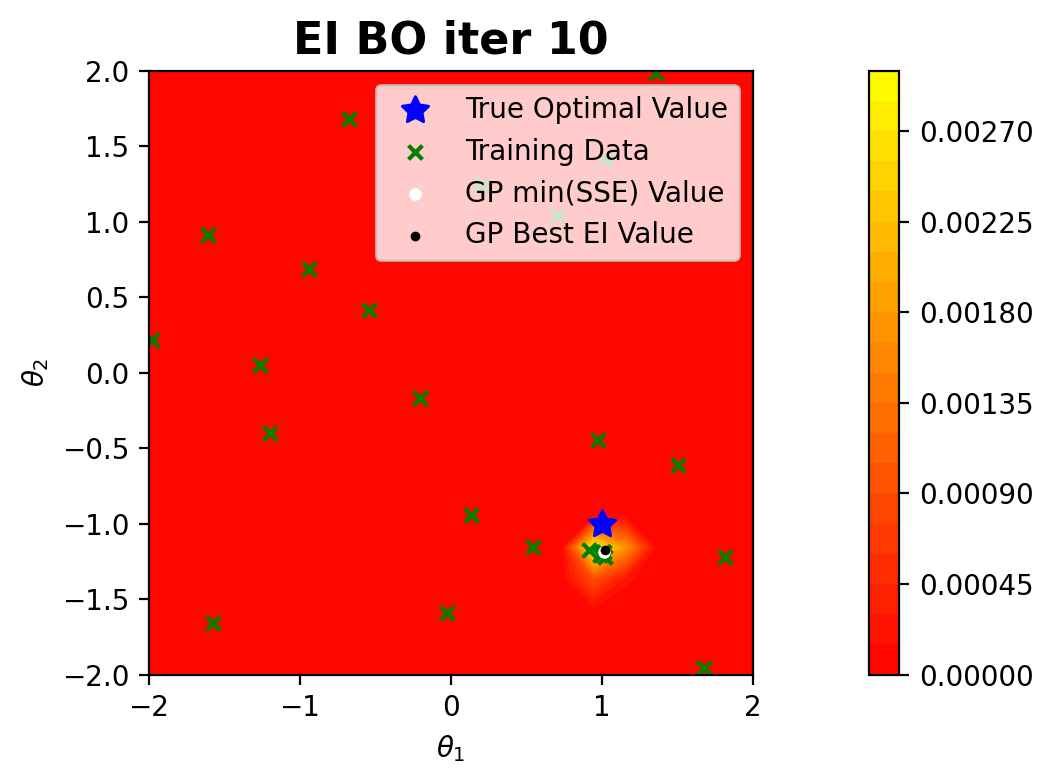

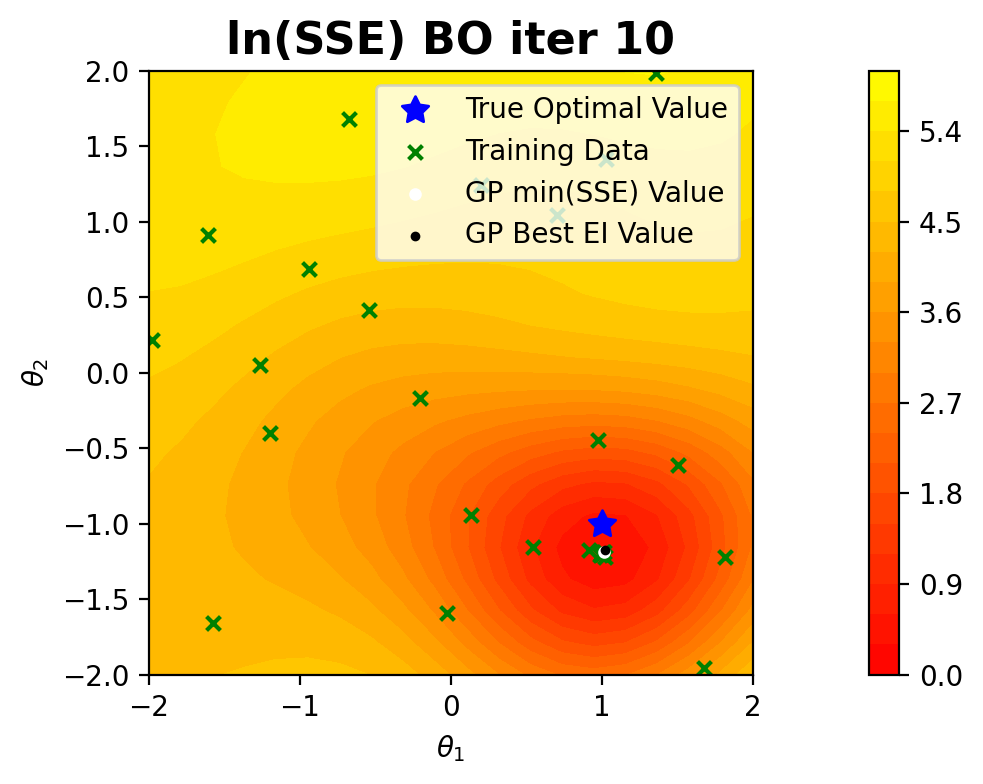

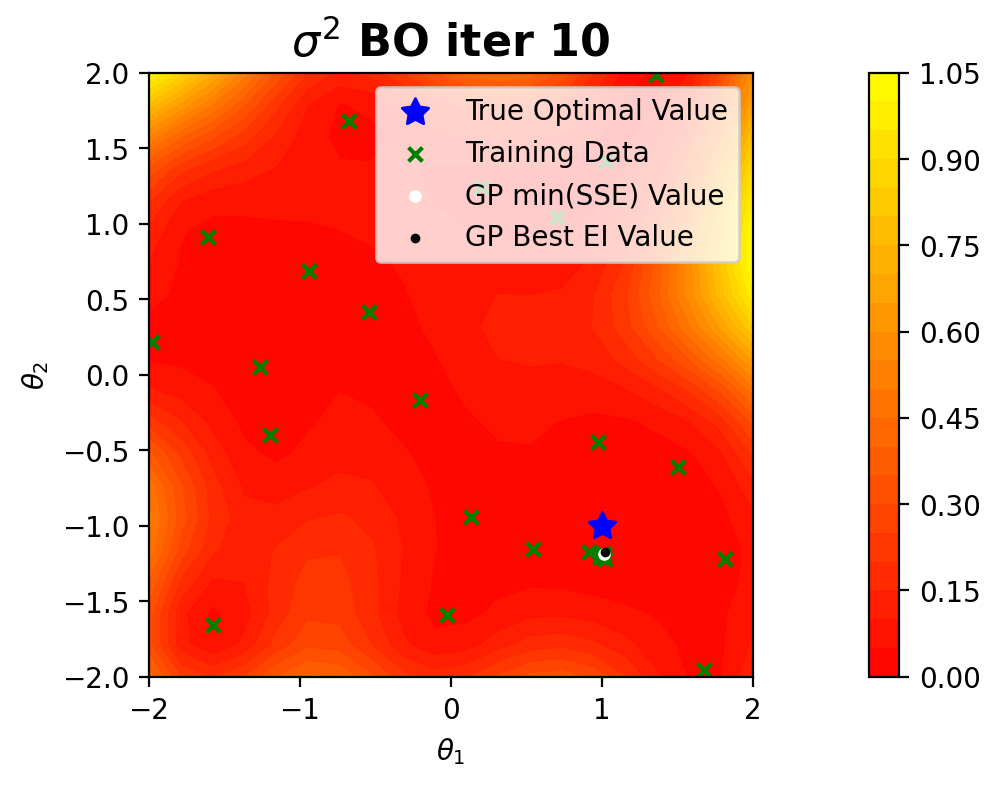

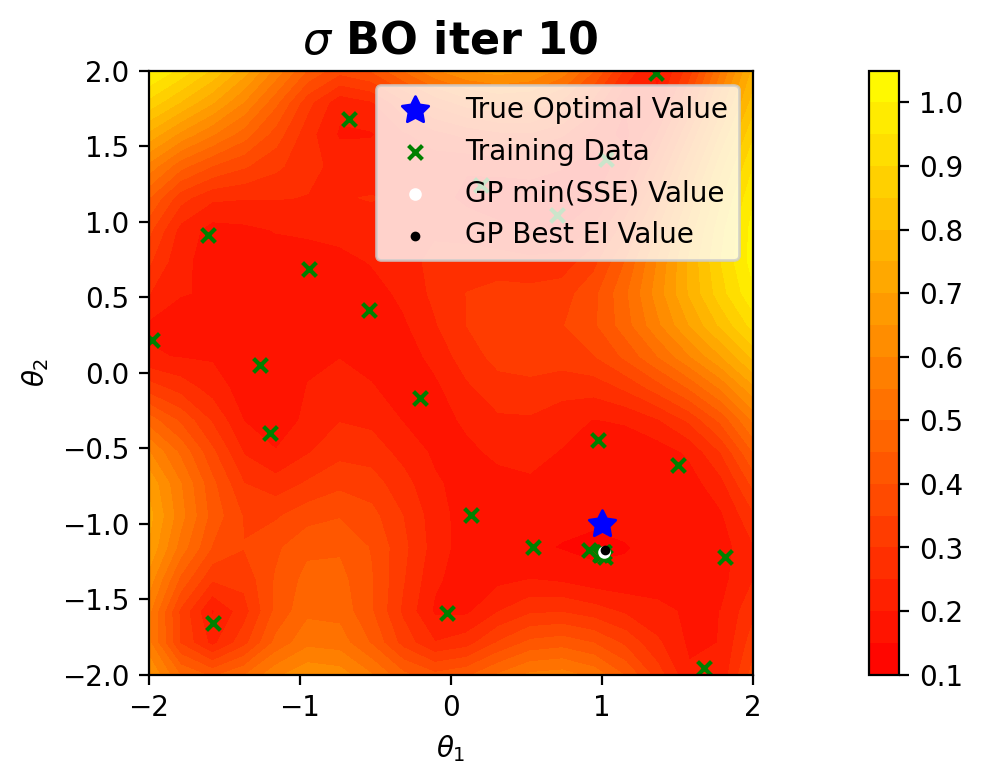

Best Error is: 0.0658


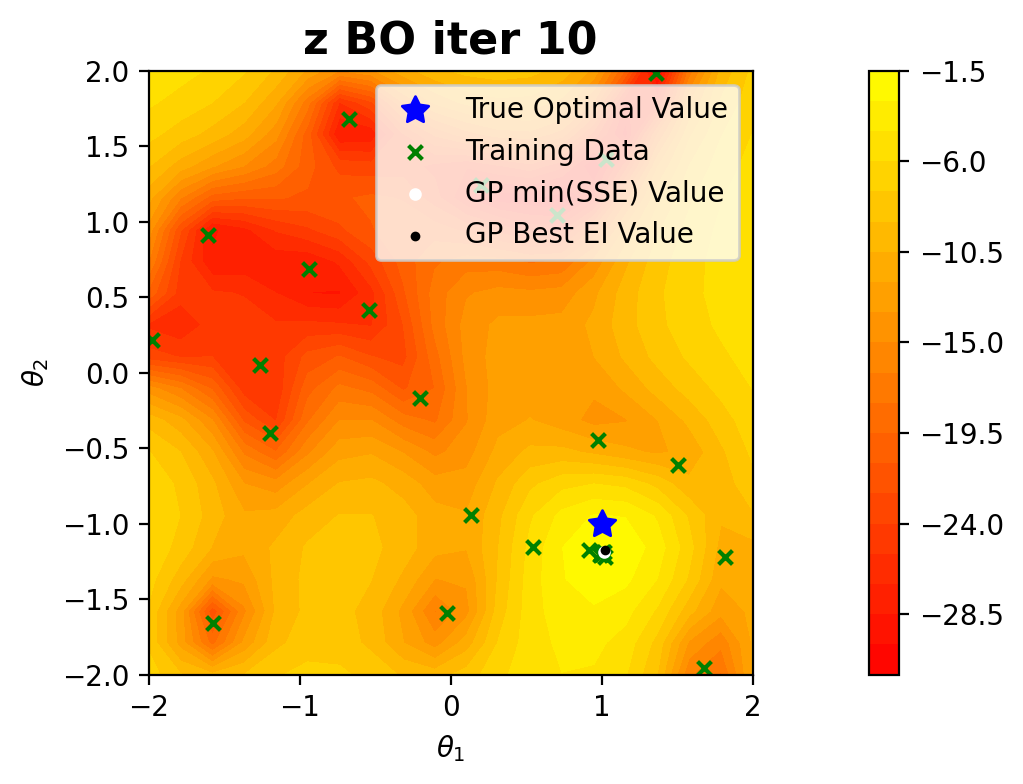

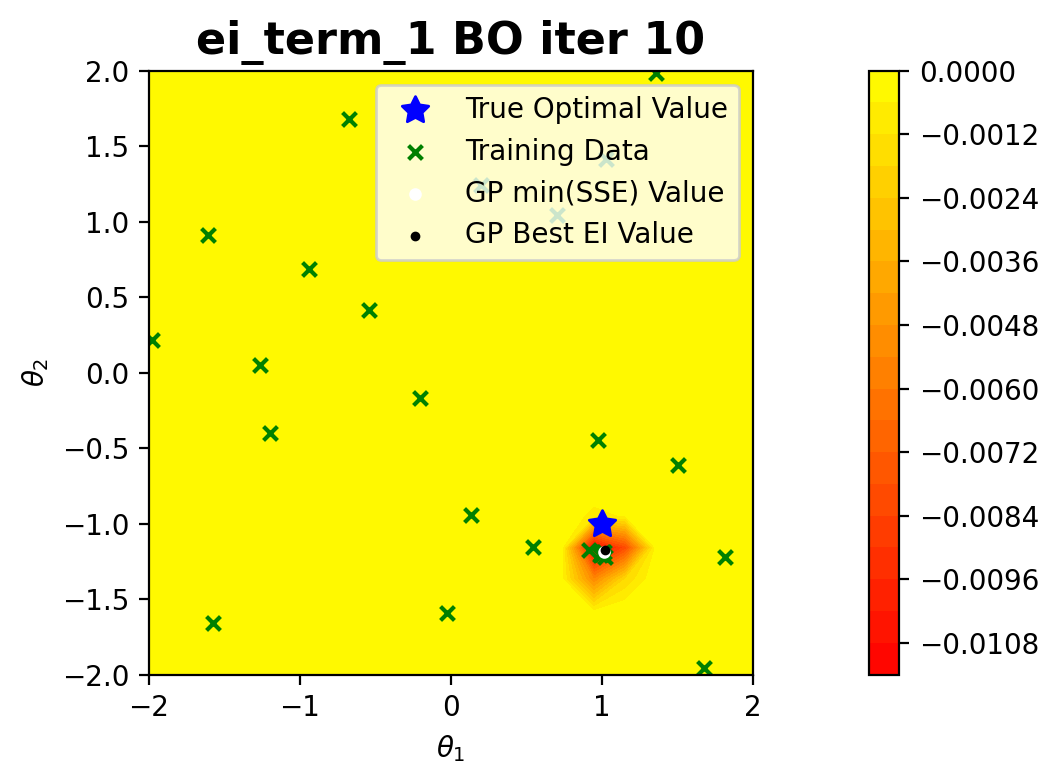

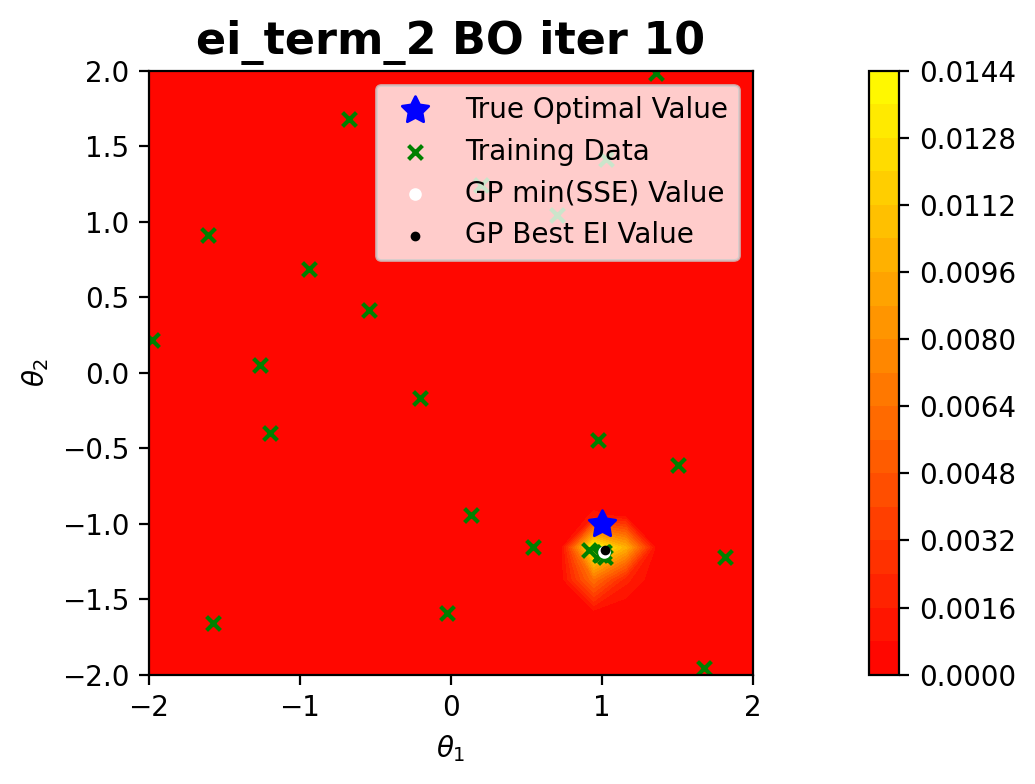

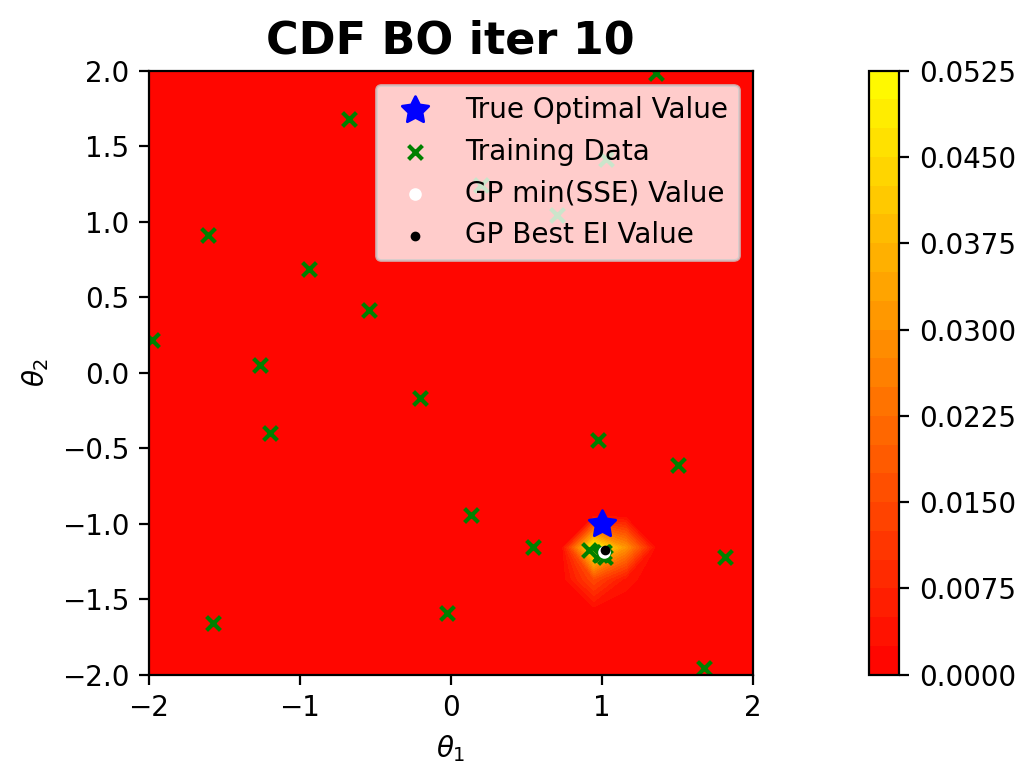

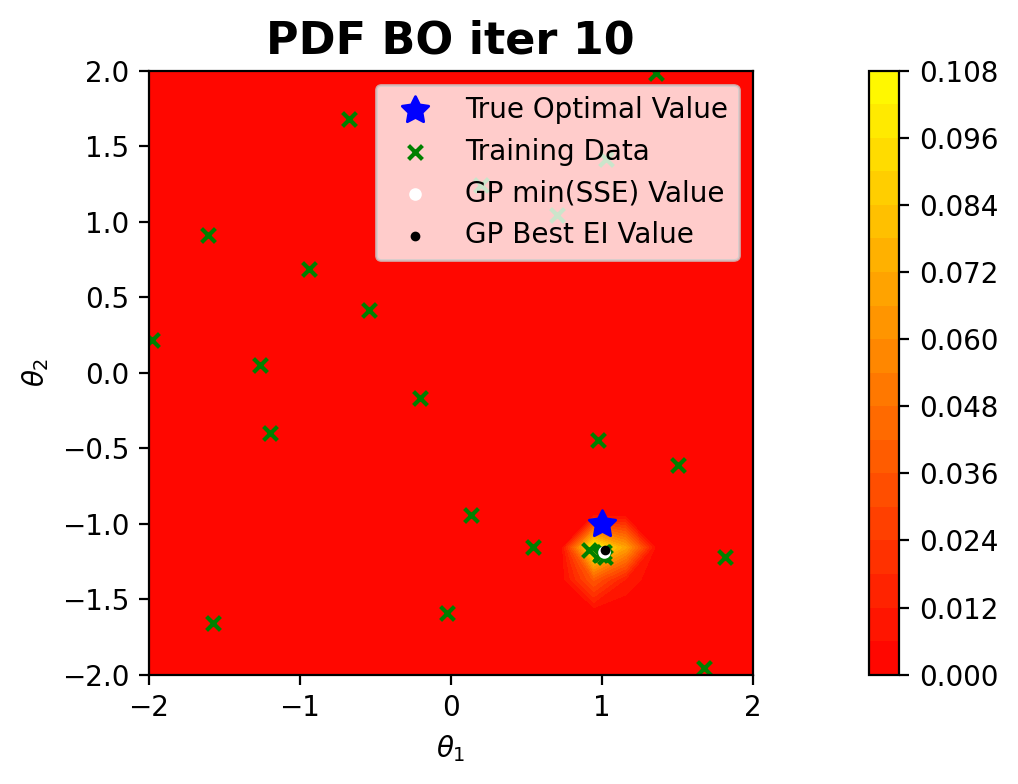

Magnitude of ln(SSE) given Theta_Opt =  [ 1.01223105 -1.18467603] is 1.1451e-01


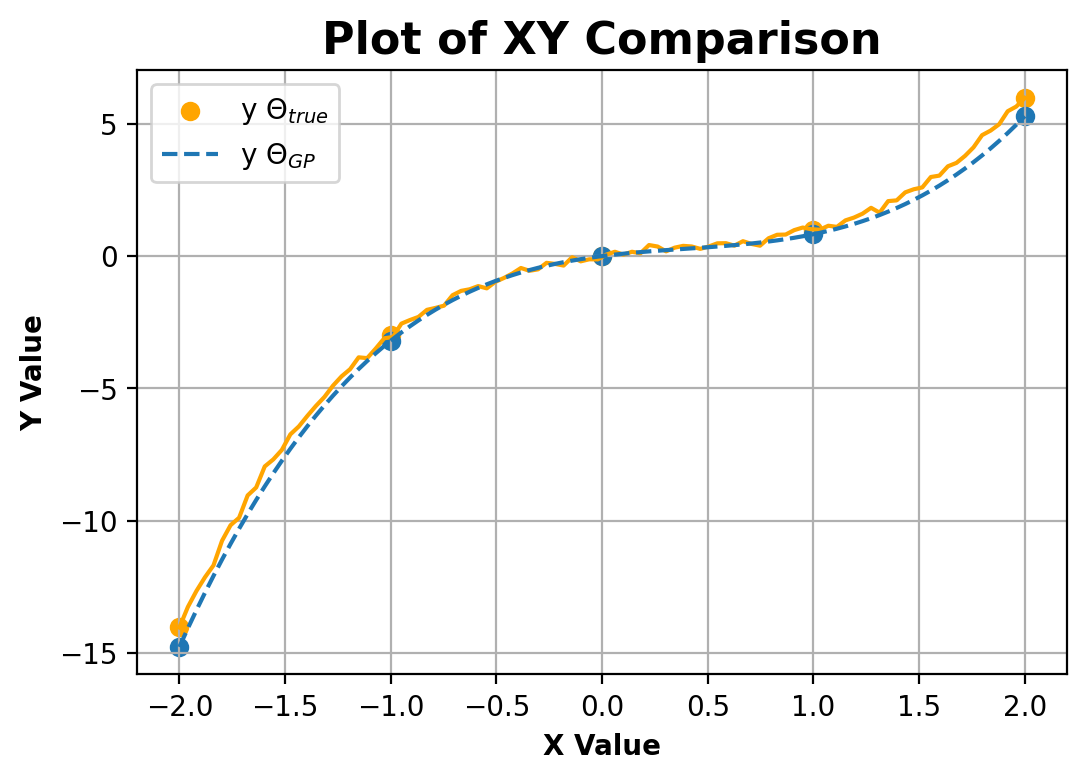

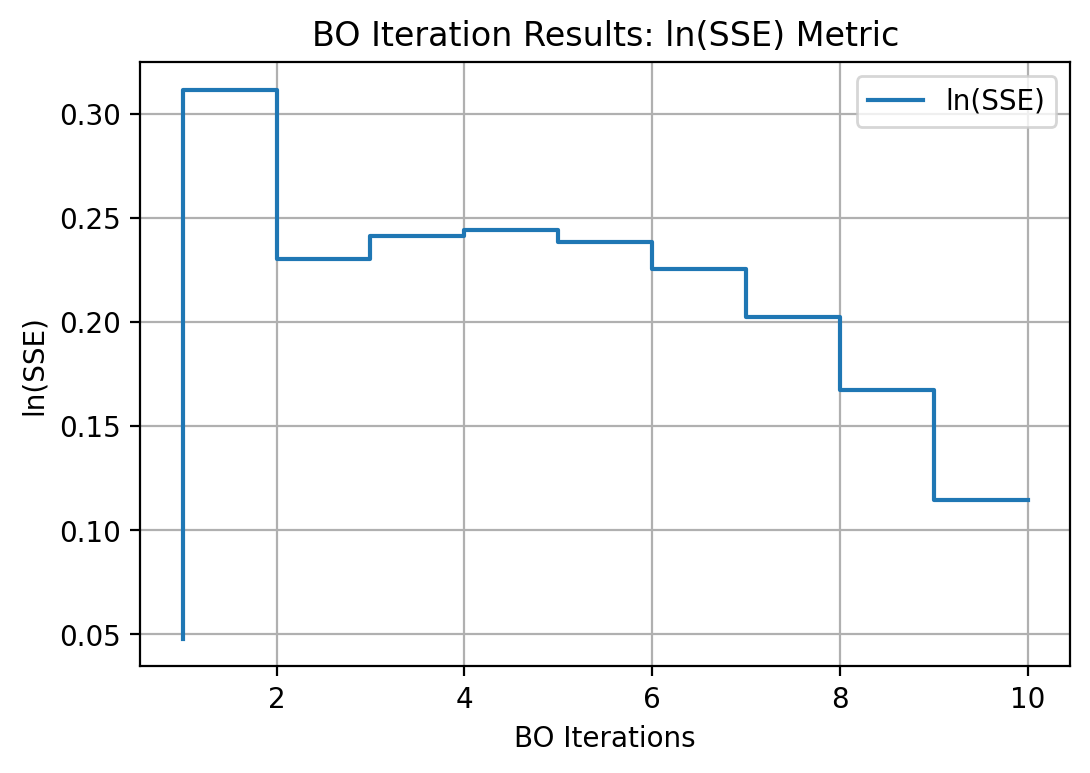

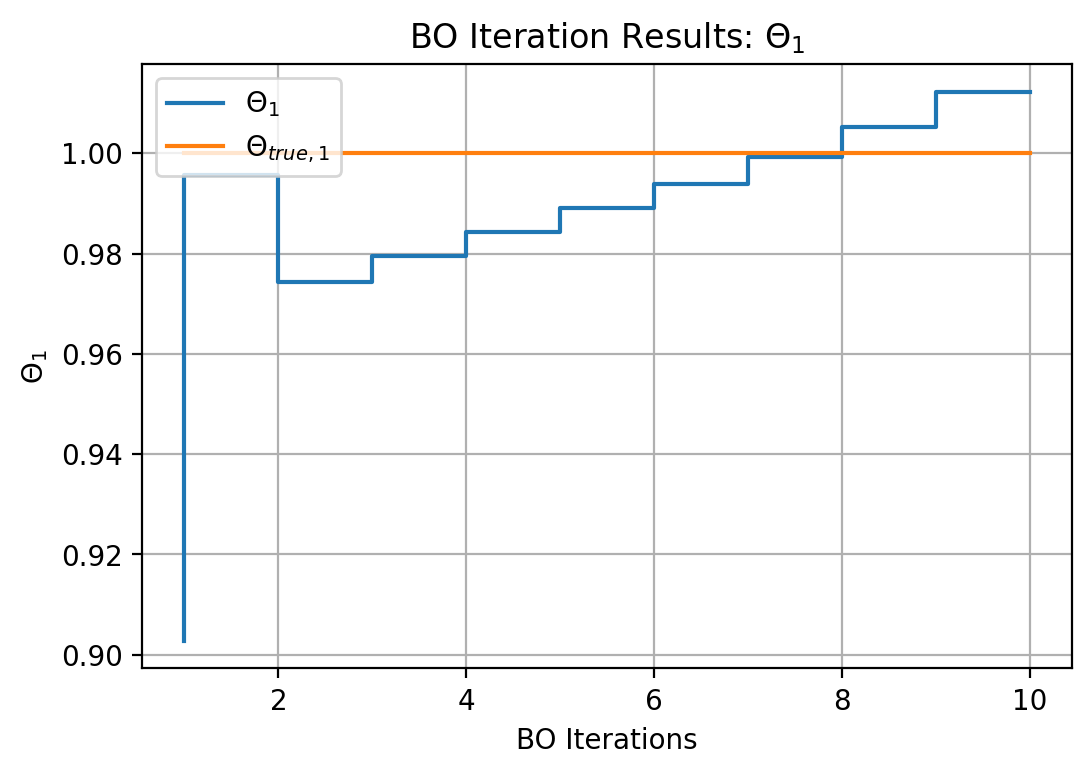

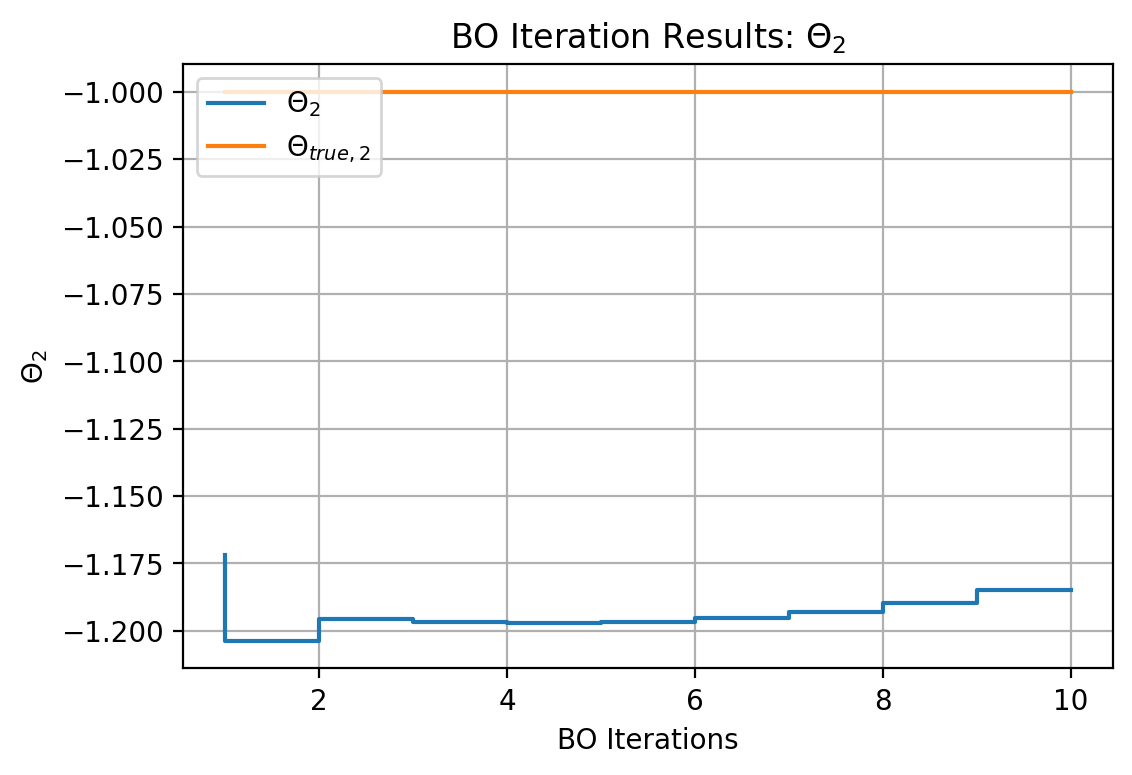

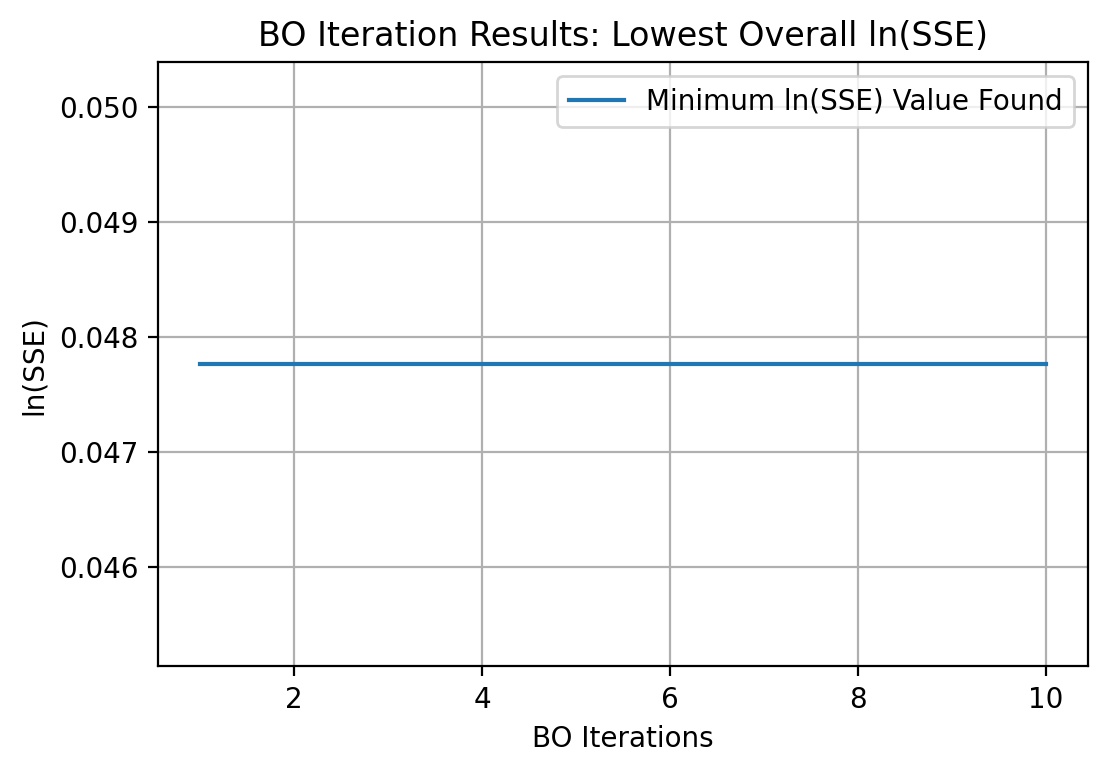

The GP predicts the lowest SSE of 1.049e+00 occurs at θ = [ 0.90275607 -1.17186508] during Run 1 at BO iteration 1
At this point, the highest EI occurs at θ = [ 0.9132431  -1.17507961]
CPU times: user 45.5 s, sys: 1.17 s, total: 46.7 s
Wall time: 46.8 s


In [3]:
%%time

obj = "LN_obj"        
t = 20
all_data_doc = find_train_doc_path(emulator, obj, t)
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=",")) 

print("Runs:", runs)
print("BO Iters:",BO_iters)
print("------------------------------")
for i in range(len(set_lengthscale)):
    for j in range(len(explore_bias)):
        print("Lengthscale Set To:", set_lengthscale)
        print("Explore Bias:", explore_bias[j])
        results = bo_iter_w_runs(BO_iters,all_data_doc,t,theta_mesh,Theta_True,train_iter,explore_bias[j], Xexp, Yexp,
                                     noise_std, obj, runs, sparse_grid, emulator, set_lengthscale[i], verbose,save_fig, 
                                     shuffle_seed)
        print("The GP predicts the lowest SSE of", "{:.3e}".format(np.exp(results[3])), "occurs at \u03B8 =", results[2][0], 
              "during Run", results[1], "at BO iteration", results[0])
        print("At this point, the highest EI occurs at \u03B8 =", results[4][0])